<a href="https://colab.research.google.com/github/moncykurien/evaluation_projects/blob/main/Project13_DoctorConsultationFees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Doctor Consultation Fees Project

Build a Machine Learning model to predict the Doctor Consultation fees based on the below features

## FEATURES:

1. Qualification: Qualification and degrees held by the doctor
2. Experience: Experience of the doctor in number of years
3. Rating: Rating given by patients
4. Profile: Type of the doctor
5. Miscellaeous_Info: Extra information about the doctor
6. Fees: Fees charged by the doctor
7. Place: Area and the city where the doctor is located.

## Importing Libraries

In [1]:
!pip install category_encoders

     |████████████████████████████████| 81kB 3.4MB/s 


In [2]:
import pandas as pd
import numpy as np

import re


from sklearn.base import BaseEstimator

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from category_encoders.hashing import HashingEncoder

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

import joblib

import warnings

warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_excel('/content/Final_Train.xlsx')
df = data.copy()
df.iloc[np.r_[0:5,-5:0]]

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100
5960,"BDS, MDS - Orthodontics",17 years experience,100%,"Pitampura, Delhi",Dentist,Acrylic Partial Denture Crowns and Bridges Fix...,200


In [ ]:
test_data = pd.read_excel('/content/Final_Test.xlsx')
df_test = test_data.copy()
df_test.iloc[np.r_[0:5,-5:0]]

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...
1986,"MBBS, MD - Dermatology , Venereology & Leprosy",8 years experience,NaN,"Pallikaranai, Chennai",Dermatologists,"1 Feedback Pallikaranai, Chennai ₹500"


Observations:
1. There are missing values.
2. There are multiple values in a single feature for a sinlge record. For eg: Qualification, Place and Miscellaneous_Info.
3. Experience has texts in it that should be removed.
4. Rating has % in it that should be removed.
5. Miscellaneous_Info has almost the same information as in Rating and Place. Need to investigate more.

In [ ]:
df.shape

(5961, 7)

Observations:
1. There are 5961 rows are 7 columns in the train dataset.

In [ ]:
df_test.shape

(1987, 6)

Observations:
1. There are 1987 rows and 6 columns in Test dataset

In [ ]:
df.isnull().sum()/df.shape[0]*100

Qualification          0.000000
Experience             0.000000
Rating                55.393390
Place                  0.419393
Profile                0.000000
Miscellaneous_Info    43.952357
Fees                   0.000000
dtype: float64

Train set Observations:
1. 55.4% of data is missing in Rating feature.
2. 0.4% data is missing in Place.
3. 43.95% data is missing in Micellaneous_Info.

In [ ]:
df_test.isnull().sum()/df.shape[0]*100

Qualification          0.000000
Experience             0.000000
Rating                18.285523
Place                  0.100654
Profile                0.000000
Miscellaneous_Info    13.990941
dtype: float64

Test set Observations:
1. 18.29% data is missing in Rating.
2. 0.1% data is missing in Place.
3. 13.99% data is missing in Miscellaneous_Info.

## Data Cleaning

#### Experience

In [ ]:
def extract_experience(x):
  result = re.search(r'\d+', str(x))
  if result:
    return int(result.group())
  else:
    return x


In [ ]:
#train set
df['Experience'] = df['Experience'].apply(extract_experience)

In [ ]:
#test set
df_test['Experience'] = df_test['Experience'].apply(extract_experience)

In [ ]:
#trainset
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [ ]:
#Testset
df_test.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [ ]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [ ]:
df_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


#### Place

##### Place - Missing values

In [ ]:
df['Place'].isnull().sum()

25

In [ ]:
df[df['Place'].isnull()]

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
91,Get inspired by remarkable stories of people l...,0,NaN,NaN,Dermatologists,NaN,100
502,Get inspired by remarkable stories of people l...,0,NaN,NaN,Dermatologists,NaN,100
599,Get inspired by remarkable stories of people l...,0,NaN,NaN,Dermatologists,NaN,100
605,Get inspired by remarkable stories of people l...,0,NaN,NaN,Dermatologists,NaN,100
724,Get inspired by remarkable stories of people l...,0,NaN,NaN,Dermatologists,NaN,100
1002,Get inspired by remarkable stories of people l...,0,NaN,NaN,Dermatologists,NaN,100
1083,Get inspired by remarkable stories of people l...,0,NaN,NaN,Dermatologists,NaN,100
1210,Get inspired by remarkable stories of people l...,0,NaN,NaN,Dermatologists,NaN,100
2078,Get inspired by remarkable stories of people l...,0,NaN,NaN,Dermatologists,NaN,100
2178,Get inspired by remarkable stories of people l...,0,NaN,NaN,Dermatologists,NaN,100


In [ ]:
df_test['Place'].isnull().sum()

6

In [ ]:
df_test[df_test['Place'].isnull()]

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
381,Get inspired by remarkable stories of people l...,0,NaN,NaN,Dermatologists,NaN
1494,Get inspired by remarkable stories of people l...,0,NaN,NaN,Dermatologists,NaN
1644,Get inspired by remarkable stories of people l...,0,NaN,NaN,Dermatologists,NaN
1838,Get inspired by remarkable stories of people l...,0,NaN,NaN,Dermatologists,NaN
1925,Get inspired by remarkable stories of people l...,0,NaN,NaN,Dermatologists,NaN
1930,Get inspired by remarkable stories of people l...,0,NaN,NaN,Dermatologists,NaN


Observations:
1. There seem to be an invalid value in Qualification in both train and test sets which will be addressed afterwards.


Checking the dataset to find a close match for the missing Place for the 1 record in train that has a valid Qualification and missing Place.

In [ ]:
df[(df['Qualification']=='MBBS, DDVL') & (df['Experience'] == 22) | (df['Qualification']=='MBBS, DDVL') & (df['Fees'] == 150)]

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
52,"MBBS, DDVL",22,NaN,"Madhapur, Hyderabad",Dermatologists,NaN,650
3128,"MBBS, DDVL",10,NaN,"Pollachi, Coimbatore",Dermatologists,NaN,150
3806,"MBBS, DDVL",13,90%,"Ganapathy, Coimbatore",Dermatologists,"90% 5 Feedback Ganapathy, Coimbatore",150
4823,"MBBS, DDVL",22,NaN,NaN,Dermatologists,NaN,150


Observations:
1. The Places do not match well. Because, in Madhapur, Hyderabad for 22 year Experience and with Qualification 'MBBS, DDVL', the Fees is 650, our record shows only 150.
2. In Coimbatore for a Doctor with Qualification of 'MBBS, DDVL', the Fees is 150 but the experience is only 10 or 13. Our record shows an experience of 22 years.

In [ ]:
df[df['Qualification'].str.contains('Get inspired by remarkable')]

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
91,Get inspired by remarkable stories of people l...,0,NaN,NaN,Dermatologists,NaN,100
502,Get inspired by remarkable stories of people l...,0,NaN,NaN,Dermatologists,NaN,100
599,Get inspired by remarkable stories of people l...,0,NaN,NaN,Dermatologists,NaN,100
605,Get inspired by remarkable stories of people l...,0,NaN,NaN,Dermatologists,NaN,100
724,Get inspired by remarkable stories of people l...,0,NaN,NaN,Dermatologists,NaN,100
1002,Get inspired by remarkable stories of people l...,0,NaN,NaN,Dermatologists,NaN,100
1083,Get inspired by remarkable stories of people l...,0,NaN,NaN,Dermatologists,NaN,100
1210,Get inspired by remarkable stories of people l...,0,NaN,NaN,Dermatologists,NaN,100
2078,Get inspired by remarkable stories of people l...,0,NaN,NaN,Dermatologists,NaN,100
2178,Get inspired by remarkable stories of people l...,0,NaN,NaN,Dermatologists,NaN,100


In [ ]:
df_test[df_test['Qualification'].str.contains('Get inspired by remarkable')]

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
381,Get inspired by remarkable stories of people l...,0,NaN,NaN,Dermatologists,NaN
1494,Get inspired by remarkable stories of people l...,0,NaN,NaN,Dermatologists,NaN
1644,Get inspired by remarkable stories of people l...,0,NaN,NaN,Dermatologists,NaN
1838,Get inspired by remarkable stories of people l...,0,NaN,NaN,Dermatologists,NaN
1925,Get inspired by remarkable stories of people l...,0,NaN,NaN,Dermatologists,NaN
1930,Get inspired by remarkable stories of people l...,0,NaN,NaN,Dermatologists,NaN


Observations:
1. The 'Place' is missing for all records with Qualification = 'Get inspired by remarkable....' in both train and test. So nowhere to get the Place from.


Intuition:
1. It looks like the Missing places should not be imputed with any place. I will fill the missing values in 'Place' with 'Unknown, Unknown'.

In [ ]:
#Train set
df['Place'].fillna('Unknown,Unknown', inplace=True)

In [ ]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                    0
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [ ]:
#Test set
df_test['Place'].fillna('Unknown,Unknown', inplace=True)

In [ ]:
df_test.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    0
Profile                  0
Miscellaneous_Info     834
dtype: int64

#### Rating

Checking Miscellaneous_Info to see if we can extract missing rating values from it.

In [ ]:
for text in df[(df['Rating'].isnull()) & (~df['Miscellaneous_Info'].isnull())]['Miscellaneous_Info']:
  if text.find('%') != -1:
    print(text)

Borivali East, Mumbai ₹475₹5005% OFF* Available Today
Vileparle West, Mumbai ₹1,200₹150020% OFF* Available on Fri, 08 Feb
4 Feedback Vileparle West, Mumbai ₹800₹100020% OFF*


In [ ]:
for text in df_test[(df_test['Rating'].isnull()) & (~df_test['Miscellaneous_Info'].isnull())]['Miscellaneous_Info']:
  if text.find('%') != -1:
    print(text)

Observations:
1. No information about the missing ratings in the Miscellaneous_Info. That must be the reason the ratings are missing.

In [ ]:
df['Rating'].unique()

array(['100%', '98%', nan, '99%', '79%', '95%', '97%', '94%', '88%',
       '90%', '80%', '93%', '36%', '78%', '87%', '96%', '82%', '89%',
       '74%', '86%', '92%', '83%', '76%', '85%', '56%', '91%', '68%',
       '60%', '75%', '69%', '73%', '67%', '77%', '33%', '55%', '71%',
       '84%', '45%', '63%', '72%', '81%', '62%', '57%', '7%', '48%',
       '40%', '70%', '64%', '65%', '47%', '58%', '53%'], dtype=object)

In [ ]:
df_test['Rating'].unique()

array([nan, '70%', '100%', '90%', '94%', '99%', '98%', '87%', '64%',
       '96%', '95%', '97%', '93%', '69%', '71%', '83%', '92%', '80%',
       '86%', '88%', '67%', '85%', '84%', '55%', '89%', '82%', '81%',
       '60%', '73%', '65%', '77%', '91%', '78%', '79%', '76%', '52%',
       '53%'], dtype=object)

Observations:
1. There are ratings ranging from 7 to 100 in trainset and 52 to 100 in test set.
2. Since there are too many missing values in Rating, and since there is no 0% in the data, I am going to fill the missing values with 0%.


In [ ]:
def fill_Rating(data_frame):
  data_frame['Rating'].fillna('0%', inplace=True)
  return data_frame

In [ ]:
#trainset
df = fill_Rating(df)

In [ ]:
#test set
df_test = fill_Rating(df_test)

In [ ]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                   0
Place                    0
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [ ]:
df_test.isnull().sum()

Qualification           0
Experience              0
Rating                  0
Place                   0
Profile                 0
Miscellaneous_Info    834
dtype: int64

In [ ]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,0%,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12,0%,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [ ]:
df_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35,0%,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,0%,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0,0%,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


Removing % from Rating

In [ ]:
def extract_rating_percentage(x):
  return str(x).split('%')[0]

In [ ]:
#train set
df['Rating'] = df['Rating'].apply(extract_rating_percentage).astype('int')

In [ ]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12,0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [ ]:
#test set
df_test['Rating'] = df_test['Rating'].apply(extract_rating_percentage).astype('int')

In [ ]:
df_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35,0,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,0,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40,70,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0,0,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


## Feature Engineering

#### Qualification

There are multiple Degrees in many records. Ill create a new feature that shows the number of degrees each doctor has.

In [ ]:
print(f"There are {df['Qualification'].nunique()} unique values in Qualification variable for train set.")
print(f"There are {df_test['Qualification'].nunique()} unique values in Qualification variable for test set.")

There are 1420 unique values in Qualification variable for train set.
There are 630 unique values in Qualification variable for test set.


In [ ]:
def get_no_of_degrees(x):
  return len(x.split(','))

In [ ]:
#train set
df['Number_degrees_diploma_certificate'] = df['Qualification'].apply(get_no_of_degrees)

In [ ]:
#test set
df_test['Number_degrees_diploma_certificate'] = df_test['Qualification'].apply(get_no_of_degrees)

Verifying Number_degrees_diploma_certificate - Trainset

In [ ]:
df[df['Number_degrees_diploma_certificate'] > 6]

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Number_degrees_diploma_certificate
291,"BDS, MDS - Oral & Maxillofacial Surgery, Diplo...",19,94,"MG Road, Bangalore",Dentist,Dental Implant Fixing Implant Rehabilitation I...,500,7
853,"MD - Homeopathy, BHMS, DHMS (Diploma in Homeop...",37,100,"Fort, Mumbai",Homeopath,"100% 36 Feedback Fort, Mumbai",100,7
1419,"MBBS, MD - General Medicine, DNB - General Med...",17,0,"Nungambakkam, Chennai",General Medicine,Infectious Disease Treatment Vaccination/ Immu...,800,7
1593,"Diploma in Diet and Nutrition, BHMS, Diploma i...",10,99,"Ghatkopar East, Mumbai",Homeopath,Dermabrasion Laser Resurfacing Acne / Pimples ...,500,9
2035,"Fellowship in Oral implantlogy, Certified Adva...",22,97,"Ashok Nagar, Chennai",Dentist,RCT - Root Canal Treatment Cosmetic/ Aesthetic...,300,10
2844,"MBBS, MS - Otorhinolaryngology, Diploma in Oto...",27,98,"Dadar East, Mumbai",ENT Specialist,Cochlear Implants BAHA Surgery Functional Endo...,100,7
3562,"MBBS, Diploma in Family Medicine (DFM), Certif...",5,0,"Coimbatore Racecourse, Coimbatore",General Medicine,NaN,700,8
3580,"MBBS, MD - General Medicine, Post Graduate Dip...",17,88,"Greater Kailash Part 1, Delhi",General Medicine,Non-Invasive Cardiology Chest Pain Treatment C...,100,9
4174,"MBBS, DNB - General Medicine, FRCP, Post Gradu...",29,76,"Old Rajendra Nagar, Delhi",General Medicine,"76% 8 Feedback Old Rajendra Nagar, Delhi",100,8
4655,"MBBS, MD - Internal Medicine, Post Graduate Di...",14,0,"Karol Bagh, Delhi",General Medicine,NaN,400,7


In [ ]:
df.loc[2035,'Qualification']

'Fellowship in Oral implantlogy, Certified Advance Course In Endodontics, Certified in Orthodontics, Certification in Full Mouth Rehabilitation, Certified BPS Dentist, Certificate in Cosmetic Dentistry, Professional Implantology Training Course (PITC), Fellowship in Advanced Endoscopic Sinus Surgery, Degree in Dental Implant, Fellowship in Lasers & Cosmetology'

Verifying Number_degrees_diploma_certificate - Test set

In [ ]:
df_test[df_test['Number_degrees_diploma_certificate'] > 6]

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Number_degrees_diploma_certificate
1174,"BAMS, MD - Alternate Medicine, Post Graduate D...",11,0,"BTM Layout, Bangalore",Ayurveda,Cosmetic Treatments Ayurveda Role of Mind in H...,7
1287,"BDS, PG Diploma in Conservative, Endodontics a...",4,100,"New Ashok Nagar, Delhi",Dentist,Dental Crowns Dental Fillings Dental Implant F...,17
1288,"FAMS - Fellowship of the Academy Medicine, MBB...",28,60,"AS Rao Nagar, Hyderabad",ENT Specialist,"60% 1 Feedback AS Rao Nagar, Hyderabad",9


In [ ]:
df_test.loc[1287,'Qualification']

'BDS, PG Diploma in Conservative, Endodontics and Aesthetic Dentistry, Fellowship In Clinical Cosmetology, PG Diploma In Clinical Cosmetology (PGDCC), MBA - Hospital Management, Diploma in Cosmetic Dentistry, Fellow of Academy of General Education (FAGE), Advanced Retreatment Course in RCT, Advanced Endotontic Course On Root Canal, Certified Course in Oral Surgery, MIDA, Certification in Prosthodontics & Periodontology, Certified Advanced Course in Wisdom Tooth Extraction, Certificate in Cosmetic Dentistry, Fellowship in Aesthetic Dentistry (FAD), Post Graduate Certificate in Endodontics (PGCE)'

Observations:
1. The Number_degrees_diploma_certificate looks good in train and test sets.

In [ ]:
df.iloc[np.r_[0:5, -5:0]]

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Number_degrees_diploma_certificate
0,"BHMS, MD - Homeopathy",24,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,2
1,"BAMS, MD - Ayurveda Medicine",12,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,2
2,"MBBS, MS - Otorhinolaryngology",9,0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,2
3,"BSc - Zoology, BAMS",12,0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,2
4,BAMS,20,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,1
5956,"MBBS, MS - ENT",19,98,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,2
5957,MBBS,33,0,"Nungambakkam, Chennai",General Medicine,NaN,100,1
5958,MBBS,41,97,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,1
5959,"MBBS, MD - General Medicine",15,90,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100,2
5960,"BDS, MDS - Orthodontics",17,100,"Pitampura, Delhi",Dentist,Acrylic Partial Denture Crowns and Bridges Fix...,200,2


In [ ]:
df_test.iloc[np.r_[0:5, -5:0]]

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Number_degrees_diploma_certificate
0,MBBS,35,0,"Ghatkopar East, Mumbai",General Medicine,NaN,1
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,0,"West Marredpally, Hyderabad",ENT Specialist,NaN,2
2,"MBBS, DDVL",40,70,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",2
3,BAMS,0,0,"New Ashok Nagar, Delhi",Ayurveda,NaN,1
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,2
1982,"BAMS, Doctor of Medicine",10,0,"Basavanagudi, Bangalore",Ayurveda,NaN,2
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4,0,"Choolai, Chennai",Dermatologists,NaN,3
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9,0,"Porur, Chennai",General Medicine,NaN,2
1985,BDS,12,98,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,1
1986,"MBBS, MD - Dermatology , Venereology & Leprosy",8,0,"Pallikaranai, Chennai",Dermatologists,"1 Feedback Pallikaranai, Chennai ₹500",3


In [ ]:
df['Qualification'].value_counts().head(60)

BDS                                                      488
BHMS                                                     477
BAMS                                                     471
MBBS                                                     334
MBBS, MS - ENT                                           220
MBBS, MD - Dermatology                                   178
MBBS, MD - General Medicine                              177
MBBS, MD - Dermatology , Venereology & Leprosy           140
BHMS, MD - Homeopathy                                     93
MBBS, DDVL                                                92
MBBS, Diploma in Otorhinolaryngology (DLO)                84
BAMS, MD - Ayurveda Medicine                              82
BDS, MDS - Conservative Dentistry & Endodontics           68
MBBS, DDV                                                 66
BDS, MDS                                                  63
BDS, MDS - Oral & Maxillofacial Surgery                   57
MD - Dermatology , Vener

In [ ]:
df_test['Qualification'].value_counts().head(60)

BAMS                                                                   153
BHMS                                                                   150
BDS                                                                    144
MBBS                                                                   107
MBBS, MD - Dermatology                                                  64
MBBS, MS - ENT                                                          60
MBBS, MD - Dermatology , Venereology & Leprosy                          53
MBBS, MD - General Medicine                                             50
MBBS, DDVL                                                              31
MBBS, Diploma in Otorhinolaryngology (DLO)                              30
BHMS, MD - Homeopathy                                                   27
BAMS, MD - Ayurveda Medicine                                            24
BDS, MDS - Conservative Dentistry & Endodontics                         21
MBBS, MD - Medicine      

Observations:
1. The following are some of the most occuring degrees:

  BDS, BHMS, BAMS, MBBS, MS, MD, DDVL, BDS, MDS, Diploma(coveres DLO), Get inspired by remarkable stories of people like you, DNB, DVD, PhD, DGO.
2. Notice that there is a bad data in the Qualification - "Get inspired by remarkable stories of people like you". Need to investigate these records.

Records with "Get inspired by remarkable stories of people like you"

In [ ]:
df[df['Qualification'] == "Get inspired by remarkable stories of people like you"]

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Number_degrees_diploma_certificate
91,Get inspired by remarkable stories of people l...,0,0,"Unknown,Unknown",Dermatologists,NaN,100,1
502,Get inspired by remarkable stories of people l...,0,0,"Unknown,Unknown",Dermatologists,NaN,100,1
599,Get inspired by remarkable stories of people l...,0,0,"Unknown,Unknown",Dermatologists,NaN,100,1
605,Get inspired by remarkable stories of people l...,0,0,"Unknown,Unknown",Dermatologists,NaN,100,1
724,Get inspired by remarkable stories of people l...,0,0,"Unknown,Unknown",Dermatologists,NaN,100,1
1002,Get inspired by remarkable stories of people l...,0,0,"Unknown,Unknown",Dermatologists,NaN,100,1
1083,Get inspired by remarkable stories of people l...,0,0,"Unknown,Unknown",Dermatologists,NaN,100,1
1210,Get inspired by remarkable stories of people l...,0,0,"Unknown,Unknown",Dermatologists,NaN,100,1
2078,Get inspired by remarkable stories of people l...,0,0,"Unknown,Unknown",Dermatologists,NaN,100,1
2178,Get inspired by remarkable stories of people l...,0,0,"Unknown,Unknown",Dermatologists,NaN,100,1


In [ ]:
df[df['Qualification'] == "Get inspired by remarkable stories of people like you"].shape

(24, 8)

Observations:
1. There are 24 records in Train set with Qualification = "Get inspired by remarkable stories of people like you". All these records look like they are duplicates.
2. Need to check the possibility of this record in Test set.

In [ ]:
df_test[df_test['Qualification'] == "Get inspired by remarkable stories of people like you"].shape

(6, 7)

In [ ]:
df_test[df_test['Qualification'] == "Get inspired by remarkable stories of people like you"]

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Number_degrees_diploma_certificate
381,Get inspired by remarkable stories of people l...,0,0,"Unknown,Unknown",Dermatologists,NaN,1
1494,Get inspired by remarkable stories of people l...,0,0,"Unknown,Unknown",Dermatologists,NaN,1
1644,Get inspired by remarkable stories of people l...,0,0,"Unknown,Unknown",Dermatologists,NaN,1
1838,Get inspired by remarkable stories of people l...,0,0,"Unknown,Unknown",Dermatologists,NaN,1
1925,Get inspired by remarkable stories of people l...,0,0,"Unknown,Unknown",Dermatologists,NaN,1
1930,Get inspired by remarkable stories of people l...,0,0,"Unknown,Unknown",Dermatologists,NaN,1


Observations:
1. There are 6 such records in Test set also. So Ill just add a column 'Qual_unknown' to mark these records as 1 and the other records as 0.


For the other Qualifications:
1. Such as BDS, BHMS, BAMS, MBBS, MS, MD, DDVL, BDS, MDS, Diploma(coveres DLO), DNB, DVD, PhD, DGO, Ill be creating separate features for each. Any Qualifications other that these will be marked in Qual_others.

In [ ]:
#For pipeline
# This class is a custom transformer that will create 11 new binary columns
class Qualification_Encoder(BaseEstimator):

    def __init__(self):
        pass

    def fit(self, documents, y=None):
        return self

    def transform(self, x_dataset):
        bds = ['BDS','B.D.S']
        bhms = ['BHMS','B.H.M.S']
        bams = ['BAMS','B.A.M.S']
        mbbs = ['MBBS','M.B.B.S']
        ms = ['MS','M.S']
        md = ['MD','M.D']
        mds = ['MDS','M.D.S']
        diploma = ["DIPLOMA","DVD","DDV","DLO","DNB","DDVL","DGO","D.V.D","D.L.O","D.N.B","D.D.V.L","D.G.O","D.D.V"]
        phd = ['PHD','Ph.D','p.h.d']

        x_dataset['Qual_unknown'] = (x_dataset['Qualification'] == "Get inspired by remarkable stories of people like you")*1
        x_dataset['Qual_BDS'] = (x_dataset['Qualification'].str.contains("|".join(bds), case=False)) * 1
        x_dataset['Qual_BHMS'] = (x_dataset['Qualification'].str.contains("|".join(bhms), case=False)) * 1
        x_dataset['Qual_BAMS'] = (x_dataset['Qualification'].str.contains("|".join(bams), case=False)) * 1
        x_dataset['Qual_MBBS'] = (x_dataset['Qualification'].str.contains("|".join(mbbs), case=False)) * 1
        x_dataset['Qual_MS'] = (x_dataset['Qualification'].str.contains("|".join(ms), case=False)) * 1
        x_dataset['Qual_MD'] = (x_dataset['Qualification'].str.contains("|".join(md), case=False)) * 1
        x_dataset['Qual_MDS'] = (x_dataset['Qualification'].str.contains("|".join(mds), case=False)) * 1
        x_dataset['Qual_DIPLOMA'] = (x_dataset['Qualification'].str.contains("|".join(diploma), case=False)) * 1
        x_dataset['Qual_PHD'] = (x_dataset['Qualification'].str.contains("|".join(phd), case=False))*1
        x_dataset['Qual_others'] = (~(x_dataset['Qualification'] == "Get inspired by remarkable stories of people like you") & 
                     ~(x_dataset['Qualification'].str.contains("|".join(bds), case=False)) & 
                     ~x_dataset['Qualification'].str.contains("|".join(bhms), case=False) & 
                     ~x_dataset['Qualification'].str.contains("|".join(bams), case=False) & 
                     ~x_dataset['Qualification'].str.contains("|".join(mbbs), case=False) & 
                     ~x_dataset['Qualification'].str.contains("|".join(ms), case=False) & 
                     ~x_dataset['Qualification'].str.contains("|".join(md), case=False) & 
                     ~x_dataset['Qualification'].str.contains("|".join(mds), case=False) & 
                     ~x_dataset['Qualification'].str.contains("|".join(phd), case=False) & 
                     ~(x_dataset['Qualification'].str.contains("|".join(diploma), case=False))) * 1
        
        return x_dataset.drop(['Qualification'],axis=1)

In [ ]:
def encode_qualification(x_dataset, drop_original = False):
        bds = ['BDS','B.D.S']
        bhms = ['BHMS','B.H.M.S']
        bams = ['BAMS','B.A.M.S']
        mbbs = ['MBBS','M.B.B.S']
        ms = ['MS','M.S']
        md = ['MD','M.D']
        mds = ['MDS','M.D.S']
        diploma = ["DIPLOMA","DVD","DDV","DLO","DNB","DDVL","DGO","D.V.D","D.L.O","D.N.B","D.D.V.L","D.G.O","D.D.V"]
        phd = ['PHD','Ph.D','p.h.d']

        x_dataset['Qual_unknown'] = (x_dataset['Qualification'] == "Get inspired by remarkable stories of people like you")*1
        x_dataset['Qual_BDS'] = (x_dataset['Qualification'].str.contains("|".join(bds), case=False)) * 1
        x_dataset['Qual_BHMS'] = (x_dataset['Qualification'].str.contains("|".join(bhms), case=False)) * 1
        x_dataset['Qual_BAMS'] = (x_dataset['Qualification'].str.contains("|".join(bams), case=False)) * 1
        x_dataset['Qual_MBBS'] = (x_dataset['Qualification'].str.contains("|".join(mbbs), case=False)) * 1
        x_dataset['Qual_MS'] = (x_dataset['Qualification'].str.contains("|".join(ms), case=False)) * 1
        x_dataset['Qual_MD'] = (x_dataset['Qualification'].str.contains("|".join(md), case=False)) * 1
        x_dataset['Qual_MDS'] = (x_dataset['Qualification'].str.contains("|".join(mds), case=False)) * 1
        x_dataset['Qual_DIPLOMA'] = (x_dataset['Qualification'].str.contains("|".join(diploma), case=False)) * 1
        x_dataset['Qual_PHD'] = (x_dataset['Qualification'].str.contains("|".join(phd), case=False))*1
        x_dataset['Qual_others'] = (~(x_dataset['Qualification'] == "Get inspired by remarkable stories of people like you") & 
                     ~(x_dataset['Qualification'].str.contains("|".join(bds), case=False)) & 
                     ~x_dataset['Qualification'].str.contains("|".join(bhms), case=False) & 
                     ~x_dataset['Qualification'].str.contains("|".join(bams), case=False) & 
                     ~x_dataset['Qualification'].str.contains("|".join(mbbs), case=False) & 
                     ~x_dataset['Qualification'].str.contains("|".join(ms), case=False) & 
                     ~x_dataset['Qualification'].str.contains("|".join(md), case=False) & 
                     ~x_dataset['Qualification'].str.contains("|".join(mds), case=False) & 
                     ~x_dataset['Qualification'].str.contains("|".join(phd), case=False) & 
                     ~(x_dataset['Qualification'].str.contains("|".join(diploma), case=False))) * 1
        if drop_original:
          return x_dataset.drop(['Qualification'],axis=1)
        else:
          return x_dataset

In [ ]:
#Train set
df = encode_qualification(df)

In [ ]:
#Test set
df_test = encode_qualification(df_test)

Verifying the train set

In [ ]:
df.head(10)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Number_degrees_diploma_certificate,Qual_unknown,Qual_BDS,Qual_BHMS,Qual_BAMS,Qual_MBBS,Qual_MS,Qual_MD,Qual_MDS,Qual_DIPLOMA,Qual_PHD,Qual_others
0,"BHMS, MD - Homeopathy",24,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,2,0,0,1,0,0,1,1,0,0,0,0
1,"BAMS, MD - Ayurveda Medicine",12,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,2,0,0,0,1,0,1,1,0,0,0,0
2,"MBBS, MS - Otorhinolaryngology",9,0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,2,0,0,0,0,1,1,0,0,0,0,0
3,"BSc - Zoology, BAMS",12,0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,2,0,0,0,1,0,1,0,0,0,0,0
4,BAMS,20,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,1,0,0,0,1,0,1,0,0,0,0,0
5,BAMS,8,0,"Porur, Chennai",Ayurveda,NaN,100,1,0,0,0,1,0,1,0,0,0,0,0
6,BHMS,42,0,"Karol Bagh, Delhi",Homeopath,NaN,200,1,0,0,1,0,0,1,0,0,0,0,0
7,BDS,10,99,"Arekere, Bangalore",Dentist,Dental Fillings Crowns and Bridges Fixing Impa...,200,1,0,1,0,0,0,0,0,0,0,0,0
8,"MBBS, MD - General Medicine",14,0,"Old City, Hyderabad",General Medicine,NaN,100,2,0,0,0,0,1,0,1,0,0,0,0
9,"BSc, BDS",23,0,"Athani, Ernakulam",Dentist,NaN,100,2,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
df[df['Qual_unknown']==1].head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Number_degrees_diploma_certificate,Qual_unknown,Qual_BDS,Qual_BHMS,Qual_BAMS,Qual_MBBS,Qual_MS,Qual_MD,Qual_MDS,Qual_DIPLOMA,Qual_PHD,Qual_others
91,Get inspired by remarkable stories of people l...,0,0,"Unknown,Unknown",Dermatologists,NaN,100,1,1,0,0,0,0,0,0,0,0,0,0
502,Get inspired by remarkable stories of people l...,0,0,"Unknown,Unknown",Dermatologists,NaN,100,1,1,0,0,0,0,0,0,0,0,0,0
599,Get inspired by remarkable stories of people l...,0,0,"Unknown,Unknown",Dermatologists,NaN,100,1,1,0,0,0,0,0,0,0,0,0,0
605,Get inspired by remarkable stories of people l...,0,0,"Unknown,Unknown",Dermatologists,NaN,100,1,1,0,0,0,0,0,0,0,0,0,0
724,Get inspired by remarkable stories of people l...,0,0,"Unknown,Unknown",Dermatologists,NaN,100,1,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
df[df['Qual_MDS']==1].head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Number_degrees_diploma_certificate,Qual_unknown,Qual_BDS,Qual_BHMS,Qual_BAMS,Qual_MBBS,Qual_MS,Qual_MD,Qual_MDS,Qual_DIPLOMA,Qual_PHD,Qual_others
12,"BDS, MDS",9,98,"Coimbatore Racecourse, Coimbatore",Dentist,"98% 14 Feedback Coimbatore Racecourse, Coimbatore",200,2,0,1,0,0,0,1,1,1,0,0,0
13,"BDS, MDS - Oral & Maxillofacial Surgery",21,0,"Jubilee Hills, Hyderabad",Dentist,Dental Crowns Facet Dental Dental prophylaxis,350,2,0,1,0,0,0,1,1,1,0,0,0
20,"MDS, DNB, BDS",21,100,"Pollachi, Coimbatore",Dentist,"100% 7 Feedback Pollachi, Coimbatore",100,3,0,1,0,0,0,1,1,1,1,0,0
28,"BDS, MDS",16,0,"Vadavalli, Coimbatore",Dentist,NaN,100,2,0,1,0,0,0,1,1,1,0,0,0
35,"BDS, MDS - Oral & Maxillofacial Surgery, Fello...",15,100,"Safdarjung Enclave, Delhi",Dentist,Tooth Extraction Impaction / Impacted Tooth Ex...,400,3,0,1,0,0,0,1,1,1,0,0,0


In [ ]:
df[df['Qual_DIPLOMA']==1].head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Number_degrees_diploma_certificate,Qual_unknown,Qual_BDS,Qual_BHMS,Qual_BAMS,Qual_MBBS,Qual_MS,Qual_MD,Qual_MDS,Qual_DIPLOMA,Qual_PHD,Qual_others
10,"MBBS, MS, DNB - ENT",5,0,"Thousand Lights, Chennai",ENT Specialist,NaN,700,3,0,0,0,0,1,1,0,0,1,0,0
14,"MBBS, Diploma in Otorhinolaryngology (DLO), DN...",12,0,"Kondli, Delhi",ENT Specialist,NaN,500,3,0,0,0,0,1,0,0,0,1,0,0
16,"MBBS, Diploma in Otorhinolaryngology (DLO)",24,0,"Tambaram West, Chennai",ENT Specialist,NaN,100,2,0,0,0,0,1,0,0,0,1,0,0
20,"MDS, DNB, BDS",21,100,"Pollachi, Coimbatore",Dentist,"100% 7 Feedback Pollachi, Coimbatore",100,3,0,1,0,0,0,1,1,1,1,0,0
21,"MBBS, DNB - ENT",14,0,"Vasundhra Enclave, Delhi",ENT Specialist,Adenoid / Tonsil Surgery Rhinoplasty Laryngoscopy,500,2,0,0,0,0,1,0,0,0,1,0,0


In [ ]:
df[df['Qual_PHD']==1].head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Number_degrees_diploma_certificate,Qual_unknown,Qual_BDS,Qual_BHMS,Qual_BAMS,Qual_MBBS,Qual_MS,Qual_MD,Qual_MDS,Qual_DIPLOMA,Qual_PHD,Qual_others
104,"PhD - Orthodontics & Dentofacial Orthopaedics,...",30,98,"Kadavanthra, Ernakulam",Dentist,"98% 18 Feedback Kadavanthra, Ernakulam",300,2,0,0,0,0,0,0,0,0,0,1,0
150,"BHMS, MD - Homeopathy, PhD - Homoeopathy",17,99,"Ayanavaram, Chennai",Homeopath,Skin Disease Treatment Kidney Stone Treatment ...,100,3,0,0,1,0,0,1,1,0,0,1,0
174,"PhD - Orthodontics & Dentofacial Orthopaedics,...",16,93,"Peelamedu, Coimbatore",Dentist,"93% 11 Feedback Peelamedu, Coimbatore",200,2,0,1,0,0,0,0,0,0,0,1,0
209,"MBBS, MD - Alternate Medicine, Post Graduate D...",21,56,"Begumpet, Hyderabad",General Medicine,"56% 17 Feedback Begumpet, Hyderabad",100,5,0,0,0,0,1,1,1,0,1,1,0
342,"BAMS, PhD- Ayurveda",36,0,"Rohini, Delhi",Ayurveda,NaN,400,2,0,0,0,1,0,1,0,0,0,1,0


In [ ]:
df[df['Qual_others']==1].shape

(19, 19)

In [ ]:
df[df['Qual_others']==1]

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Number_degrees_diploma_certificate,Qual_unknown,Qual_BDS,Qual_BHMS,Qual_BAMS,Qual_MBBS,Qual_MS,Qual_MD,Qual_MDS,Qual_DIPLOMA,Qual_PHD,Qual_others
224,GCEH,33,0,"Ghatkopar West, Mumbai",Homeopath,NaN,100,1,0,0,0,0,0,0,0,0,0,0,1
348,BSAM,35,0,"Malleswaram, Bangalore",Ayurveda,NaN,300,1,0,0,0,0,0,0,0,0,0,0,1
753,39 years experience,39,0,"Lajpat Nagar, Delhi",General Medicine,NaN,300,1,0,0,0,0,0,0,0,0,0,0,1
780,LCEH,42,0,"Chunabhatti, Mumbai",Homeopath,NaN,100,1,0,0,0,0,0,0,0,0,0,0,1
903,LCEH,28,0,"Anna Nagar West, Chennai",Homeopath,NaN,400,1,0,0,0,0,0,0,0,0,0,0,1
1064,"GCEH, Certificate in Child Health (CCH)",31,0,"Bhandup West, Mumbai",Homeopath,NaN,100,2,0,0,0,0,0,0,0,0,0,0,1
1130,"BSAM, BNYS",13,0,"Mathikere - BEL, Bangalore",Ayurveda,NaN,200,2,0,0,0,0,0,0,0,0,0,0,1
1564,LCEH,44,94,"Matunga, Mumbai",Homeopath,"94% 19 Feedback Matunga, Mumbai",100,1,0,0,0,0,0,0,0,0,0,0,1
2035,"Fellowship in Oral implantlogy, Certified Adva...",22,97,"Ashok Nagar, Chennai",Dentist,RCT - Root Canal Treatment Cosmetic/ Aesthetic...,300,10,0,0,0,0,0,0,0,0,0,0,1
2117,LCEH,41,0,"Malad West, Mumbai",Homeopath,NaN,400,1,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.shape

(5961, 19)

Trainset Observations:
1. Everything looks good.

Verifying Test set

In [ ]:
df_test.head(10)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Number_degrees_diploma_certificate,Qual_unknown,Qual_BDS,Qual_BHMS,Qual_BAMS,Qual_MBBS,Qual_MS,Qual_MD,Qual_MDS,Qual_DIPLOMA,Qual_PHD,Qual_others
0,MBBS,35,0,"Ghatkopar East, Mumbai",General Medicine,NaN,1,0,0,0,0,1,0,0,0,0,0,0
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,0,"West Marredpally, Hyderabad",ENT Specialist,NaN,2,0,0,0,0,1,0,0,0,1,0,0
2,"MBBS, DDVL",40,70,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",2,0,0,0,0,1,0,0,0,1,0,0
3,BAMS,0,0,"New Ashok Nagar, Delhi",Ayurveda,NaN,1,0,0,0,1,0,1,0,0,0,0,0
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,2,0,1,0,0,0,1,1,1,0,0,0
5,"BDS, MDS",14,90,"Velachery, Chennai",Dentist,Acrylic Partial Denture Impaction / Impacted T...,2,0,1,0,0,0,1,1,1,0,0,0
6,"MBBS, Diploma in Otorhinolaryngology (DLO)",23,94,"Frazer Town, Bangalore",ENT Specialist,"94% 6 Feedback Frazer Town, Bangalore",2,0,0,0,0,1,0,0,0,1,0,0
7,"BDS, MDS - Pedodontics",9,94,"Attapur, Hyderabad",Dentist,RCT - Root Canal Treatment Ceramic Veneers / C...,2,0,1,0,0,0,1,1,1,0,0,0
8,"MD - Ayurveda Medicine, BAMS, Yoga Teachers Tr...",11,99,"Banashankari, Bangalore",Ayurveda,"99% 203 Feedback Banashankari, Bangalore",4,0,0,0,1,0,1,1,0,0,0,0
9,BHMS,44,0,"Mayur Vihar Ph-I, Delhi",Homeopath,NaN,1,0,0,1,0,0,1,0,0,0,0,0


In [ ]:
df_test[df_test['Qual_unknown']==1].head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Number_degrees_diploma_certificate,Qual_unknown,Qual_BDS,Qual_BHMS,Qual_BAMS,Qual_MBBS,Qual_MS,Qual_MD,Qual_MDS,Qual_DIPLOMA,Qual_PHD,Qual_others
381,Get inspired by remarkable stories of people l...,0,0,"Unknown,Unknown",Dermatologists,NaN,1,1,0,0,0,0,0,0,0,0,0,0
1494,Get inspired by remarkable stories of people l...,0,0,"Unknown,Unknown",Dermatologists,NaN,1,1,0,0,0,0,0,0,0,0,0,0
1644,Get inspired by remarkable stories of people l...,0,0,"Unknown,Unknown",Dermatologists,NaN,1,1,0,0,0,0,0,0,0,0,0,0
1838,Get inspired by remarkable stories of people l...,0,0,"Unknown,Unknown",Dermatologists,NaN,1,1,0,0,0,0,0,0,0,0,0,0
1925,Get inspired by remarkable stories of people l...,0,0,"Unknown,Unknown",Dermatologists,NaN,1,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_test[df_test['Qual_MDS']==1].head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Number_degrees_diploma_certificate,Qual_unknown,Qual_BDS,Qual_BHMS,Qual_BAMS,Qual_MBBS,Qual_MS,Qual_MD,Qual_MDS,Qual_DIPLOMA,Qual_PHD,Qual_others
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,2,0,1,0,0,0,1,1,1,0,0,0
5,"BDS, MDS",14,90,"Velachery, Chennai",Dentist,Acrylic Partial Denture Impaction / Impacted T...,2,0,1,0,0,0,1,1,1,0,0,0
7,"BDS, MDS - Pedodontics",9,94,"Attapur, Hyderabad",Dentist,RCT - Root Canal Treatment Ceramic Veneers / C...,2,0,1,0,0,0,1,1,1,0,0,0
18,"BDS, MDS - Conservative Dentistry & Endodontics",6,0,"Nagawara, Bangalore",Dentist,Ceramic Veneers / Crowns Cosmetic/ Aesthetic D...,2,0,1,0,0,0,1,1,1,0,0,0
26,"BDS, MDS - Periodontics",22,100,"Gachibowli, Hyderabad",Dentist,Crowns and Bridges Fixing Teeth Whitening Gum ...,2,0,1,0,0,0,1,1,1,0,0,0


In [ ]:
df_test[df_test['Qual_DIPLOMA']==1].head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Number_degrees_diploma_certificate,Qual_unknown,Qual_BDS,Qual_BHMS,Qual_BAMS,Qual_MBBS,Qual_MS,Qual_MD,Qual_MDS,Qual_DIPLOMA,Qual_PHD,Qual_others
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,0,"West Marredpally, Hyderabad",ENT Specialist,NaN,2,0,0,0,0,1,0,0,0,1,0,0
2,"MBBS, DDVL",40,70,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",2,0,0,0,0,1,0,0,0,1,0,0
6,"MBBS, Diploma in Otorhinolaryngology (DLO)",23,94,"Frazer Town, Bangalore",ENT Specialist,"94% 6 Feedback Frazer Town, Bangalore",2,0,0,0,0,1,0,0,0,1,0,0
12,"MBBS, DDV",11,98,"Kemps Corner, Mumbai",Dermatologists,"98% 28 Feedback Kemps Corner, Mumbai",2,0,0,0,0,1,0,0,0,1,0,0
17,"MBBS, Diploma in Otorhinolaryngology (DLO), MS...",28,64,"Banashankari 2nd Stage, Bangalore",ENT Specialist,"64% 4 Feedback Banashankari 2nd Stage, Bangalore",5,0,0,0,0,1,1,0,0,1,0,0


In [ ]:
df_test[df_test['Qual_PHD']==1].head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Number_degrees_diploma_certificate,Qual_unknown,Qual_BDS,Qual_BHMS,Qual_BAMS,Qual_MBBS,Qual_MS,Qual_MD,Qual_MDS,Qual_DIPLOMA,Qual_PHD,Qual_others
35,"BDS, PhD - Endodontics, MDS - Conservative Den...",9,100,"Marathahalli, Bangalore",Dentist,RCT Smile Design Post and Core,3,0,1,0,0,0,1,1,1,0,1,0
222,"BDS, PhD - Orthodontics & Dentofacial Orthopae...",9,0,"Muvattupuzha, Ernakulam",Dentist,NaN,2,0,1,0,0,0,0,0,0,0,1,0
348,"BAMS, MD - Ayurveda Medicine, PhD- Ayurveda",29,100,"Yelahanka, Bangalore",Ayurveda,"100% 10 Feedback Yelahanka, Bangalore",3,0,0,0,1,0,1,1,0,0,1,0
620,"BDS, PhD - Orthodontics & Dentofacial Orthopae...",16,93,"Kandivali West, Mumbai",Dentist,Tooth Extraction Dental Fillings Scaling / Pol...,2,0,1,0,0,0,0,0,0,0,1,0
726,"BDS, PhD - Orthodontics & Dentofacial Orthopae...",16,98,"Nanganallur, Chennai",Dentist,Impaction / Impacted Tooth Extraction Artifici...,2,0,1,0,0,0,0,0,0,0,1,0


In [ ]:
df_test[df_test['Qual_others']==1].shape

(9, 18)

In [ ]:
df_test[df_test['Qual_others']==1]

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Number_degrees_diploma_certificate,Qual_unknown,Qual_BDS,Qual_BHMS,Qual_BAMS,Qual_MBBS,Qual_MS,Qual_MD,Qual_MDS,Qual_DIPLOMA,Qual_PHD,Qual_others
37,"BSc, LCEH",28,0,"Jayanagar 9 Block, Bangalore",Homeopath,NaN,2,0,0,0,0,0,0,0,0,0,0,1
69,LCEH,36,0,"Malleshpalya, Bangalore",Homeopath,NaN,1,0,0,0,0,0,0,0,0,0,0,1
304,LCEH,28,0,"Ghatkopar West, Mumbai",Homeopath,NaN,1,0,0,0,0,0,0,0,0,0,0,1
351,LCEH,36,0,"Khar East, Mumbai",Homeopath,NaN,1,0,0,0,0,0,0,0,0,0,0,1
443,FRCS - General Surgery,18,0,"Panchsheel Park, Delhi",General Medicine,"Panchsheel Park, Delhi ₹1,200 Available Tomorrow",1,0,0,0,0,0,0,0,0,0,0,1
471,"FWFO, FPFA",24,93,"South Extension 1, Delhi",Dentist,"93% 7 Feedback South Extension 1, Delhi",2,0,0,0,0,0,0,0,0,0,0,1
822,LCEH,35,98,"Chembur, Mumbai",Homeopath,"98% 17 Feedback Chembur, Mumbai",1,0,0,0,0,0,0,0,0,0,0,1
998,BSAM,50,95,"Patel Nagar, Delhi",Ayurveda,Low Sperm Count/ Erectile Dysfunction/ Early D...,1,0,0,0,0,0,0,0,0,0,0,1
1573,FICD,22,97,"Kemps Corner, Mumbai",Dentist,"97% 32 Feedback Kemps Corner, Mumbai",1,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_test.shape

(1987, 18)

Test Observations:
1. Everything looks good.

In [ ]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Number_degrees_diploma_certificate,Qual_unknown,Qual_BDS,Qual_BHMS,Qual_BAMS,Qual_MBBS,Qual_MS,Qual_MD,Qual_MDS,Qual_DIPLOMA,Qual_PHD,Qual_others
0,"BHMS, MD - Homeopathy",24,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,2,0,0,1,0,0,1,1,0,0,0,0
1,"BAMS, MD - Ayurveda Medicine",12,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,2,0,0,0,1,0,1,1,0,0,0,0
2,"MBBS, MS - Otorhinolaryngology",9,0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,2,0,0,0,0,1,1,0,0,0,0,0
3,"BSc - Zoology, BAMS",12,0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,2,0,0,0,1,0,1,0,0,0,0,0
4,BAMS,20,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,1,0,0,0,1,0,1,0,0,0,0,0


In [ ]:
df_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Number_degrees_diploma_certificate,Qual_unknown,Qual_BDS,Qual_BHMS,Qual_BAMS,Qual_MBBS,Qual_MS,Qual_MD,Qual_MDS,Qual_DIPLOMA,Qual_PHD,Qual_others
0,MBBS,35,0,"Ghatkopar East, Mumbai",General Medicine,NaN,1,0,0,0,0,1,0,0,0,0,0,0
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,0,"West Marredpally, Hyderabad",ENT Specialist,NaN,2,0,0,0,0,1,0,0,0,1,0,0
2,"MBBS, DDVL",40,70,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",2,0,0,0,0,1,0,0,0,1,0,0
3,BAMS,0,0,"New Ashok Nagar, Delhi",Ayurveda,NaN,1,0,0,0,1,0,1,0,0,0,0,0
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,2,0,1,0,0,0,1,1,1,0,0,0


#### Place

The Place variable has multiple values in it. The Area and City information is there in it. I am going to create 2 new features out of Place 'Area' and 'City'.

Checking if all records other than np.nan's have 2 items in 'Place'.

In [ ]:
#train set
for row in df['Place'].str.split(','):
  if type(row) == list:
    if len(row) < 2:
      print(row)

['e']


In [ ]:
#test set
for row in df_test['Place'].str.split(','):
  if type(row) == list:
    if len(row) < 2:
      print(row)

Observations:
1. One of the record in train set has 'e' as a value for 'Place'.

In [ ]:
df[df['Place']=='e']

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Number_degrees_diploma_certificate,Qual_unknown,Qual_BDS,Qual_BHMS,Qual_BAMS,Qual_MBBS,Qual_MS,Qual_MD,Qual_MDS,Qual_DIPLOMA,Qual_PHD,Qual_others
3980,BDS,23,0,e,Dentist,NaN,250,1,0,1,0,0,0,0,0,0,0,0,0


Looking for the most frequent value in 'Place' for records with Qualification = 'BDS' and Fees = 250 to replace 'e' with that value.

In [ ]:
df[(df['Qual_BDS'] == 1) & (df['Fees'] == 250) & (df['Experience']==23)]

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Number_degrees_diploma_certificate,Qual_unknown,Qual_BDS,Qual_BHMS,Qual_BAMS,Qual_MBBS,Qual_MS,Qual_MD,Qual_MDS,Qual_DIPLOMA,Qual_PHD,Qual_others
3980,BDS,23,0,e,Dentist,NaN,250,1,0,1,0,0,0,0,0,0,0,0,0
4912,BDS,23,97,"Chandra Layout, Bangalore",Dentist,Tooth Extraction Dental Fillings Scaling / Pol...,250,1,0,1,0,0,0,0,0,0,0,0,0


Observations:
1. Looks like there is one place where a Doctor with Qualification as BDS and with 23 years of experience is paid 250.
2. Hence, replacing the value 'e' with 'Chandra Layout, Bangalore' in 'Place' variable.

In [ ]:
df.at[df['Place']=='e', 'Place'] = df[(df['Qual_BDS'] == 1) & (df['Fees'] == 250) & (df['Experience']==23)]['Place'].mode()[0]

In [ ]:
df[df['Place']=='e']

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Number_degrees_diploma_certificate,Qual_unknown,Qual_BDS,Qual_BHMS,Qual_BAMS,Qual_MBBS,Qual_MS,Qual_MD,Qual_MDS,Qual_DIPLOMA,Qual_PHD,Qual_others


Now, separating the Area and State from 'Place' variable and creating new features 'Area' and 'City' with those separated values.

In [ ]:
def extract_Area(x):
  return str(x).split(',')[0].strip()

def extract_City(x):
  return str(x).split(',')[1].strip()

def split_Place(data_frame, drop_original = False):
  data_frame['Area'] = data_frame['Place'].apply(extract_Area)
  data_frame['City'] = data_frame['Place'].apply(extract_City)
  if drop_original:
    return data_frame.drop(['Place'], axis=1)
  else:
    return data_frame

In [ ]:
#train set
df = split_Place(df, drop_original= True)

#test set
df_test = split_Place(df_test, drop_original= True)

In [ ]:
df.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,Number_degrees_diploma_certificate,Qual_unknown,Qual_BDS,Qual_BHMS,Qual_BAMS,Qual_MBBS,Qual_MS,Qual_MD,Qual_MDS,Qual_DIPLOMA,Qual_PHD,Qual_others,Area,City
0,"BHMS, MD - Homeopathy",24,100,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,2,0,0,1,0,0,1,1,0,0,0,0,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,2,0,0,0,1,0,1,1,0,0,0,0,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,0,ENT Specialist,NaN,300,2,0,0,0,0,1,1,0,0,0,0,0,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,2,0,0,0,1,0,1,0,0,0,0,0,Bannerghatta Road,Bangalore
4,BAMS,20,100,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,1,0,0,0,1,0,1,0,0,0,0,0,Keelkattalai,Chennai


In [ ]:
df_test.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Number_degrees_diploma_certificate,Qual_unknown,Qual_BDS,Qual_BHMS,Qual_BAMS,Qual_MBBS,Qual_MS,Qual_MD,Qual_MDS,Qual_DIPLOMA,Qual_PHD,Qual_others,Area,City
0,MBBS,35,0,General Medicine,NaN,1,0,0,0,0,1,0,0,0,0,0,0,Ghatkopar East,Mumbai
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,0,ENT Specialist,NaN,2,0,0,0,0,1,0,0,0,1,0,0,West Marredpally,Hyderabad
2,"MBBS, DDVL",40,70,Dermatologists,"70% 4 Feedback KK Nagar, Chennai",2,0,0,0,0,1,0,0,0,1,0,0,KK Nagar,Chennai
3,BAMS,0,0,Ayurveda,NaN,1,0,0,0,1,0,1,0,0,0,0,0,New Ashok Nagar,Delhi
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100,Dentist,General Dentistry Conservative Dentistry Cosme...,2,0,1,0,0,0,1,1,1,0,0,0,Kanakpura Road,Bangalore


####Number of Feedback and Approximate Fees

In [ ]:
for text in df[(~df['Miscellaneous_Info'].isnull())]['Miscellaneous_Info'].head():
    print(text)

100% 16 Feedback Kakkanad, Ernakulam
98% 76 Feedback Whitefield, Bangalore
Bannerghatta Road, Bangalore ₹250 Available on Sun, 10 Feb
100% 4 Feedback Keelkattalai, Chennai
Dental Fillings Crowns and Bridges Fixing Impaction / Impacted Tooth Extraction


The Miscellaneous_Info has some information that may be useful for us like the number of feedbacks and the approximate fees..

In [ ]:
def get_feedback_number(x):
  rs = re.search(r'\d+ Feedback', str(x))
  if rs:
    return rs.group(0).split(' ')[0]
  else:
    return 0

def extract_feedback_number(data_frame):
  data_frame['Miscellaneous_Info'].fillna('No comments', inplace=True)
  data_frame['Number_Feedback'] = data_frame['Miscellaneous_Info'].apply(get_feedback_number).astype('int')
  return data_frame


In [ ]:
def get_approx_fees(x):
  rps = re.search(r'₹\d+,\d+', str(x))
  rs = re.search(r'₹\d+', str(x))
  if rps:
    return rps.group(0).split('₹')[1].replace(',','')
  if rs:
    return rs.group(0).split('₹')[1]
  else:
    return 0

def extract_approx_fees(data_frame):
  data_frame['Miscellaneous_Info'].fillna('No comments', inplace=True)
  data_frame['Approx_Fees'] = data_frame['Miscellaneous_Info'].apply(get_approx_fees).astype('int')
  return data_frame


In [ ]:
#Train set
df = extract_feedback_number(df)

#Test set
df_test = extract_feedback_number(df_test)

In [ ]:
#Train set
df = extract_approx_fees(df)

#Test set
df_test = extract_approx_fees(df_test)

In [ ]:
df.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,Number_degrees_diploma_certificate,Qual_unknown,Qual_BDS,Qual_BHMS,Qual_BAMS,Qual_MBBS,Qual_MS,Qual_MD,Qual_MDS,Qual_DIPLOMA,Qual_PHD,Qual_others,Area,City,Number_Feedback,Approx_Fees
0,"BHMS, MD - Homeopathy",24,100,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,2,0,0,1,0,0,1,1,0,0,0,0,Kakkanad,Ernakulam,16,0
1,"BAMS, MD - Ayurveda Medicine",12,98,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,2,0,0,0,1,0,1,1,0,0,0,0,Whitefield,Bangalore,76,0
2,"MBBS, MS - Otorhinolaryngology",9,0,ENT Specialist,No comments,300,2,0,0,0,0,1,1,0,0,0,0,0,Mathikere - BEL,Bangalore,0,0
3,"BSc - Zoology, BAMS",12,0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,2,0,0,0,1,0,1,0,0,0,0,0,Bannerghatta Road,Bangalore,0,250
4,BAMS,20,100,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,1,0,0,0,1,0,1,0,0,0,0,0,Keelkattalai,Chennai,4,0


In [ ]:
df_test.tail()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Number_degrees_diploma_certificate,Qual_unknown,Qual_BDS,Qual_BHMS,Qual_BAMS,Qual_MBBS,Qual_MS,Qual_MD,Qual_MDS,Qual_DIPLOMA,Qual_PHD,Qual_others,Area,City,Number_Feedback,Approx_Fees
1982,"BAMS, Doctor of Medicine",10,0,Ayurveda,No comments,2,0,0,0,1,0,1,1,0,0,0,0,Basavanagudi,Bangalore,0,0
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4,0,Dermatologists,No comments,3,0,0,0,0,1,0,1,0,0,0,0,Choolai,Chennai,0,0
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9,0,General Medicine,No comments,2,0,0,0,0,1,1,1,0,0,0,0,Porur,Chennai,0,0
1985,BDS,12,98,Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,1,0,1,0,0,0,0,0,0,0,0,0,Arekere,Bangalore,0,0
1986,"MBBS, MD - Dermatology , Venereology & Leprosy",8,0,Dermatologists,"1 Feedback Pallikaranai, Chennai ₹500",3,0,0,0,0,1,0,1,0,0,0,0,Pallikaranai,Chennai,1,500


In [ ]:
max(df['Number_Feedback'])

1782

In [ ]:
df[df['Number_Feedback'] == 1782]

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,Number_degrees_diploma_certificate,Qual_unknown,Qual_BDS,Qual_BHMS,Qual_BAMS,Qual_MBBS,Qual_MS,Qual_MD,Qual_MDS,Qual_DIPLOMA,Qual_PHD,Qual_others,Area,City,Number_Feedback,Approx_Fees
5459,"MBBS, MD - Dermatology",25,92,Dermatologists,"92% 1782 Feedback HSR Layout, Bangalore",500,2,0,0,0,0,1,0,1,0,0,0,0,HSR Layout,Bangalore,1782,0


In [ ]:
max(df_test['Number_Feedback'])

1987

In [ ]:
df_test[df_test['Number_Feedback'] == 1987]

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Number_degrees_diploma_certificate,Qual_unknown,Qual_BDS,Qual_BHMS,Qual_BAMS,Qual_MBBS,Qual_MS,Qual_MD,Qual_MDS,Qual_DIPLOMA,Qual_PHD,Qual_others,Area,City,Number_Feedback,Approx_Fees
1115,"MBBS, MD - Dermatology",12,98,Dermatologists,"98% 1987 Feedback Whitefield, Bangalore",2,0,0,0,0,1,0,1,0,0,0,0,Whitefield,Bangalore,1987,0


In [ ]:
max(df['Approx_Fees'])

2500

Verifying the records with high fees(>999)

In [ ]:
df[df['Approx_Fees'] >999]

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,Number_degrees_diploma_certificate,Qual_unknown,Qual_BDS,Qual_BHMS,Qual_BAMS,Qual_MBBS,Qual_MS,Qual_MD,Qual_MDS,Qual_DIPLOMA,Qual_PHD,Qual_others,Area,City,Number_Feedback,Approx_Fees
672,"MBBS, MD - Medicine, FCSI, FSCAI",39,0,General Medicine,"Mahim, Mumbai ₹1,200 Available Today",100,4,0,0,0,0,1,0,1,0,0,0,0,Mahim,Mumbai,0,1200
770,"MBBS, MS - General Surgery, MCh - Urology, DNB...",34,0,General Medicine,"4 Feedback Mahim, Mumbai ₹1,200",100,4,0,0,0,0,1,1,0,0,1,0,0,Mahim,Mumbai,4,1200
996,BHMS,2,0,Homeopath,"Andheri East, Mumbai ₹1,000 Visits Today",100,1,0,0,1,0,0,1,0,0,0,0,0,Andheri East,Mumbai,0,1000
1038,BDS,24,0,Dentist,"Prabhadevi, Mumbai ₹1,000 Visits On-Call",100,1,0,1,0,0,0,0,0,0,0,0,0,Prabhadevi,Mumbai,0,1000
1039,MS - ENT,34,0,ENT Specialist,"Saket, Delhi ₹1,350 Available Tomorrow",100,1,0,0,0,0,0,1,0,0,0,0,0,Saket,Delhi,0,1350
1077,"MBBS, MD - Cardiology, DM - Cardiology",19,0,General Medicine,"1 Feedback Chembur, Mumbai ₹1,200",100,3,0,0,0,0,1,0,1,0,0,0,0,Chembur,Mumbai,1,1200
1141,"MBBS, MS - ENT, DNB",21,0,ENT Specialist,"3 Feedback Parel, Mumbai ₹1,750",100,3,0,0,0,0,1,1,0,0,1,0,0,Parel,Mumbai,3,1750
1601,"MBBS, MD - General Medicine",28,0,General Medicine,"Vileparle West, Mumbai ₹1,200₹150020% OFF* Ava...",100,2,0,0,0,0,1,0,1,0,0,0,0,Vileparle West,Mumbai,0,1200
1683,MD - General Medicine,9,0,General Medicine,"Andheri West, Mumbai ₹1,200 Available Today",100,1,0,0,0,0,0,0,1,0,0,0,0,Andheri West,Mumbai,0,1200
2007,"MBBS, MS - ENT",46,0,ENT Specialist,"1 Feedback Shalimar Bagh, Delhi ₹1,000",100,2,0,0,0,0,1,1,0,0,0,0,0,Shalimar Bagh,Delhi,1,1000


In [ ]:
df[df['Approx_Fees'] == 0].shape

(5768, 22)

There are 5768 records with no Approx_Fees

In [ ]:
df[df['Approx_Fees']>0].shape

(193, 22)

There are 193 records with Approx_Fees >0 

In [ ]:
df[(df['Approx_Fees']<999) & (df['Approx_Fees']>100)].shape

(152, 22)

There are 152 records with Approx_Fees between 100 and 999

In [ ]:
df[(df['Approx_Fees']>999) & (df['Fees']<999)].shape

(27, 22)

For about 27 records the Approx_Fees is greater than 999 and the actual Fees is less than 999.


In [ ]:
df[(df['Approx_Fees'] != df['Fees']) & (df['Approx_Fees']>0)].shape

(29, 22)

For about 29 records the Approx_Fees and Actual Fees dont match where Approx_Fees is greater than 0

Observations:
1. The Approx_Fees that was extracted from the Miscellaneous_Info seem to be same as the Fees in most cases where it is greater than 0. Some of the Approx_Fees seem to be greater than 999 where the actual Fees is only 100.

In [ ]:
df[(df['Fees'] != df['Approx_Fees']) & (df['Approx_Fees'] > 0)]

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,Number_degrees_diploma_certificate,Qual_unknown,Qual_BDS,Qual_BHMS,Qual_BAMS,Qual_MBBS,Qual_MS,Qual_MD,Qual_MDS,Qual_DIPLOMA,Qual_PHD,Qual_others,Area,City,Number_Feedback,Approx_Fees
672,"MBBS, MD - Medicine, FCSI, FSCAI",39,0,General Medicine,"Mahim, Mumbai ₹1,200 Available Today",100,4,0,0,0,0,1,0,1,0,0,0,0,Mahim,Mumbai,0,1200
770,"MBBS, MS - General Surgery, MCh - Urology, DNB...",34,0,General Medicine,"4 Feedback Mahim, Mumbai ₹1,200",100,4,0,0,0,0,1,1,0,0,1,0,0,Mahim,Mumbai,4,1200
996,BHMS,2,0,Homeopath,"Andheri East, Mumbai ₹1,000 Visits Today",100,1,0,0,1,0,0,1,0,0,0,0,0,Andheri East,Mumbai,0,1000
1038,BDS,24,0,Dentist,"Prabhadevi, Mumbai ₹1,000 Visits On-Call",100,1,0,1,0,0,0,0,0,0,0,0,0,Prabhadevi,Mumbai,0,1000
1039,MS - ENT,34,0,ENT Specialist,"Saket, Delhi ₹1,350 Available Tomorrow",100,1,0,0,0,0,0,1,0,0,0,0,0,Saket,Delhi,0,1350
1077,"MBBS, MD - Cardiology, DM - Cardiology",19,0,General Medicine,"1 Feedback Chembur, Mumbai ₹1,200",100,3,0,0,0,0,1,0,1,0,0,0,0,Chembur,Mumbai,1,1200
1141,"MBBS, MS - ENT, DNB",21,0,ENT Specialist,"3 Feedback Parel, Mumbai ₹1,750",100,3,0,0,0,0,1,1,0,0,1,0,0,Parel,Mumbai,3,1750
1471,"BHMS, MD - Homeopathy",11,0,Homeopath,"Borivali East, Mumbai ₹475₹5005% OFF* Availabl...",100,2,0,0,1,0,0,1,1,0,0,0,0,Borivali East,Mumbai,0,475
1601,"MBBS, MD - General Medicine",28,0,General Medicine,"Vileparle West, Mumbai ₹1,200₹150020% OFF* Ava...",100,2,0,0,0,0,1,0,1,0,0,0,0,Vileparle West,Mumbai,0,1200
1683,MD - General Medicine,9,0,General Medicine,"Andheri West, Mumbai ₹1,200 Available Today",100,1,0,0,0,0,0,0,1,0,0,0,0,Andheri West,Mumbai,0,1200


Observations:
1. All of the values in Fees seem to be 100.

In [ ]:
df_test[df_test['Approx_Fees'] > 999]

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Number_degrees_diploma_certificate,Qual_unknown,Qual_BDS,Qual_BHMS,Qual_BAMS,Qual_MBBS,Qual_MS,Qual_MD,Qual_MDS,Qual_DIPLOMA,Qual_PHD,Qual_others,Area,City,Number_Feedback,Approx_Fees
43,"MBBS, DGO, MD - Obstetrics & Gynaecology",36,0,General Medicine,"Patparganj, Delhi ₹1,000 Available Today",3,0,0,0,0,1,0,1,0,1,0,0,Patparganj,Delhi,0,1000
103,"MBBS, MS - General Surgery",32,0,General Medicine,"Saket, Delhi ₹1,500 Available Today",2,0,0,0,0,1,1,0,0,0,0,0,Saket,Delhi,0,1500
193,"MBBS, MD - Internal Medicine",13,0,General Medicine,"3 Feedback Greater Kailash Part 2, Delhi ₹3,500",2,0,0,0,0,1,0,1,0,0,0,0,Greater Kailash Part 2,Delhi,3,3500
206,"BDS, MDS - Orthodontics",36,0,Dentist,"Prabhadevi, Mumbai ₹1,500 Visits On-Call",2,0,1,0,0,0,1,1,1,0,0,0,Prabhadevi,Mumbai,0,1500
443,FRCS - General Surgery,18,0,General Medicine,"Panchsheel Park, Delhi ₹1,200 Available Tomorrow",1,0,0,0,0,0,0,0,0,0,0,1,Panchsheel Park,Delhi,0,1200
493,"BHMS, MD - Homeopathy",19,0,Homeopath,"Mahim, Mumbai ₹1,000 Visits Today",2,0,0,1,0,0,1,1,0,0,0,0,Mahim,Mumbai,0,1000
494,"MBBS, Diploma in Otorhinolaryngology (DLO), DN...",7,0,ENT Specialist,"3 Feedback Andheri West, Mumbai ₹1,200",3,0,0,0,0,1,0,0,0,1,0,0,Andheri West,Mumbai,3,1200
636,"MBBS, DNB - Internal Medicine",19,0,General Medicine,"Pusa Road, Delhi ₹1,200 Available Tomorrow",2,0,0,0,0,1,0,1,0,1,0,0,Pusa Road,Delhi,0,1200
661,MBBS,36,0,General Medicine,"Panchsheel Park, Delhi ₹1,000 Available Tomorrow",1,0,0,0,0,1,0,0,0,0,0,0,Panchsheel Park,Delhi,0,1000
662,"BDS, MDS - Orthodontics",17,0,Dentist,"Prabhadevi, Mumbai ₹1,500 Visits Tomorrow",2,0,1,0,0,0,1,1,1,0,0,0,Prabhadevi,Mumbai,0,1500


Observations:
1. There are records in Test set also where the Approx_Fees is greater than 999.


Intuition:
1. There are some records with Qualification as "Get inspired by remarkable stories of people like you" which seems invalid and very repeatitive. It will be better to update the Approx_Fees for these records with the actual Fees to help the model. The Actual Fees for these records are all 100.
2. Also such records are in Test set. Need to update the Approx_Fees over there also.

In [ ]:
df[df['Qualification'] == "Get inspired by remarkable stories of people like you"]

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,Number_degrees_diploma_certificate,Qual_unknown,Qual_BDS,Qual_BHMS,Qual_BAMS,Qual_MBBS,Qual_MS,Qual_MD,Qual_MDS,Qual_DIPLOMA,Qual_PHD,Qual_others,Area,City,Number_Feedback,Approx_Fees
91,Get inspired by remarkable stories of people l...,0,0,Dermatologists,No comments,100,1,1,0,0,0,0,0,0,0,0,0,0,Unknown,Unknown,0,0
502,Get inspired by remarkable stories of people l...,0,0,Dermatologists,No comments,100,1,1,0,0,0,0,0,0,0,0,0,0,Unknown,Unknown,0,0
599,Get inspired by remarkable stories of people l...,0,0,Dermatologists,No comments,100,1,1,0,0,0,0,0,0,0,0,0,0,Unknown,Unknown,0,0
605,Get inspired by remarkable stories of people l...,0,0,Dermatologists,No comments,100,1,1,0,0,0,0,0,0,0,0,0,0,Unknown,Unknown,0,0
724,Get inspired by remarkable stories of people l...,0,0,Dermatologists,No comments,100,1,1,0,0,0,0,0,0,0,0,0,0,Unknown,Unknown,0,0
1002,Get inspired by remarkable stories of people l...,0,0,Dermatologists,No comments,100,1,1,0,0,0,0,0,0,0,0,0,0,Unknown,Unknown,0,0
1083,Get inspired by remarkable stories of people l...,0,0,Dermatologists,No comments,100,1,1,0,0,0,0,0,0,0,0,0,0,Unknown,Unknown,0,0
1210,Get inspired by remarkable stories of people l...,0,0,Dermatologists,No comments,100,1,1,0,0,0,0,0,0,0,0,0,0,Unknown,Unknown,0,0
2078,Get inspired by remarkable stories of people l...,0,0,Dermatologists,No comments,100,1,1,0,0,0,0,0,0,0,0,0,0,Unknown,Unknown,0,0
2178,Get inspired by remarkable stories of people l...,0,0,Dermatologists,No comments,100,1,1,0,0,0,0,0,0,0,0,0,0,Unknown,Unknown,0,0


In [ ]:
df.at[df['Qualification'] == "Get inspired by remarkable stories of people like you", 'Approx_Fees'] = 100

df_test.at[df_test['Qualification'] == "Get inspired by remarkable stories of people like you", 'Approx_Fees'] = 100


In [ ]:
df[df['Qualification'] == "Get inspired by remarkable stories of people like you"]

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,Number_degrees_diploma_certificate,Qual_unknown,Qual_BDS,Qual_BHMS,Qual_BAMS,Qual_MBBS,Qual_MS,Qual_MD,Qual_MDS,Qual_DIPLOMA,Qual_PHD,Qual_others,Area,City,Number_Feedback,Approx_Fees
91,Get inspired by remarkable stories of people l...,0,0,Dermatologists,No comments,100,1,1,0,0,0,0,0,0,0,0,0,0,Unknown,Unknown,0,100
502,Get inspired by remarkable stories of people l...,0,0,Dermatologists,No comments,100,1,1,0,0,0,0,0,0,0,0,0,0,Unknown,Unknown,0,100
599,Get inspired by remarkable stories of people l...,0,0,Dermatologists,No comments,100,1,1,0,0,0,0,0,0,0,0,0,0,Unknown,Unknown,0,100
605,Get inspired by remarkable stories of people l...,0,0,Dermatologists,No comments,100,1,1,0,0,0,0,0,0,0,0,0,0,Unknown,Unknown,0,100
724,Get inspired by remarkable stories of people l...,0,0,Dermatologists,No comments,100,1,1,0,0,0,0,0,0,0,0,0,0,Unknown,Unknown,0,100
1002,Get inspired by remarkable stories of people l...,0,0,Dermatologists,No comments,100,1,1,0,0,0,0,0,0,0,0,0,0,Unknown,Unknown,0,100
1083,Get inspired by remarkable stories of people l...,0,0,Dermatologists,No comments,100,1,1,0,0,0,0,0,0,0,0,0,0,Unknown,Unknown,0,100
1210,Get inspired by remarkable stories of people l...,0,0,Dermatologists,No comments,100,1,1,0,0,0,0,0,0,0,0,0,0,Unknown,Unknown,0,100
2078,Get inspired by remarkable stories of people l...,0,0,Dermatologists,No comments,100,1,1,0,0,0,0,0,0,0,0,0,0,Unknown,Unknown,0,100
2178,Get inspired by remarkable stories of people l...,0,0,Dermatologists,No comments,100,1,1,0,0,0,0,0,0,0,0,0,0,Unknown,Unknown,0,100


In [ ]:
df_test[df_test['Qualification'] == "Get inspired by remarkable stories of people like you"]

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Number_degrees_diploma_certificate,Qual_unknown,Qual_BDS,Qual_BHMS,Qual_BAMS,Qual_MBBS,Qual_MS,Qual_MD,Qual_MDS,Qual_DIPLOMA,Qual_PHD,Qual_others,Area,City,Number_Feedback,Approx_Fees
381,Get inspired by remarkable stories of people l...,0,0,Dermatologists,No comments,1,1,0,0,0,0,0,0,0,0,0,0,Unknown,Unknown,0,100
1494,Get inspired by remarkable stories of people l...,0,0,Dermatologists,No comments,1,1,0,0,0,0,0,0,0,0,0,0,Unknown,Unknown,0,100
1644,Get inspired by remarkable stories of people l...,0,0,Dermatologists,No comments,1,1,0,0,0,0,0,0,0,0,0,0,Unknown,Unknown,0,100
1838,Get inspired by remarkable stories of people l...,0,0,Dermatologists,No comments,1,1,0,0,0,0,0,0,0,0,0,0,Unknown,Unknown,0,100
1925,Get inspired by remarkable stories of people l...,0,0,Dermatologists,No comments,1,1,0,0,0,0,0,0,0,0,0,0,Unknown,Unknown,0,100
1930,Get inspired by remarkable stories of people l...,0,0,Dermatologists,No comments,1,1,0,0,0,0,0,0,0,0,0,0,Unknown,Unknown,0,100


### Data Encoding

#### Miscellaneous_Info

Creating a new feature 'Misc' to mark 0 if Miscellaneous_Info = 'No comments' else 1

In [ ]:
def encode_Miscellaneous_Info(data_frame, drop_original = False):
  data_frame['Miscellaneous_Info'].fillna('No comments', inplace=True)
  data_frame['Misc_Info'] = (data_frame['Miscellaneous_Info'] != 'No comments') * 1
  if drop_original:
    return data_frame.drop(['Miscellaneous_Info'], axis=1)
  else:
    return data_frame

In [ ]:
#train set
df = encode_Miscellaneous_Info(df, drop_original=True)

#test set
df_test = encode_Miscellaneous_Info(df_test, drop_original=True)

In [ ]:
df.head()

,Qualification,Experience,Rating,Profile,Fees,Number_degrees_diploma_certificate,Qual_unknown,Qual_BDS,Qual_BHMS,Qual_BAMS,Qual_MBBS,Qual_MS,Qual_MD,Qual_MDS,Qual_DIPLOMA,Qual_PHD,Qual_others,Area,City,Number_Feedback,Approx_Fees,Misc_Info
0,"BHMS, MD - Homeopathy",24,100,Homeopath,100,2,0,0,1,0,0,1,1,0,0,0,0,Kakkanad,Ernakulam,16,0,1
1,"BAMS, MD - Ayurveda Medicine",12,98,Ayurveda,350,2,0,0,0,1,0,1,1,0,0,0,0,Whitefield,Bangalore,76,0,1
2,"MBBS, MS - Otorhinolaryngology",9,0,ENT Specialist,300,2,0,0,0,0,1,1,0,0,0,0,0,Mathikere - BEL,Bangalore,0,0,0
3,"BSc - Zoology, BAMS",12,0,Ayurveda,250,2,0,0,0,1,0,1,0,0,0,0,0,Bannerghatta Road,Bangalore,0,250,1
4,BAMS,20,100,Ayurveda,250,1,0,0,0,1,0,1,0,0,0,0,0,Keelkattalai,Chennai,4,0,1


In [ ]:
df_test.head()

,Qualification,Experience,Rating,Profile,Number_degrees_diploma_certificate,Qual_unknown,Qual_BDS,Qual_BHMS,Qual_BAMS,Qual_MBBS,Qual_MS,Qual_MD,Qual_MDS,Qual_DIPLOMA,Qual_PHD,Qual_others,Area,City,Number_Feedback,Approx_Fees,Misc_Info
0,MBBS,35,0,General Medicine,1,0,0,0,0,1,0,0,0,0,0,0,Ghatkopar East,Mumbai,0,0,0
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,0,ENT Specialist,2,0,0,0,0,1,0,0,0,1,0,0,West Marredpally,Hyderabad,0,0,0
2,"MBBS, DDVL",40,70,Dermatologists,2,0,0,0,0,1,0,0,0,1,0,0,KK Nagar,Chennai,4,0,1
3,BAMS,0,0,Ayurveda,1,0,0,0,1,0,1,0,0,0,0,0,New Ashok Nagar,Delhi,0,0,0
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100,Dentist,2,0,1,0,0,0,1,1,1,0,0,0,Kanakpura Road,Bangalore,0,0,1


#### Extracting number of feedbacks from Miscellaneous_Info

#### Area

In [ ]:
df['Area'].value_counts()

HSR Layout       75
Andheri West     70
Dwarka           68
Banjara Hills    64
Mulund West      54
                 ..
Anand Lok         1
Venjaramoodu      1
Eroor South       1
Madandapuram      1
Vizhinjam         1
Name: Area, Length: 866, dtype: int64

In [ ]:
print(f"There are {df['Area'].nunique()} unique Areas in Train set.")
print(f"There are {df_test['Area'].nunique()} unique Areas in Test set.")

There are 866 unique Areas in Train set.
There are 590 unique Areas in Test set.


Observations:
1. Since there are more than 850 unique values in Area, if I use get_dummies, it will create too many features that are Sparce. Hence, I am going to use categorical encoding.
2. There could be different value in Area for train and test.


In [ ]:
train_areas = df['Area'].values.tolist()
test_areas = df_test['Area'].values.tolist()

total_areas = train_areas
total_areas.extend(test_areas)
unique_Areas = set(total_areas)
print(f"There are {len(unique_Areas)} unique Areas in both train and test together.")

There are 937 unique Areas in both train and test together.


In [ ]:
unique_Areas_df = pd.DataFrame(unique_Areas, columns=['Area'])

In [ ]:
unique_Areas_df

,Area
0,Vizhinjam
1,Kurla East
2,Ayanavaram
3,Suchitra Circle
4,Ulloor
...,...
932,Alwarthirunagar
933,Sakinaka
934,Marine Drive
935,Anand Lok


In [ ]:
area_code_dict = {v:k for k,v in dict(enumerate(unique_Areas_df['Area'].astype('category').cat.categories)).items()}

In [ ]:
#Saving the Area Codes
pd.DataFrame(area_code_dict, index=[0]).to_csv('/content/Area_codes.csv', sep = ',')

In [ ]:
#Loading the Area Codes
area_code = pd.read_csv('/content/Area_codes.csv')

In [ ]:
area_code

,Unnamed: 0,AECS Layout,AS Rao Nagar,Abbigere,Abhiramapuram,Abids,Adambakkam,Adarsh Nagar,Adugodi,Adyar,Afzalgunj,Agaram,Akshaya nagar,Alaknanda,Alandur,Alipur,Aluva,Alwal,Alwarpet,Alwarthirunagar,Ambalamukku,Ambattur,Amberpet,Ameerpet,Aminjikarai,Anand Lok,Anand Niketan,Anand Vihar,Andheri,Andheri East,Andheri West,Angamaly,Anna Nagar,Anna Nagar East,Anna Nagar West,Arekere,Aroor,Arumbakkam,Ashok Nagar,Ashok Vihar,...,Vijayanagar,Vijaynagar,Vijaynagar Colony,Vikas Nagar,Vikas Puri,Vikhroli,Vikhroli East,Vikhroli West,Vikrampuri Colony,Vilankurichi,Vileparle,Vileparle East,Vileparle West,Villivakkam,Virugambakkam,Vishnu Garden,Vishwas Nagar,Vivek Vihar,Viveknagar,Vizhinjam,Vyasarpadi,Vyttila,Wadala,Walkeshwar,Warasiguda,Washermenpet,West Mambalam,West Marredpally,West Of Chord Road,Whitefield,Wilson Garden,Worli,Yakutpura,Yamuna Vihar,Yelahanka,Yelahanka New Town,Yellareddyguda,Yemalur,Yeshwanthpur,Yousufguda
0,0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936


Encoding Area

In [ ]:
def encode_area(data_frame, area_codes_collection, drop_original = False):
  data_frame['Area_Codes'] = data_frame['Area'].apply(lambda x: area_codes_collection.loc[0,x])
  
  #Suppose new Areas show up in production, we can encode those as '99999'
  data_frame['Area_Codes'].fillna(99999, inplace=True) 
  if drop_original:
    return data_frame.drop(['Area'], axis = 1)
  else:
    return data_frame

In [ ]:
#Train set
df = encode_area(df,area_code)
df.head()

,Qualification,Experience,Rating,Profile,Fees,Number_degrees_diploma_certificate,Qual_unknown,Qual_BDS,Qual_BHMS,Qual_BAMS,Qual_MBBS,Qual_MS,Qual_MD,Qual_MDS,Qual_DIPLOMA,Qual_PHD,Qual_others,Area,City,Number_Feedback,Approx_Fees,Misc_Info,Area_Codes
0,"BHMS, MD - Homeopathy",24,100,Homeopath,100,2,0,0,1,0,0,1,1,0,0,0,0,Kakkanad,Ernakulam,16,0,1,324
1,"BAMS, MD - Ayurveda Medicine",12,98,Ayurveda,350,2,0,0,0,1,0,1,1,0,0,0,0,Whitefield,Bangalore,76,0,1,926
2,"MBBS, MS - Otorhinolaryngology",9,0,ENT Specialist,300,2,0,0,0,0,1,1,0,0,0,0,0,Mathikere - BEL,Bangalore,0,0,0,494
3,"BSc - Zoology, BAMS",12,0,Ayurveda,250,2,0,0,0,1,0,1,0,0,0,0,0,Bannerghatta Road,Bangalore,0,250,1,74
4,BAMS,20,100,Ayurveda,250,1,0,0,0,1,0,1,0,0,0,0,0,Keelkattalai,Chennai,4,0,1,367


In [ ]:
#Test set
df_test = encode_area(df_test,area_code)
df_test.head()

,Qualification,Experience,Rating,Profile,Number_degrees_diploma_certificate,Qual_unknown,Qual_BDS,Qual_BHMS,Qual_BAMS,Qual_MBBS,Qual_MS,Qual_MD,Qual_MDS,Qual_DIPLOMA,Qual_PHD,Qual_others,Area,City,Number_Feedback,Approx_Fees,Misc_Info,Area_Codes
0,MBBS,35,0,General Medicine,1,0,0,0,0,1,0,0,0,0,0,0,Ghatkopar East,Mumbai,0,0,0,217
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,0,ENT Specialist,2,0,0,0,0,1,0,0,0,1,0,0,West Marredpally,Hyderabad,0,0,0,924
2,"MBBS, DDVL",40,70,Dermatologists,2,0,0,0,0,1,0,0,0,1,0,0,KK Nagar,Chennai,4,0,1,314
3,BAMS,0,0,Ayurveda,1,0,0,0,1,0,1,0,0,0,0,0,New Ashok Nagar,Delhi,0,0,0,573
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100,Dentist,2,0,1,0,0,0,1,1,1,0,0,0,Kanakpura Road,Bangalore,0,0,1,340


Observations:
1. Area encoding looks good in both test and train sets.

#### City and Profile

In [ ]:
df.head(10)

,Qualification,Experience,Rating,Profile,Fees,Number_degrees_diploma_certificate,Qual_unknown,Qual_BDS,Qual_BHMS,Qual_BAMS,Qual_MBBS,Qual_MS,Qual_MD,Qual_MDS,Qual_DIPLOMA,Qual_PHD,Qual_others,Area,City,Number_Feedback,Approx_Fees,Misc_Info,Area_Codes
0,"BHMS, MD - Homeopathy",24,100,Homeopath,100,2,0,0,1,0,0,1,1,0,0,0,0,Kakkanad,Ernakulam,16,0,1,324
1,"BAMS, MD - Ayurveda Medicine",12,98,Ayurveda,350,2,0,0,0,1,0,1,1,0,0,0,0,Whitefield,Bangalore,76,0,1,926
2,"MBBS, MS - Otorhinolaryngology",9,0,ENT Specialist,300,2,0,0,0,0,1,1,0,0,0,0,0,Mathikere - BEL,Bangalore,0,0,0,494
3,"BSc - Zoology, BAMS",12,0,Ayurveda,250,2,0,0,0,1,0,1,0,0,0,0,0,Bannerghatta Road,Bangalore,0,250,1,74
4,BAMS,20,100,Ayurveda,250,1,0,0,0,1,0,1,0,0,0,0,0,Keelkattalai,Chennai,4,0,1,367
5,BAMS,8,0,Ayurveda,100,1,0,0,0,1,0,1,0,0,0,0,0,Porur,Chennai,0,0,0,658
6,BHMS,42,0,Homeopath,200,1,0,0,1,0,0,1,0,0,0,0,0,Karol Bagh,Delhi,0,0,0,355
7,BDS,10,99,Dentist,200,1,0,1,0,0,0,0,0,0,0,0,0,Arekere,Bangalore,0,0,1,34
8,"MBBS, MD - General Medicine",14,0,General Medicine,100,2,0,0,0,0,1,0,1,0,0,0,0,Old City,Hyderabad,0,0,0,588
9,"BSc, BDS",23,0,Dentist,100,2,0,1,0,0,0,0,0,0,0,0,0,Athani,Ernakulam,0,0,0,41


In [ ]:
df['City'].value_counts()

Bangalore             1259
Mumbai                1219
Delhi                 1184
Hyderabad              951
Chennai                855
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
Unknown                 25
Sector 5                 1
Name: City, dtype: int64

In [ ]:
df_test['City'].value_counts()

Bangalore             420
Delhi                 417
Mumbai                389
Hyderabad             333
Chennai               287
Coimbatore             70
Ernakulam              48
Thiruvananthapuram     17
Unknown                 6
Name: City, dtype: int64

Observations:
1. There is onecategory extra in trainset 'Sector 5'. If get_dummies is used this will create a mismatch in the number of columns between train and test datasets.
2. The Better choice will be to use OneHotEncoding.

In [ ]:
df['Profile'].value_counts()

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64

In [ ]:
df_test['Profile'].value_counts()

General Medicine    444
Dentist             441
Dermatologists      339
Homeopath           277
Ayurveda            251
ENT Specialist      235
Name: Profile, dtype: int64

Observations:
1. No new Profiles in Test set.

In [ ]:
df['City'].value_counts()

Bangalore             1259
Mumbai                1219
Delhi                 1184
Hyderabad              951
Chennai                855
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
Unknown                 25
Sector 5                 1
Name: City, dtype: int64

Observations:
1. Since 'City' is a categorical feature, I'll use OneHotEncoding for encoding the feature.

#### OneHotEncoding City.

In [ ]:
df.head()

,Qualification,Experience,Rating,Profile,Fees,Number_degrees_diploma_certificate,Qual_unknown,Qual_BDS,Qual_BHMS,Qual_BAMS,Qual_MBBS,Qual_MS,Qual_MD,Qual_MDS,Qual_DIPLOMA,Qual_PHD,Qual_others,Area,City,Number_Feedback,Approx_Fees,Misc_Info,Area_Codes
0,"BHMS, MD - Homeopathy",24,100,Homeopath,100,2,0,0,1,0,0,1,1,0,0,0,0,Kakkanad,Ernakulam,16,0,1,324
1,"BAMS, MD - Ayurveda Medicine",12,98,Ayurveda,350,2,0,0,0,1,0,1,1,0,0,0,0,Whitefield,Bangalore,76,0,1,926
2,"MBBS, MS - Otorhinolaryngology",9,0,ENT Specialist,300,2,0,0,0,0,1,1,0,0,0,0,0,Mathikere - BEL,Bangalore,0,0,0,494
3,"BSc - Zoology, BAMS",12,0,Ayurveda,250,2,0,0,0,1,0,1,0,0,0,0,0,Bannerghatta Road,Bangalore,0,250,1,74
4,BAMS,20,100,Ayurveda,250,1,0,0,0,1,0,1,0,0,0,0,0,Keelkattalai,Chennai,4,0,1,367


In [ ]:
df_test.head()

,Qualification,Experience,Rating,Profile,Number_degrees_diploma_certificate,Qual_unknown,Qual_BDS,Qual_BHMS,Qual_BAMS,Qual_MBBS,Qual_MS,Qual_MD,Qual_MDS,Qual_DIPLOMA,Qual_PHD,Qual_others,Area,City,Number_Feedback,Approx_Fees,Misc_Info,Area_Codes
0,MBBS,35,0,General Medicine,1,0,0,0,0,1,0,0,0,0,0,0,Ghatkopar East,Mumbai,0,0,0,217
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,0,ENT Specialist,2,0,0,0,0,1,0,0,0,1,0,0,West Marredpally,Hyderabad,0,0,0,924
2,"MBBS, DDVL",40,70,Dermatologists,2,0,0,0,0,1,0,0,0,1,0,0,KK Nagar,Chennai,4,0,1,314
3,BAMS,0,0,Ayurveda,1,0,0,0,1,0,1,0,0,0,0,0,New Ashok Nagar,Delhi,0,0,0,573
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100,Dentist,2,0,1,0,0,0,1,1,1,0,0,0,Kanakpura Road,Bangalore,0,0,1,340


Train set

In [ ]:
one_hot_city = OneHotEncoder(handle_unknown='ignore')
one_hot_profile = OneHotEncoder(handle_unknown='ignore')
df_city = one_hot_city.fit_transform(df[['City']])
df_profile = one_hot_profile.fit_transform(df[['Profile']])
city_enc_df = pd.DataFrame(df_city.toarray(), columns=["City_"+x for x in sorted(df['City'].unique())]).astype('int')
profile_enc_df = pd.DataFrame(df_profile.toarray(), columns=["Profile_"+x for x in sorted(df['Profile'].unique())]).astype('int')

In [ ]:
new_train_df = pd.concat([df,city_enc_df, profile_enc_df],axis=1)

In [ ]:
new_train_df.iloc[np.r_[0:5, -5:0]]

,Qualification,Experience,Rating,Profile,Fees,Number_degrees_diploma_certificate,Qual_unknown,Qual_BDS,Qual_BHMS,Qual_BAMS,Qual_MBBS,Qual_MS,Qual_MD,Qual_MDS,Qual_DIPLOMA,Qual_PHD,Qual_others,Area,City,Number_Feedback,Approx_Fees,Misc_Info,Area_Codes,City_Bangalore,City_Chennai,City_Coimbatore,City_Delhi,City_Ernakulam,City_Hyderabad,City_Mumbai,City_Sector 5,City_Thiruvananthapuram,City_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,"BHMS, MD - Homeopathy",24,100,Homeopath,100,2,0,0,1,0,0,1,1,0,0,0,0,Kakkanad,Ernakulam,16,0,1,324,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,"BAMS, MD - Ayurveda Medicine",12,98,Ayurveda,350,2,0,0,0,1,0,1,1,0,0,0,0,Whitefield,Bangalore,76,0,1,926,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,"MBBS, MS - Otorhinolaryngology",9,0,ENT Specialist,300,2,0,0,0,0,1,1,0,0,0,0,0,Mathikere - BEL,Bangalore,0,0,0,494,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,"BSc - Zoology, BAMS",12,0,Ayurveda,250,2,0,0,0,1,0,1,0,0,0,0,0,Bannerghatta Road,Bangalore,0,250,1,74,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,BAMS,20,100,Ayurveda,250,1,0,0,0,1,0,1,0,0,0,0,0,Keelkattalai,Chennai,4,0,1,367,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5956,"MBBS, MS - ENT",19,98,ENT Specialist,300,2,0,0,0,0,1,1,0,0,0,0,0,Basavanagudi,Bangalore,45,0,1,76,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5957,MBBS,33,0,General Medicine,100,1,0,0,0,0,1,0,0,0,0,0,0,Nungambakkam,Chennai,0,0,0,583,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5958,MBBS,41,97,General Medicine,600,1,0,0,0,0,1,0,0,0,0,0,0,Greater Kailash Part 2,Delhi,11,0,1,233,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
5959,"MBBS, MD - General Medicine",15,90,General Medicine,100,2,0,0,0,0,1,0,1,0,0,0,0,Vileparle West,Mumbai,0,0,1,909,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
5960,"BDS, MDS - Orthodontics",17,100,Dentist,200,2,0,1,0,0,0,1,1,1,0,0,0,Pitampura,Delhi,0,0,1,650,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


Test set

In [ ]:
testdf_city = one_hot_city.transform(df_test[['City']])
testdf_profile = one_hot_profile.transform(df_test[['Profile']])
test_city_enc_df = pd.DataFrame(testdf_city.toarray(), columns=["City_"+x for x in sorted(df['City'].unique())]).astype('int')
test_profile_enc_df = pd.DataFrame(testdf_profile.toarray(), columns=["Profile_"+x for x in sorted(df['Profile'].unique())]).astype('int')

In [ ]:
new_test_df = pd.concat([df_test,test_city_enc_df, test_profile_enc_df],axis=1)

In [ ]:
new_test_df.iloc[np.r_[0:5, -5:0]]

,Qualification,Experience,Rating,Profile,Number_degrees_diploma_certificate,Qual_unknown,Qual_BDS,Qual_BHMS,Qual_BAMS,Qual_MBBS,Qual_MS,Qual_MD,Qual_MDS,Qual_DIPLOMA,Qual_PHD,Qual_others,Area,City,Number_Feedback,Approx_Fees,Misc_Info,Area_Codes,City_Bangalore,City_Chennai,City_Coimbatore,City_Delhi,City_Ernakulam,City_Hyderabad,City_Mumbai,City_Sector 5,City_Thiruvananthapuram,City_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,MBBS,35,0,General Medicine,1,0,0,0,0,1,0,0,0,0,0,0,Ghatkopar East,Mumbai,0,0,0,217,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,0,ENT Specialist,2,0,0,0,0,1,0,0,0,1,0,0,West Marredpally,Hyderabad,0,0,0,924,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,"MBBS, DDVL",40,70,Dermatologists,2,0,0,0,0,1,0,0,0,1,0,0,KK Nagar,Chennai,4,0,1,314,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,BAMS,0,0,Ayurveda,1,0,0,0,1,0,1,0,0,0,0,0,New Ashok Nagar,Delhi,0,0,0,573,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100,Dentist,2,0,1,0,0,0,1,1,1,0,0,0,Kanakpura Road,Bangalore,0,0,1,340,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1982,"BAMS, Doctor of Medicine",10,0,Ayurveda,2,0,0,0,1,0,1,1,0,0,0,0,Basavanagudi,Bangalore,0,0,0,76,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4,0,Dermatologists,3,0,0,0,0,1,0,1,0,0,0,0,Choolai,Chennai,0,0,0,135,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9,0,General Medicine,2,0,0,0,0,1,1,1,0,0,0,0,Porur,Chennai,0,0,0,658,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1985,BDS,12,98,Dentist,1,0,1,0,0,0,0,0,0,0,0,0,Arekere,Bangalore,0,0,1,34,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1986,"MBBS, MD - Dermatology , Venereology & Leprosy",8,0,Dermatologists,3,0,0,0,0,1,0,1,0,0,0,0,Pallikaranai,Chennai,1,500,1,607,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
new_train_df.shape,new_test_df.shape

((5961, 39), (1987, 38))

Observations:
1. The train and test dataset shapes look good.

## Saving the Cleaned, Preprocessed train and test data

In [ ]:
new_train_df.to_csv('/content/processed_train.csv', sep=',',index=False)
new_test_df.to_csv('/content/processed_test.csv', sep=',', index=False)

# Loading the processed data


In [3]:
train_df = pd.read_csv('/content/processed_train.csv', )
test_df = pd.read_csv('/content/processed_test.csv')

In [4]:
train_df.shape

(5961, 39)

In [5]:
test_df.shape

(1987, 38)

In [6]:
train_df.iloc[np.r_[0:5, -5:0]]

,Qualification,Experience,Rating,Profile,Fees,Number_degrees_diploma_certificate,Qual_unknown,Qual_BDS,Qual_BHMS,Qual_BAMS,Qual_MBBS,Qual_MS,Qual_MD,Qual_MDS,Qual_DIPLOMA,Qual_PHD,Qual_others,Area,City,Number_Feedback,Approx_Fees,Misc_Info,Area_Codes,City_Bangalore,City_Chennai,City_Coimbatore,City_Delhi,City_Ernakulam,City_Hyderabad,City_Mumbai,City_Sector 5,City_Thiruvananthapuram,City_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,"BHMS, MD - Homeopathy",24,100,Homeopath,100,2,0,0,1,0,0,1,1,0,0,0,0,Kakkanad,Ernakulam,16,0,1,324,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,"BAMS, MD - Ayurveda Medicine",12,98,Ayurveda,350,2,0,0,0,1,0,1,1,0,0,0,0,Whitefield,Bangalore,76,0,1,926,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,"MBBS, MS - Otorhinolaryngology",9,0,ENT Specialist,300,2,0,0,0,0,1,1,0,0,0,0,0,Mathikere - BEL,Bangalore,0,0,0,494,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,"BSc - Zoology, BAMS",12,0,Ayurveda,250,2,0,0,0,1,0,1,0,0,0,0,0,Bannerghatta Road,Bangalore,0,250,1,74,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,BAMS,20,100,Ayurveda,250,1,0,0,0,1,0,1,0,0,0,0,0,Keelkattalai,Chennai,4,0,1,367,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5956,"MBBS, MS - ENT",19,98,ENT Specialist,300,2,0,0,0,0,1,1,0,0,0,0,0,Basavanagudi,Bangalore,45,0,1,76,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5957,MBBS,33,0,General Medicine,100,1,0,0,0,0,1,0,0,0,0,0,0,Nungambakkam,Chennai,0,0,0,583,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5958,MBBS,41,97,General Medicine,600,1,0,0,0,0,1,0,0,0,0,0,0,Greater Kailash Part 2,Delhi,11,0,1,233,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
5959,"MBBS, MD - General Medicine",15,90,General Medicine,100,2,0,0,0,0,1,0,1,0,0,0,0,Vileparle West,Mumbai,0,0,1,909,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
5960,"BDS, MDS - Orthodontics",17,100,Dentist,200,2,0,1,0,0,0,1,1,1,0,0,0,Pitampura,Delhi,0,0,1,650,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [7]:
test_df.iloc[np.r_[0:5, -5:0]]

,Qualification,Experience,Rating,Profile,Number_degrees_diploma_certificate,Qual_unknown,Qual_BDS,Qual_BHMS,Qual_BAMS,Qual_MBBS,Qual_MS,Qual_MD,Qual_MDS,Qual_DIPLOMA,Qual_PHD,Qual_others,Area,City,Number_Feedback,Approx_Fees,Misc_Info,Area_Codes,City_Bangalore,City_Chennai,City_Coimbatore,City_Delhi,City_Ernakulam,City_Hyderabad,City_Mumbai,City_Sector 5,City_Thiruvananthapuram,City_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,MBBS,35,0,General Medicine,1,0,0,0,0,1,0,0,0,0,0,0,Ghatkopar East,Mumbai,0,0,0,217,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,0,ENT Specialist,2,0,0,0,0,1,0,0,0,1,0,0,West Marredpally,Hyderabad,0,0,0,924,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,"MBBS, DDVL",40,70,Dermatologists,2,0,0,0,0,1,0,0,0,1,0,0,KK Nagar,Chennai,4,0,1,314,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,BAMS,0,0,Ayurveda,1,0,0,0,1,0,1,0,0,0,0,0,New Ashok Nagar,Delhi,0,0,0,573,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100,Dentist,2,0,1,0,0,0,1,1,1,0,0,0,Kanakpura Road,Bangalore,0,0,1,340,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1982,"BAMS, Doctor of Medicine",10,0,Ayurveda,2,0,0,0,1,0,1,1,0,0,0,0,Basavanagudi,Bangalore,0,0,0,76,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4,0,Dermatologists,3,0,0,0,0,1,0,1,0,0,0,0,Choolai,Chennai,0,0,0,135,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9,0,General Medicine,2,0,0,0,0,1,1,1,0,0,0,0,Porur,Chennai,0,0,0,658,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1985,BDS,12,98,Dentist,1,0,1,0,0,0,0,0,0,0,0,0,Arekere,Bangalore,0,0,1,34,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1986,"MBBS, MD - Dermatology , Venereology & Leprosy",8,0,Dermatologists,3,0,0,0,0,1,0,1,0,0,0,0,Pallikaranai,Chennai,1,500,1,607,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [8]:
train_df.isnull().sum().sum()

0

In [9]:
test_df.isnull().sum().sum()

0

In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 38 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Qualification                       1987 non-null   object
 1   Experience                          1987 non-null   int64 
 2   Rating                              1987 non-null   int64 
 3   Profile                             1987 non-null   object
 4   Number_degrees_diploma_certificate  1987 non-null   int64 
 5   Qual_unknown                        1987 non-null   int64 
 6   Qual_BDS                            1987 non-null   int64 
 7   Qual_BHMS                           1987 non-null   int64 
 8   Qual_BAMS                           1987 non-null   int64 
 9   Qual_MBBS                           1987 non-null   int64 
 10  Qual_MS                             1987 non-null   int64 
 11  Qual_MD                             1987 non-null   int6

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 39 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Qualification                       5961 non-null   object
 1   Experience                          5961 non-null   int64 
 2   Rating                              5961 non-null   int64 
 3   Profile                             5961 non-null   object
 4   Fees                                5961 non-null   int64 
 5   Number_degrees_diploma_certificate  5961 non-null   int64 
 6   Qual_unknown                        5961 non-null   int64 
 7   Qual_BDS                            5961 non-null   int64 
 8   Qual_BHMS                           5961 non-null   int64 
 9   Qual_BAMS                           5961 non-null   int64 
 10  Qual_MBBS                           5961 non-null   int64 
 11  Qual_MS                             5961 non-null   int6

## Statistical Description

In [ ]:
train_df.describe(include='all')

,Qualification,Experience,Rating,Profile,Fees,Number_degrees_diploma_certificate,Qual_unknown,Qual_BDS,Qual_BHMS,Qual_BAMS,Qual_MBBS,Qual_MS,Qual_MD,Qual_MDS,Qual_DIPLOMA,Qual_PHD,Qual_others,Area,City,Number_Feedback,Approx_Fees,Misc_Info,Area_Codes,City_Bangalore,City_Chennai,City_Coimbatore,City_Delhi,City_Ernakulam,City_Hyderabad,City_Mumbai,City_Sector 5,City_Thiruvananthapuram,City_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
count,5961,5961.000000,5961.000000,5961,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961,5961,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
unique,1420,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,866,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,BDS,NaN,NaN,Dentist,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HSR Layout,Bangalore,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,488,NaN,NaN,1397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75,1259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,17.303976,42.217245,NaN,307.944640,1.993625,0.004026,0.228485,0.125482,0.127831,0.470559,0.493877,0.414696,0.127495,0.223117,0.008891,0.003187,NaN,NaN,10.373427,16.335346,0.560476,448.734273,0.211206,0.143432,0.038249,0.198624,0.025667,0.159537,0.204496,0.000168,0.014427,0.004194,0.131857,0.234357,0.173461,0.122127,0.196779,0.141419
std,NaN,11.142798,47.340934,NaN,190.920373,0.964274,0.063330,0.419892,0.331293,0.333929,0.499174,0.500004,0.492711,0.333555,0.416371,0.093881,0.056372,NaN,NaN,49.603087,111.344717,0.496371,277.940376,0.408199,0.350543,0.191812,0.398998,0.158153,0.366207,0.403367,0.012952,0.119253,0.064630,0.338364,0.423632,0.378677,0.327460,0.397597,0.348483
min,NaN,0.000000,0.000000,NaN,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,9.000000,0.000000,NaN,150.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,212.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,14.000000,0.000000,NaN,300.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,1.000000,446.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,23.000000,96.000000,NaN,500.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1.000000,0.000000,1.000000,681.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Trainset Observations:
1. 'Qualification' has 1420 unique categoies in it. BDS shows as the most frequent category in the train dataset occuring 488 times out or 5961 records. This actually only representing doctors who did only BDS alone. Since there are multiple degrees in most of the fields, the actual most frequent individual degree/category could be different.
2. Experience ranges from 0 to 66 years. It is right skewed. There could be outliers in the feature. At least 25% of the doctors in the training dataset is less than 10 years. At least 25 % of the doctors in the training dataset have more than 23 years experience.
3. Rating, ranges from 0 to 100. Since there were around 50% missing values, and those were filled with 0s, now the feature has at least 50% if the values as 0. At least 25% of the values are greater than 96. The variable is highly positively skewed.
4. Profile has 6 unique categories. Dentist is the most frequent category occuring about 1397 times out of 5961 records.
5. Fees ranges from 5 to 950. It is slightly right skewed. There could be some outliers. At least 25% of the data is 500 and greater. There are also some very low values in the Fees(target) variable.
6. Number_degrees_diploma_certificate ranges from 1 to 10. Al least 75% of the doctors have done 2 and less number of degrees/diplomas/certificates. There could be some outliers.
7. From the encoded Qualification features, we can see that at least 25% of the records have MBBS, MS, MD degrees. The other degrees are all less than 25%.
8. Area has 866 unique categories. HSR Layout is the most frequent category,  occuring 75 times in the dataset.
9. City has 10 unique categories. Bangalore is the most frequent category, occuring 1259 times in the dataset.
10. Number_Feedback ranges from 0 to 1782. At least 75% of the records have 1 and no feedbacks. At least 50% of the records do not have any feedbacks. There could be outliers. It is highly positively skewed.
11. Approx_Fees ranges from 0 to 2500. At least 75% of the values are 0s.It is right skewed.
12. Misc_Info shows that at least 50% of the record has some misc information.
13. Area_Codes ranges from 0 to 936. It is a discrete variable. It is slightly right skewed.
14. The encoded City variables show that all the Cities are occuring only less that 25% of the times in the dataset.
15. The encoded Profile variables show that all the profiles are ocuring only less than 25% of the times in the dataset.


In [ ]:
test_df.describe(include='all')

,Qualification,Experience,Rating,Profile,Number_degrees_diploma_certificate,Qual_unknown,Qual_BDS,Qual_BHMS,Qual_BAMS,Qual_MBBS,Qual_MS,Qual_MD,Qual_MDS,Qual_DIPLOMA,Qual_PHD,Qual_others,Area,City,Number_Feedback,Approx_Fees,Misc_Info,Area_Codes,City_Bangalore,City_Chennai,City_Coimbatore,City_Delhi,City_Ernakulam,City_Hyderabad,City_Mumbai,City_Sector 5,City_Thiruvananthapuram,City_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
count,1987,1987.000000,1987.000000,1987,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987,1987,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.0,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000
unique,630,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,590,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,BAMS,NaN,NaN,General Medicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mulund West,Bangalore,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,153,NaN,NaN,444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,17.874685,42.634122,NaN,2.031203,0.003020,0.215400,0.124811,0.122295,0.492703,0.482637,0.424258,0.120785,0.246100,0.010065,0.004529,NaN,NaN,12.548062,26.195269,0.580272,448.575239,0.211374,0.144439,0.035229,0.209864,0.024157,0.167589,0.195773,0.0,0.008556,0.003020,0.126321,0.221943,0.170609,0.118269,0.223452,0.139406
std,NaN,11.366764,47.284014,NaN,0.991420,0.054882,0.411203,0.330588,0.327709,0.500073,0.499824,0.494354,0.325959,0.430846,0.099846,0.067165,NaN,NaN,60.683669,165.966358,0.493639,279.943437,0.408386,0.351623,0.184405,0.407314,0.153575,0.373595,0.396894,0.0,0.092123,0.054882,0.332295,0.415657,0.376262,0.323007,0.416664,0.346457
min,NaN,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,9.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,212.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,15.000000,0.000000,NaN,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,1.000000,454.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,24.000000,96.000000,NaN,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,3.000000,0.000000,1.000000,681.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Testset Observations:
1. 'Qualification' has 630 unique categoies in it. BAMS shows as the most frequent category in the test dataset occuring 153 times out or 1987 records. This actually only representing doctors who did only BAMS alone. Since there are multiple degrees in most of the fields, the actual most frequent individual degree/category could be different.
2. Experience ranges from 0 to 65 years. It is right skewed. There could be outliers in the feature. At least 25% of the doctors in the training dataset is less than 10 years. At least 25 % of the doctors in the training dataset have more than 23 years experience.
3. Rating, ranges from 0 to 100. Since there were around 50% missing values, and those were filled with 0s, now the feature has at least 50% if the values as 0. At least 25% of the values are greater than 96. The variable is highly positively skewed.
4. Profile has 6 unique categories. General Medicine is the most frequent category occuring about 444 times out of 1987 records.
5. Number_degrees_diploma_certificate ranges from 1 to 17. Al least 75% of the doctors have done 2 and less number of degrees/diplomas/certificates. There could be some outliers.
6. From the encoded Qualification features, we can see that at least 25% of the records have MBBS, MS, MD degrees. The other degrees are all less than 25%.
7. Area has 590 unique categories. Andheri West is the most frequent category,  occuring 27 times in the dataset.
8. City has 9 unique categories. Bangalore is the most frequent category, occuring 420 times in the dataset.
9. Number_Feedback ranges from 0 to 1987. At least 75% of the records have 3 and less/no feedbacks. At least 50% of the records do not have any feedbacks. There could be outliers. It is highly positively skewed.
10. Approx_Fees ranges from 0 to 3500. At least 75% of the values are 0s.It is right skewed.
11. Misc_Info shows that at least 50% of the record has some misc information.
12. Area_Codes ranges from 1 to 936. It is a discrete variable. It is slightly left skewed.
13. The encoded City variables show that all the Cities are occuring only less that 25% of the times in the dataset.
14. The encoded Profile variables show that all the profiles are ocuring only less than 25% of the times in the dataset.


## Data Analysis

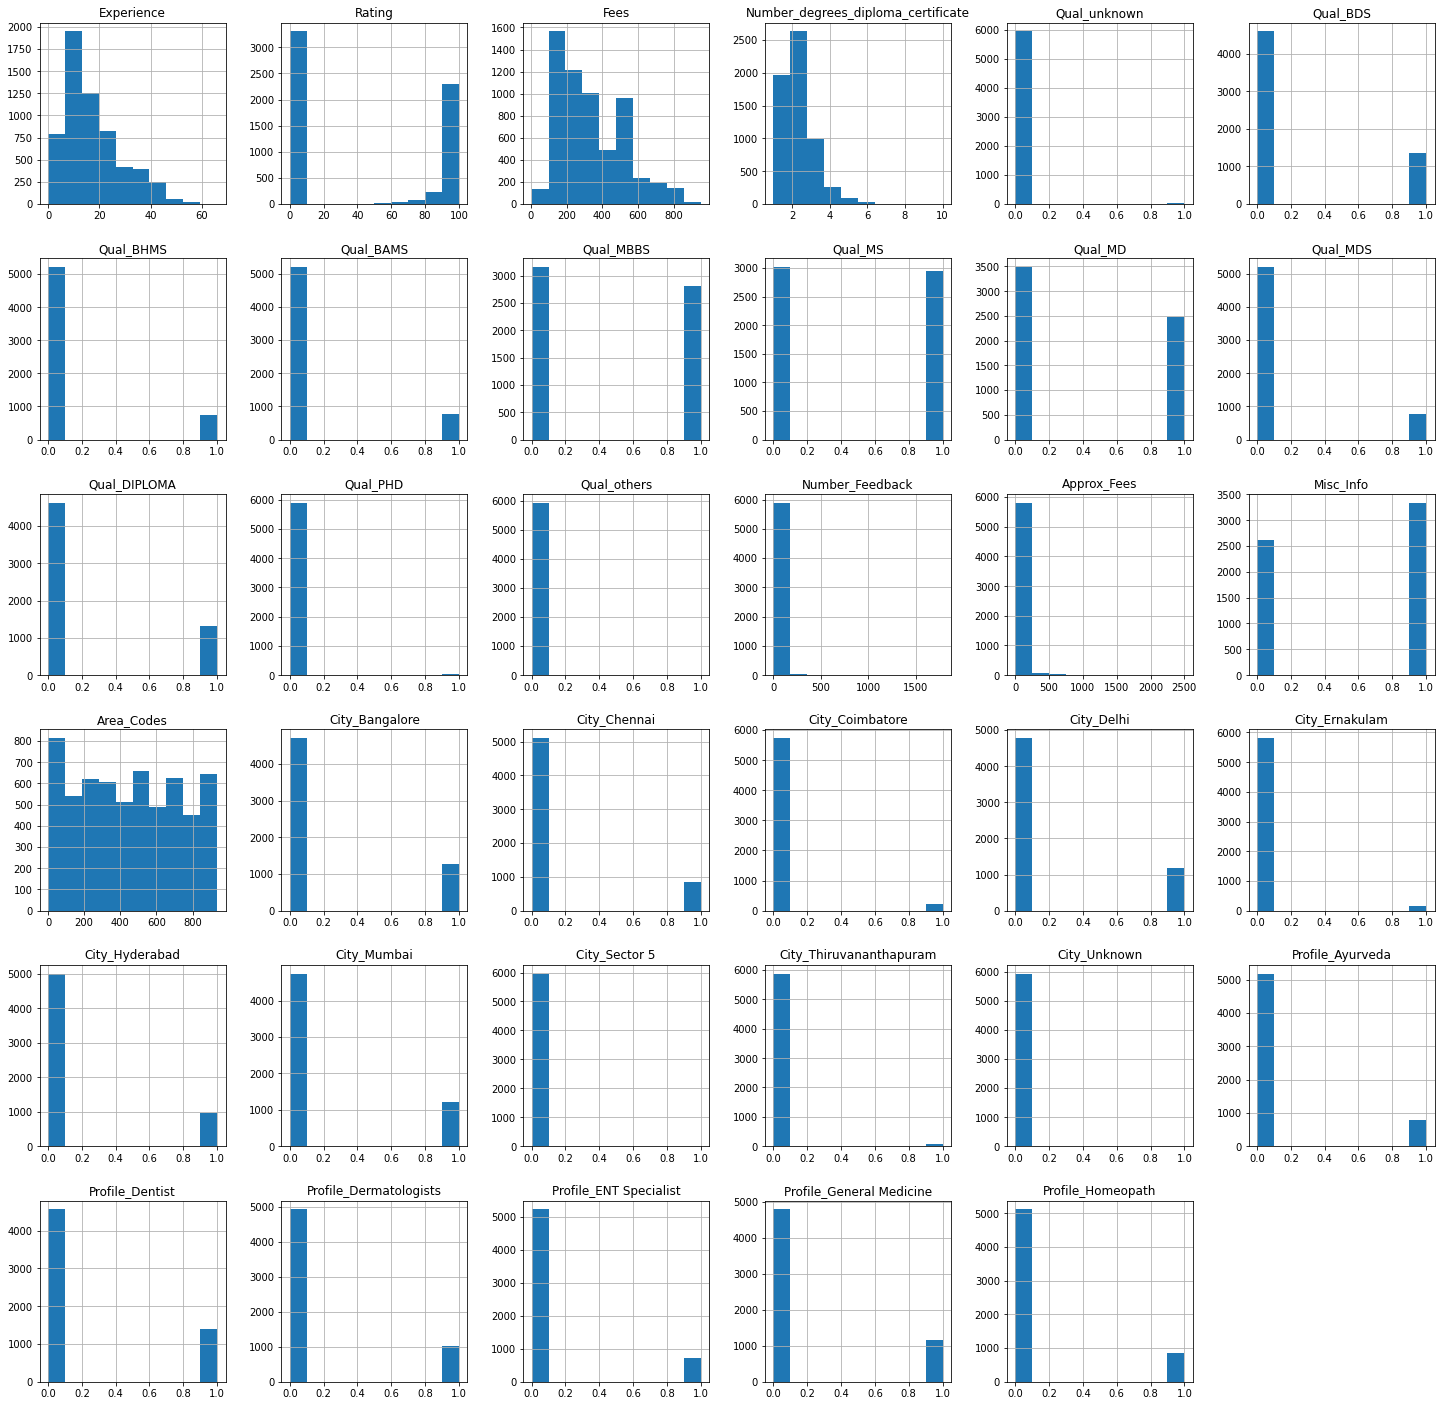

In [ ]:
train_df.hist(figsize=(25,25))
plt.show()

Observations:
1. The continuos variables Experience, Rating, Fees, Number_Degree_Diploma_Certificate are all right skewed.

### Univariant and BiVariant Analysis

In [ ]:
def plot(data_frame, col, target, count=True, sort = False, records = 10):
  if count:
    if data_frame[col].nunique() > 10:
      plt.figure(figsize=(25,10))
    else:
      plt.figure(figsize=(15,8))
    sns.countplot(x=col,data=data_frame)
    plt.show()
    
    print(f"\n{col}-Value Counts")
    print("Top 5")
    print(data_frame[col].value_counts().head())
    print("-"*50)
    print("Bottom 5")
    print(data_frame[col].value_counts().tail())
    print("="*50+"\n")
  
  if sort:
    
    pd.pivot_table(data_frame, index=[col], values= [target]).sort_values(by=target, ascending=False).head(records).plot.bar(figsize=(20,5))
    plt.title(f"Showing Top few average {target} for {col}")
    plt.show()
    print(f"\n{pd.pivot_table(data_frame, index=[col], values= [target]).sort_values(by=target, ascending=False).head(records)}\n\n")
    
    pd.pivot_table(data_frame, index=[col], values= [target]).sort_values(by=target, ascending=False).tail(records).plot.bar(figsize=(20,5))
    plt.title(f"Showing Bottom few average {target} for {col}")
    plt.show()
    print(f"\n{pd.pivot_table(data_frame, index=[col], values= [target]).sort_values(by=target, ascending=False).tail(records)}\n\n")
  else:
    pd.pivot_table(data_frame, index=[col], values= [target]).plot.bar(figsize=(20,5))
    plt.title(f"Showing average {target} for {col}")
    plt.show()
    print(f"\n{pd.pivot_table(data_frame, index=[col], values= [target]).sort_values(by=target, ascending=False)}\n\n")


#### Analysing Fees based on Experience of the Doctor.

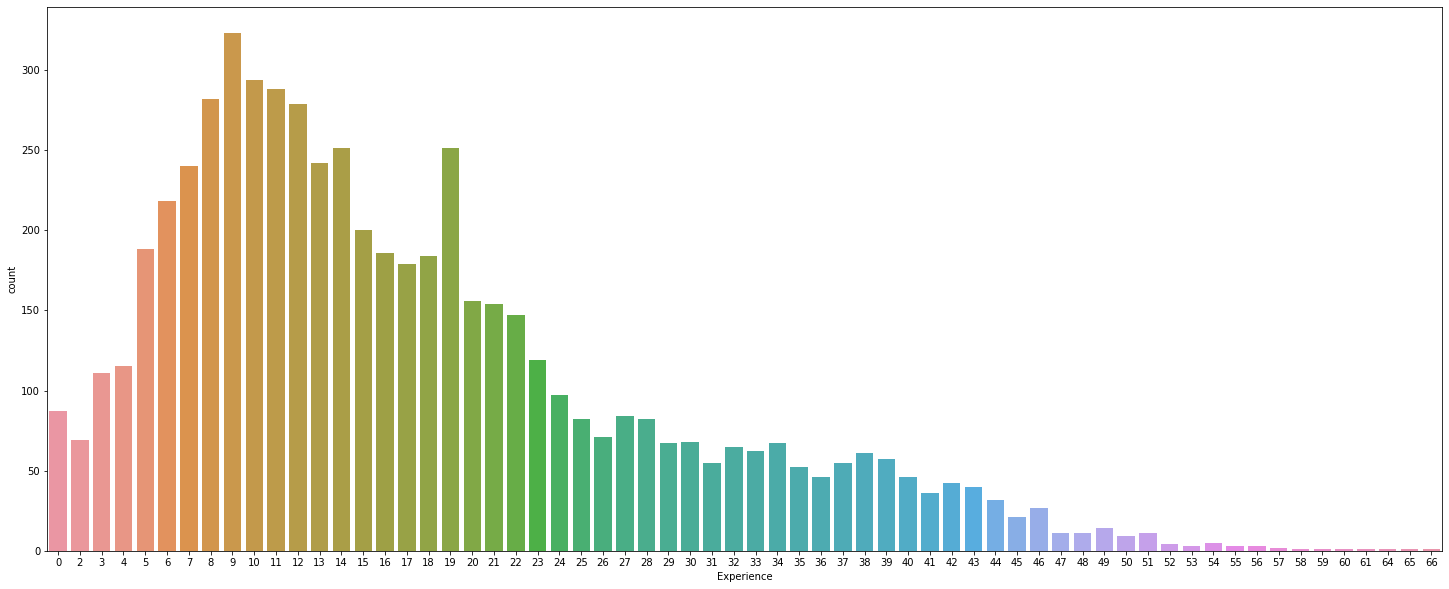


Experience-Value Counts
Top 5
9     323
10    294
11    288
8     282
12    279
Name: Experience, dtype: int64
--------------------------------------------------
Bottom 5
64    1
65    1
58    1
66    1
61    1
Name: Experience, dtype: int64



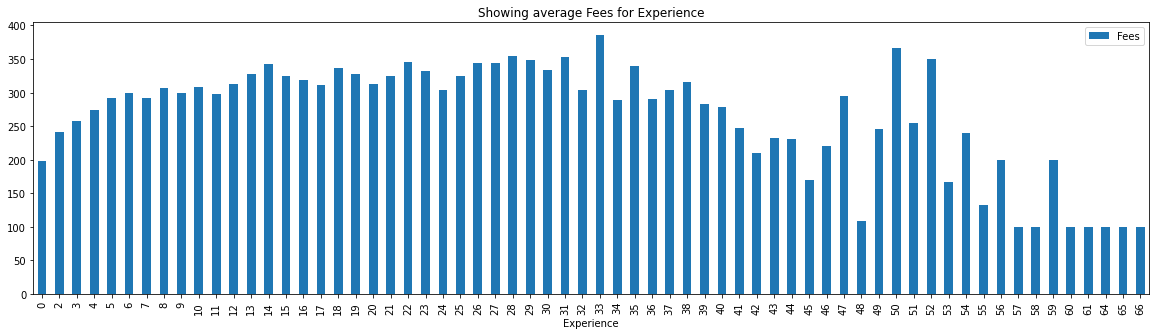


                  Fees
Experience            
33          385.483871
50          366.666667
28          354.512195
31          353.636364
52          350.000000
...                ...
60          100.000000
61          100.000000
64          100.000000
65          100.000000
66          100.000000

[64 rows x 1 columns]




In [ ]:
plot(train_df, 'Experience','Fees')

Observations:
1. Most doctors in the trainset have 8 to 12 years of experience.
2. There are 323 doctors who have 9 years experience
3. There are very less doctors who have more than 50 years experience.
4. Doctors with 33 years of experience get the highest average Fees. Followed by Doctors with 50 and 52 years of experience.
5. The average Fees is also decreasing significantly  as the years of experience is beyond 60. This can actually be related to the Profile and Qualifications of the doctors in that experience group since we do not have many doctors in that sample. Also there is a chance of Charity and Free for poor schemes many doctors usualy do.

#### Analysing Fees based on Doctor's Qualifications

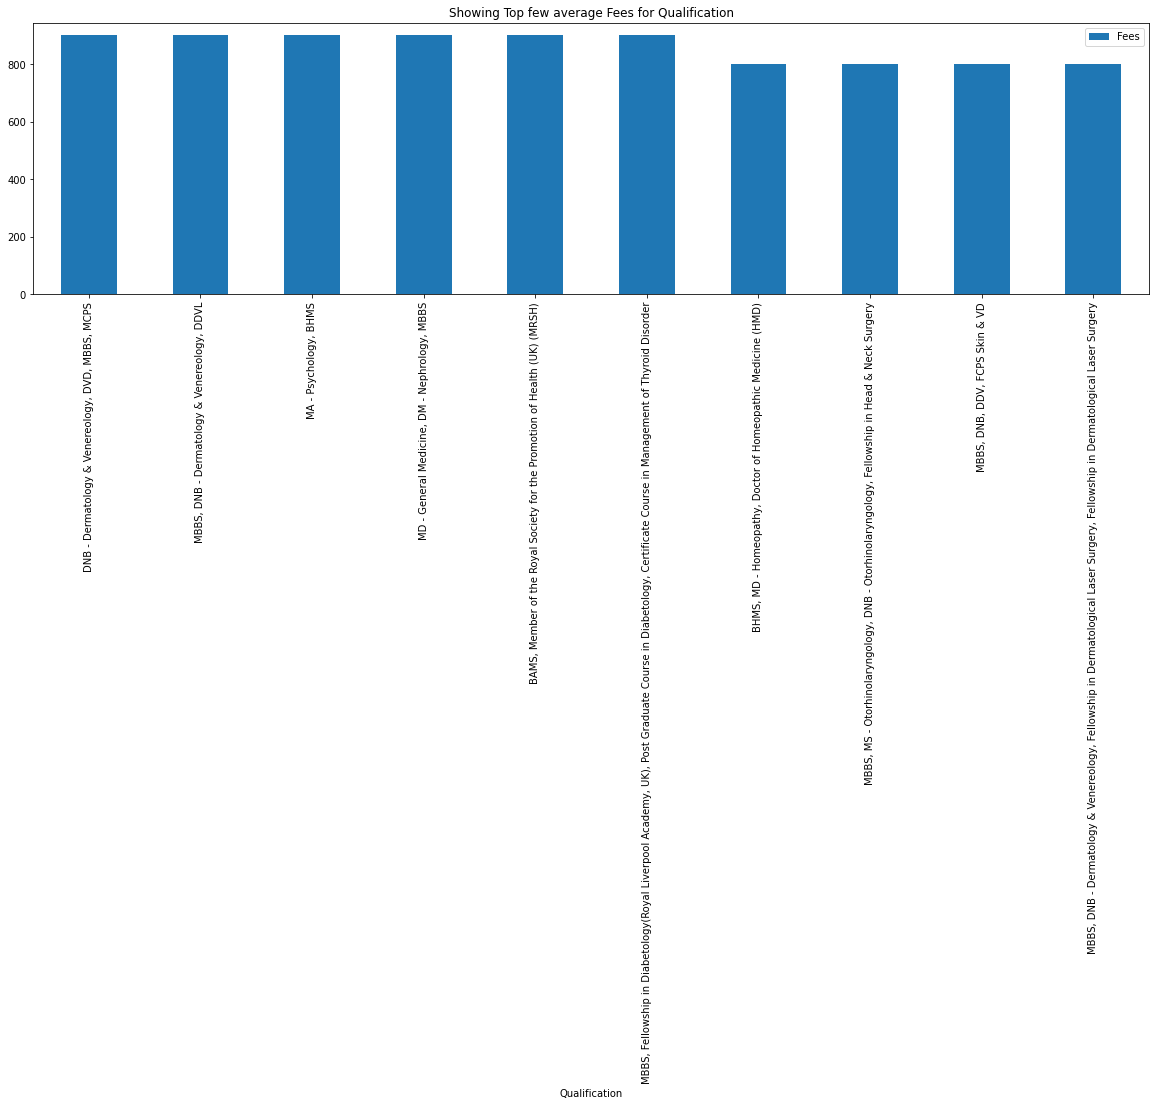


                                                     Fees
Qualification                                            
DNB - Dermatology & Venereology, DVD, MBBS, MCPS    900.0
MBBS, DNB - Dermatology & Venereology, DDVL         900.0
MA - Psychology, BHMS                               900.0
MD - General Medicine, DM - Nephrology, MBBS        900.0
BAMS, Member of the Royal Society for the Promo...  900.0
MBBS, Fellowship in Diabetology(Royal Liverpool...  900.0
BHMS, MD - Homeopathy, Doctor of Homeopathic Me...  800.0
MBBS, MS - Otorhinolaryngology, DNB - Otorhinol...  800.0
MBBS, DNB, DDV, FCPS Skin & VD                      800.0
MBBS, DNB - Dermatology & Venereology, Fellowsh...  800.0




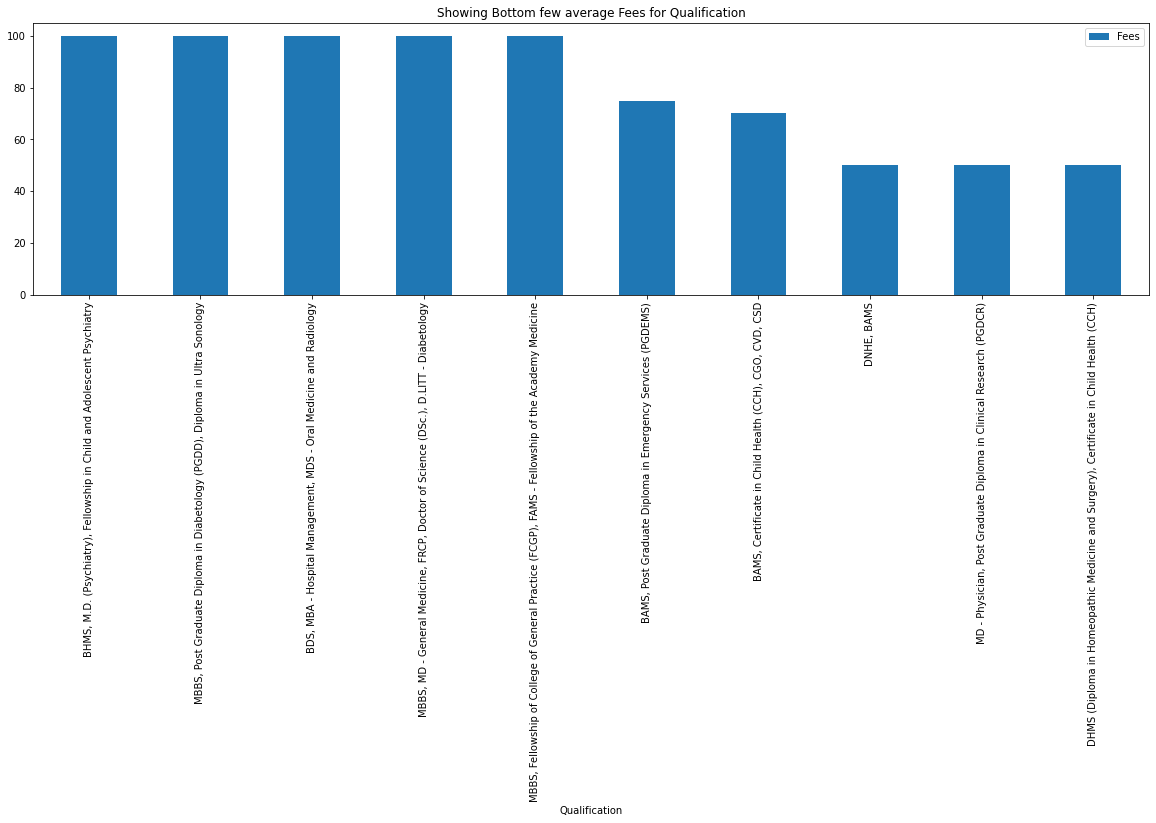


                                                     Fees
Qualification                                            
BHMS, M.D. (Psychiatry), Fellowship in Child an...  100.0
MBBS, Post Graduate Diploma in Diabetology (PGD...  100.0
BDS, MBA - Hospital Management, MDS - Oral Medi...  100.0
MBBS, MD - General Medicine, FRCP, Doctor of Sc...  100.0
MBBS, Fellowship of College of General Practice...  100.0
BAMS, Post Graduate Diploma in Emergency Servic...   75.0
BAMS, Certificate in Child Health (CCH), CGO, C...   70.0
DNHE, BAMS                                           50.0
MD - Physician, Post Graduate Diploma in Clinic...   50.0
DHMS (Diploma in Homeopathic Medicine and Surge...   50.0




In [ ]:
plot(train_df, 'Qualification', 'Fees',count=False, sort = True, records= 10)

Observations:
1. Some of the Highest average Fees are earned by Dermatologists and phycologists.

#### Analysing Fees based on the Rating.

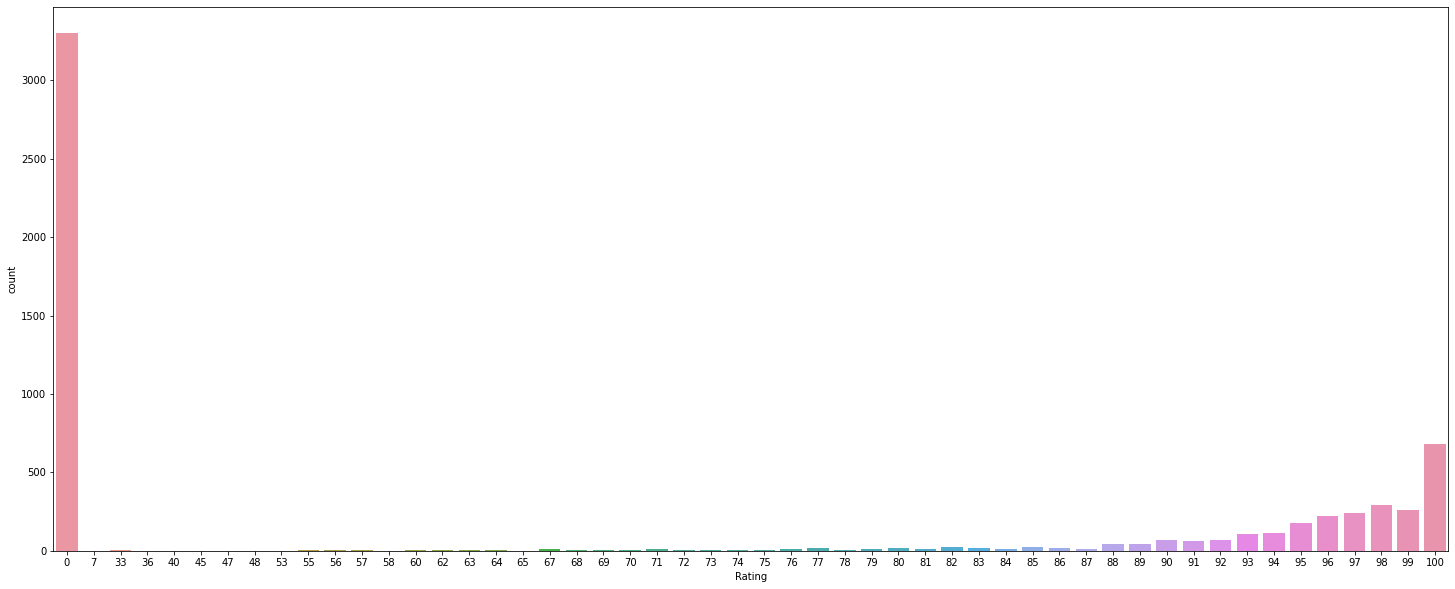


Rating-Value Counts
Top 5
0      3302
100     684
98      290
99      259
97      241
Name: Rating, dtype: int64
--------------------------------------------------
Bottom 5
58    1
48    1
40    1
36    1
45    1
Name: Rating, dtype: int64



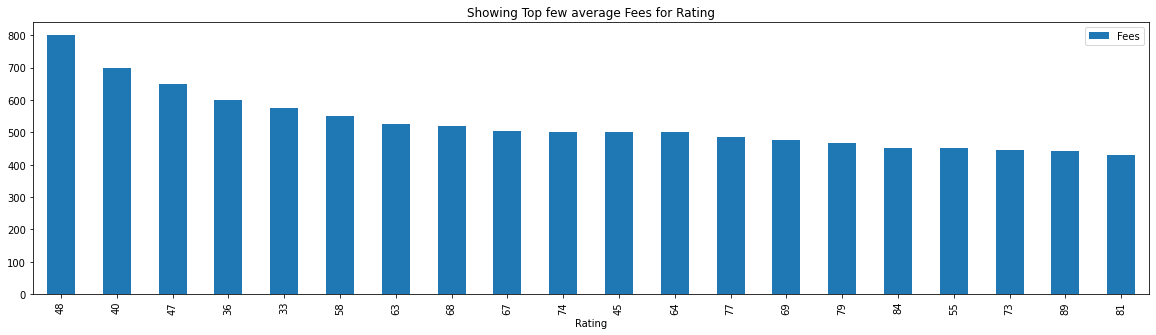


              Fees
Rating            
48      800.000000
40      700.000000
47      650.000000
36      600.000000
33      575.000000
58      550.000000
63      525.000000
68      520.000000
67      504.166667
74      500.000000
45      500.000000
64      500.000000
77      484.375000
69      475.000000
79      465.384615
84      450.000000
55      450.000000
73      443.750000
89      442.738095
81      429.166667




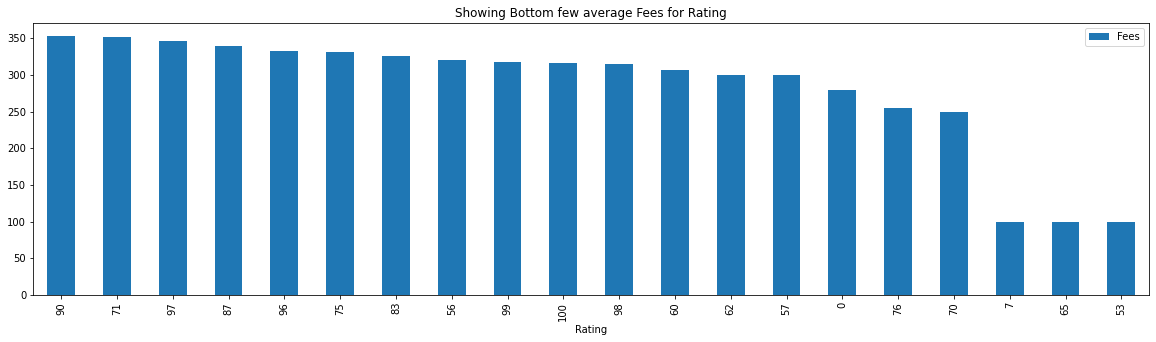


              Fees
Rating            
90      353.030303
71      351.111111
97      346.058091
87      339.285714
96      332.500000
75      331.250000
83      326.190476
56      320.000000
99      317.374517
100     316.564327
98      314.758621
60      307.142857
62      300.000000
57      300.000000
0       279.804058
76      255.555556
70      250.000000
7       100.000000
65      100.000000
53      100.000000




In [ ]:
plot(train_df, 'Rating', 'Fees',count=True, sort = True, records= 20)

Observations:
1. Most records do not have Ratings. 100 is the most frequent rating for the records that have rating.
2. There is only one record with Rating = 48 and that doctor is collecting a fees of 800 INR.
3. Some of the highest average Fees are for Ratings that have very less number of records.
4. The average Fees for most of the higher ratings are less than 350 INR.

#### Analysing Fees Based on Profile

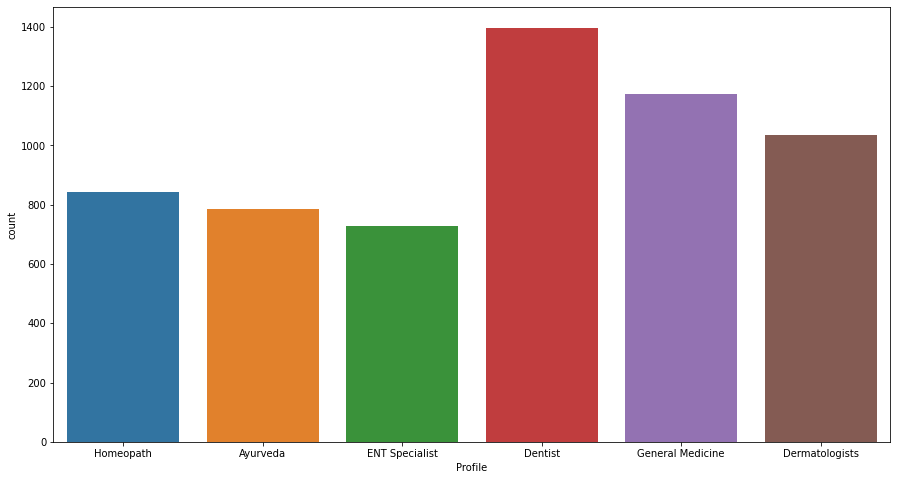


Profile-Value Counts
Top 5
Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
Name: Profile, dtype: int64
--------------------------------------------------
Bottom 5
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64



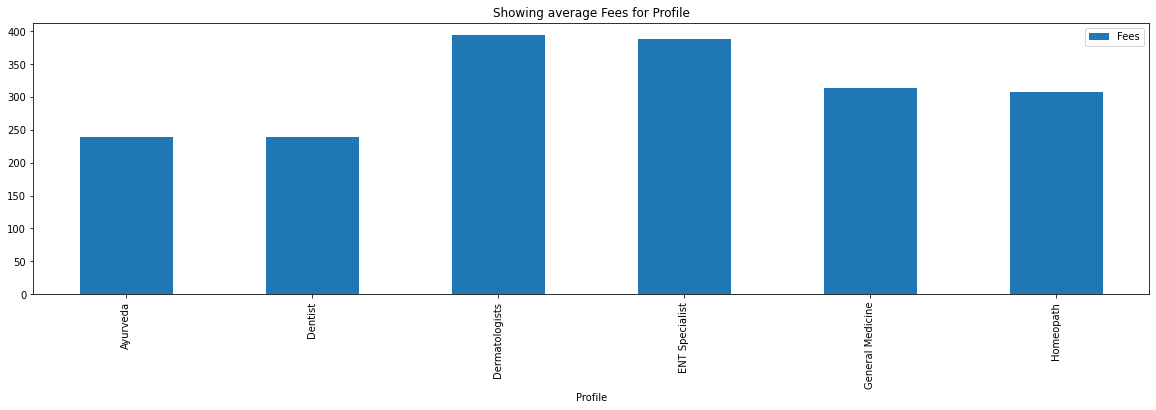


                        Fees
Profile                     
Dermatologists    393.133462
ENT Specialist    387.321429
General Medicine  313.908781
Homeopath         306.499407
Ayurveda          238.968193
Dentist           238.199714




In [ ]:
plot(train_df, 'Profile', 'Fees',count=True, sort = False)

Observations:
1. Most of the doctors in the Trainset are dentists followed by General Medicines.
2. Dermatologists earn the highest average Fees followed by ENT Specialists.
3. Lowest Average Fees is earned by Dentists.

#### Analysing Fees base on the Number of Degrees.

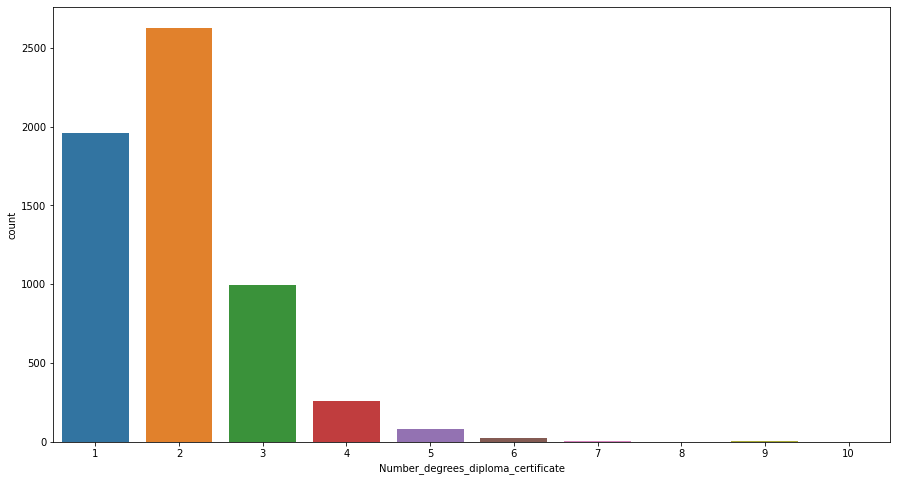


Number_degrees_diploma_certificate-Value Counts
Top 5
2    2628
1    1962
3     995
4     257
5      84
Name: Number_degrees_diploma_certificate, dtype: int64
--------------------------------------------------
Bottom 5
6     23
7      6
9      3
8      2
10     1
Name: Number_degrees_diploma_certificate, dtype: int64



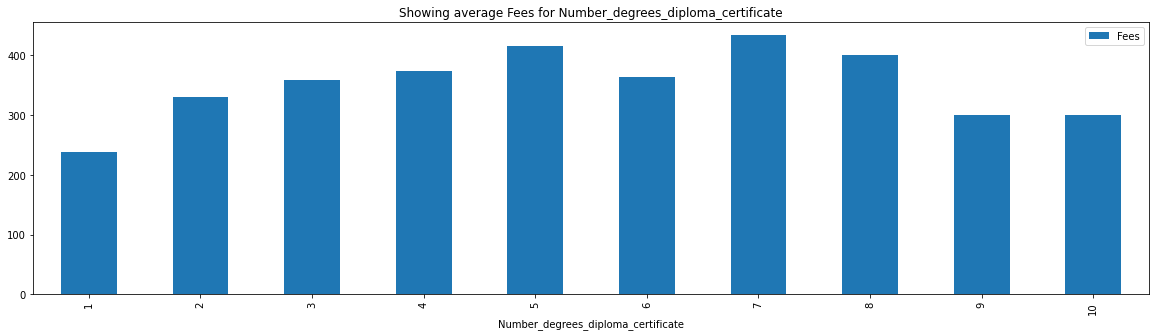


                                          Fees
Number_degrees_diploma_certificate            
7                                   433.333333
5                                   416.309524
8                                   400.000000
4                                   373.540856
6                                   363.043478
3                                   358.412060
2                                   330.705860
9                                   300.000000
10                                  300.000000
1                                   237.524465




In [ ]:
plot(train_df, 'Number_degrees_diploma_certificate', 'Fees',count=True, sort = False)

Observations:
1. Most of the Doctors have 2 degrees in their Qualification.
2. Very less number of Doctors hav e done more than 5 degrees.
3. Records with Number of degrees of 7 have the highest Average Fees followed by 5 and 8 number of degrees.
4. The least average Fees is earned by Doctors who have only one degree in their Qualification.
5. Doctors that have 9/10 degrees are also on the lower side of the Average Fees.


#### Analysing Fees based on the City

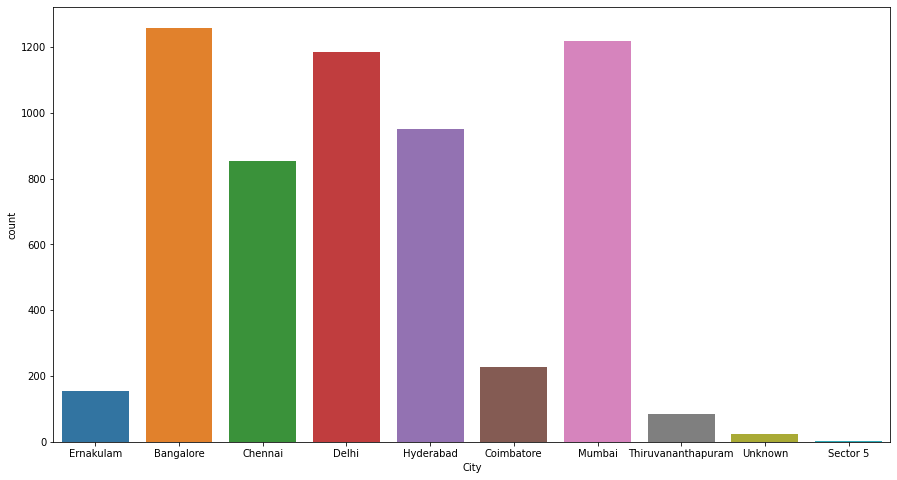


City-Value Counts
Top 5
Bangalore    1259
Mumbai       1219
Delhi        1184
Hyderabad     951
Chennai       855
Name: City, dtype: int64
--------------------------------------------------
Bottom 5
Coimbatore            228
Ernakulam             153
Thiruvananthapuram     86
Unknown                25
Sector 5                1
Name: City, dtype: int64



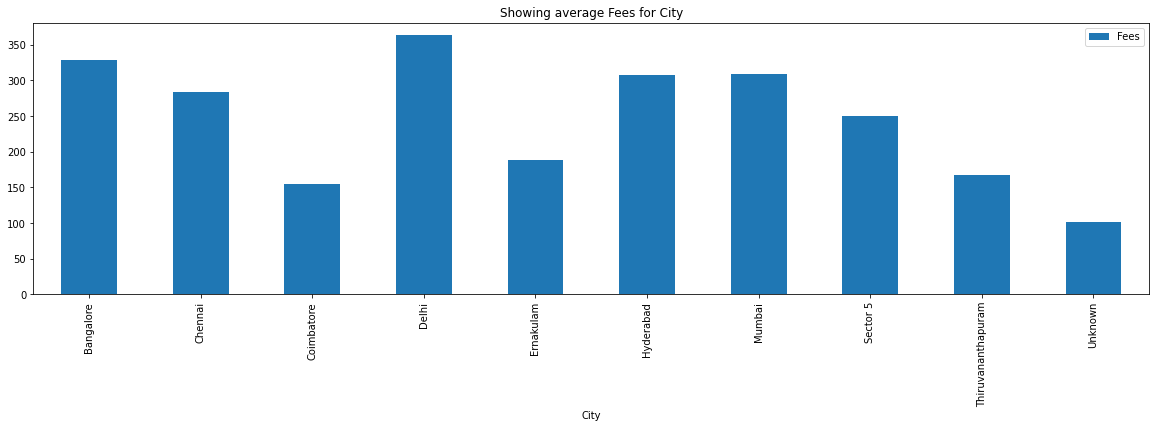


                          Fees
City                          
Delhi               363.006757
Bangalore           328.779984
Mumbai              308.292863
Hyderabad           307.507886
Chennai             283.602339
Sector 5            250.000000
Ernakulam           188.431373
Thiruvananthapuram  167.267442
Coimbatore          154.298246
Unknown             102.000000




In [ ]:
plot(train_df, 'City', 'Fees',count=True)

Observations:
1. Most frequent City in the train set is Bangalore and the 2nd most frequent City is Mumbai.
2. Sector 5 and Unknown are the least occuring categories in the City variable.
3. Delhi has the highest Average Fees followed by Bangalore. The Category 'Unknown' has the lowest Average Fees.

#### Analysing Fees based on Area

In [ ]:
train_df['Area'].value_counts().head(10)

HSR Layout        75
Andheri West      70
Dwarka            68
Banjara Hills     64
Mulund West       54
Borivali West     52
Kandivali West    50
Indiranagar       48
Whitefield        47
Malad West        47
Name: Area, dtype: int64

Observations:
1. The most frequent Area in the train set is the 'HSR Layout' followed by Andheri West and Dwarka.

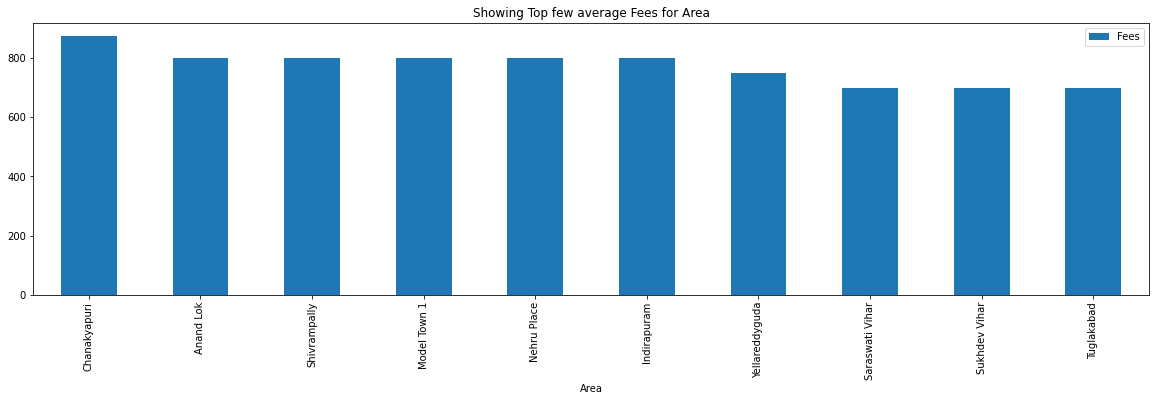


                  Fees
Area                  
Chanakyapuri     875.0
Anand Lok        800.0
Shivrampally     800.0
Model Town 1     800.0
Nehru Place      800.0
Indirapuram      800.0
Yellareddyguda   750.0
Saraswati Vihar  700.0
Sukhdev Vihar    700.0
Tuglakabad       700.0




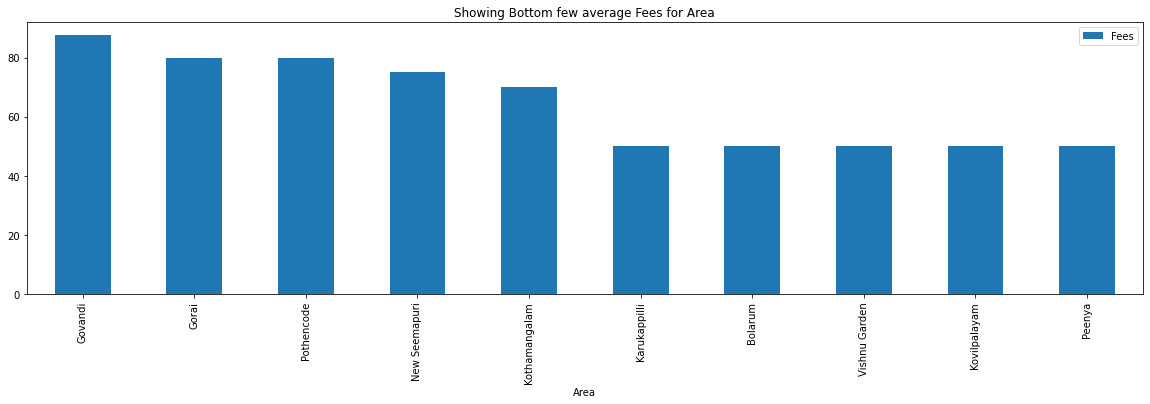


               Fees
Area               
Govandi        87.5
Gorai          80.0
Pothencode     80.0
New Seemapuri  75.0
Kothamangalam  70.0
Karukappilli   50.0
Bolarum        50.0
Vishnu Garden  50.0
Kovilpalayam   50.0
Peenya         50.0




In [ ]:
plot(train_df, 'Area', 'Fees',count=False, sort = True)

Observations:
1. The highest average Fees is in Chanakyapuri and the 2nd highest average Fees is at Anand Lok.
2. The least average Fees is in Peenya, Kovilpalayam, Vishnu Garden, Bolarum and Karukappilli.

#### Analysing Fees based on the number of feedbacks

In [ ]:
train_df['Number_Feedback'].value_counts().head(10)

0     4392
1       94
3       85
4       84
5       71
2       61
8       60
7       53
9       48
11      47
Name: Number_Feedback, dtype: int64

Observations:
1. About 4392 of the records do not have Feedbacks.
2. For the records that have feedbacks, the most frequent number of Feedback is just 1.

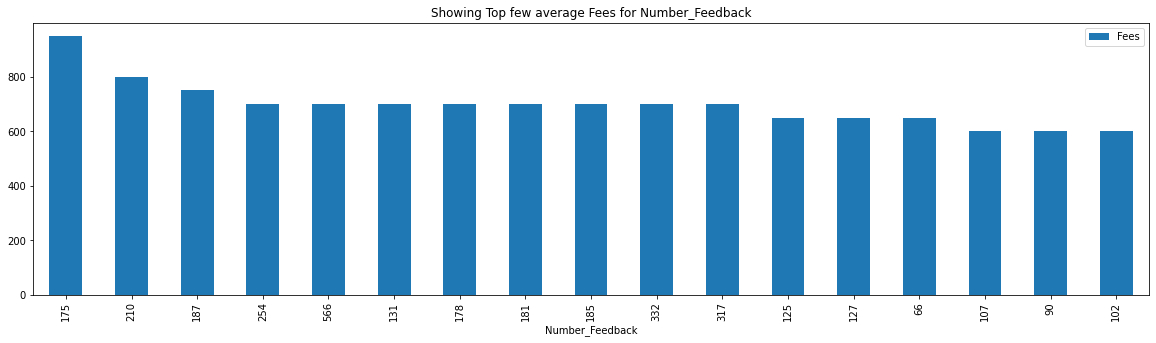


                  Fees
Number_Feedback       
175              950.0
210              800.0
187              750.0
254              700.0
566              700.0
131              700.0
178              700.0
181              700.0
185              700.0
332              700.0
317              700.0
125              650.0
127              650.0
66               650.0
107              600.0
90               600.0
102              600.0




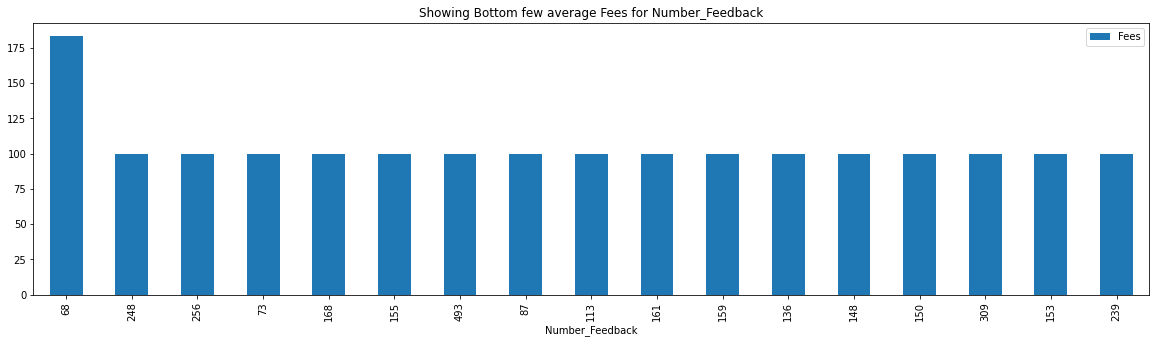


                       Fees
Number_Feedback            
68               183.333333
248              100.000000
256              100.000000
73               100.000000
168              100.000000
155              100.000000
493              100.000000
87               100.000000
113              100.000000
161              100.000000
159              100.000000
136              100.000000
148              100.000000
150              100.000000
309              100.000000
153              100.000000
239              100.000000




In [ ]:
plot(train_df, 'Number_Feedback', 'Fees',count=False, sort = True, records = 17)

Observations:
1. The Highest average Fees is for records that have 175 number of feedbacks forllowed by 210 and 187 feedbacks.
2. The least average Fees is for records that have (248,256,73,168,155,493,87,113,161,159,136,148,150,309,153 and 239) feedbacks.

#Analysing Fees based on the different Qualifications

In [ ]:
qual_columns = ['Qual_unknown', 'Qual_BDS', 'Qual_BHMS', 'Qual_BAMS', 'Qual_MBBS', 'Qual_MS', 'Qual_MD', 'Qual_MDS', 'Qual_DIPLOMA', 'Qual_PHD', 'Qual_others']
qual_avg_fees = {}
for col in qual_columns:
  qual_avg_fees[col] = train_df[train_df[col] == 1]['Fees'].mean()

qual_avg_fees

{'Qual_BAMS': 238.18766404199476,
 'Qual_BDS': 238.26358296622612,
 'Qual_BHMS': 306.7232620320856,
 'Qual_DIPLOMA': 360.2631578947368,
 'Qual_MBBS': 362.8288770053476,
 'Qual_MD': 331.7131877022654,
 'Qual_MDS': 264.67105263157896,
 'Qual_MS': 296.6603260869565,
 'Qual_PHD': 258.49056603773585,
 'Qual_others': 236.8421052631579,
 'Qual_unknown': 100.0}

In [ ]:
Qual_Fees_df = pd.DataFrame({'Qualifications':qual_avg_fees.keys(),'Average_Fees':qual_avg_fees.values()})

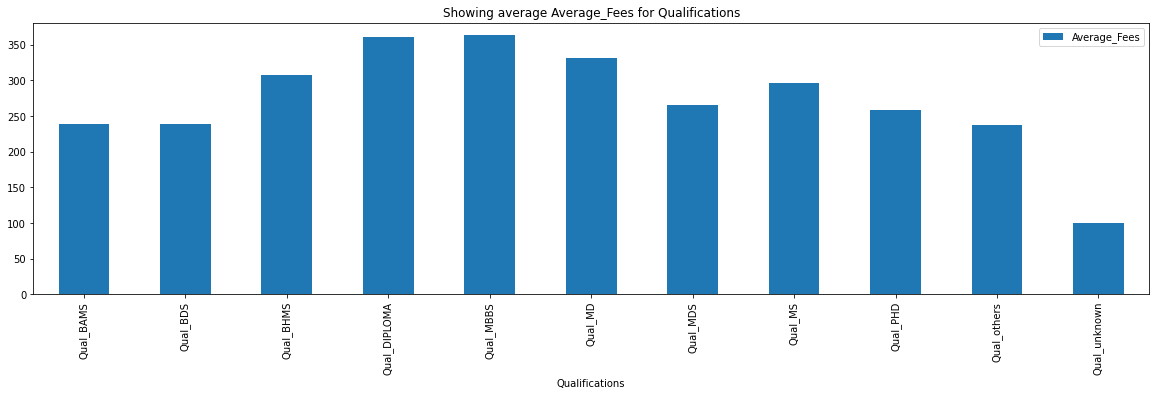


                Average_Fees
Qualifications              
Qual_MBBS         362.828877
Qual_DIPLOMA      360.263158
Qual_MD           331.713188
Qual_BHMS         306.723262
Qual_MS           296.660326
Qual_MDS          264.671053
Qual_PHD          258.490566
Qual_BDS          238.263583
Qual_BAMS         238.187664
Qual_others       236.842105
Qual_unknown      100.000000




In [ ]:
plot(Qual_Fees_df, 'Qualifications', 'Average_Fees', count=False)

Observations:
1. All these Qualifications may have a conbination of other degrees also.
2. MBBS seem to have the highest Average Fees. Doctors with some Diploma along with some degree seem to have the second highest average fees.
3. The lowest Average Fees is for records with Qualification Unknown.

#### Analysing Fees based on the availability of Miscellaneous_Info

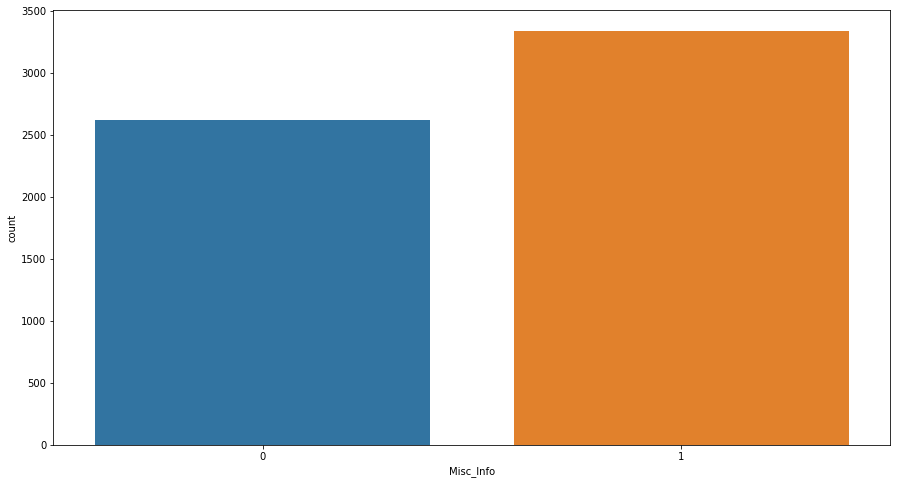


Misc_Info-Value Counts
Top 5
1    3341
0    2620
Name: Misc_Info, dtype: int64
--------------------------------------------------
Bottom 5
1    3341
0    2620
Name: Misc_Info, dtype: int64



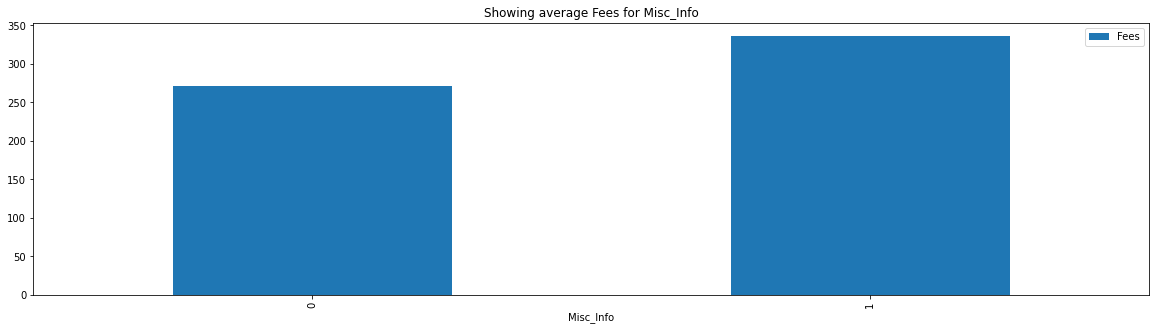


                 Fees
Misc_Info            
1          336.424723
0          271.627099




In [ ]:
plot(train_df, 'Misc_Info', 'Fees')

Observations:
1. There are more number of records in trainset that has Miscellaneous_Info that those that do not have.
2. The Average Fees of records that have Miscellaneous_Info is greater than those that do not have.

### Multivariant Analysis

#### Analysing Fees for each Profile based on City

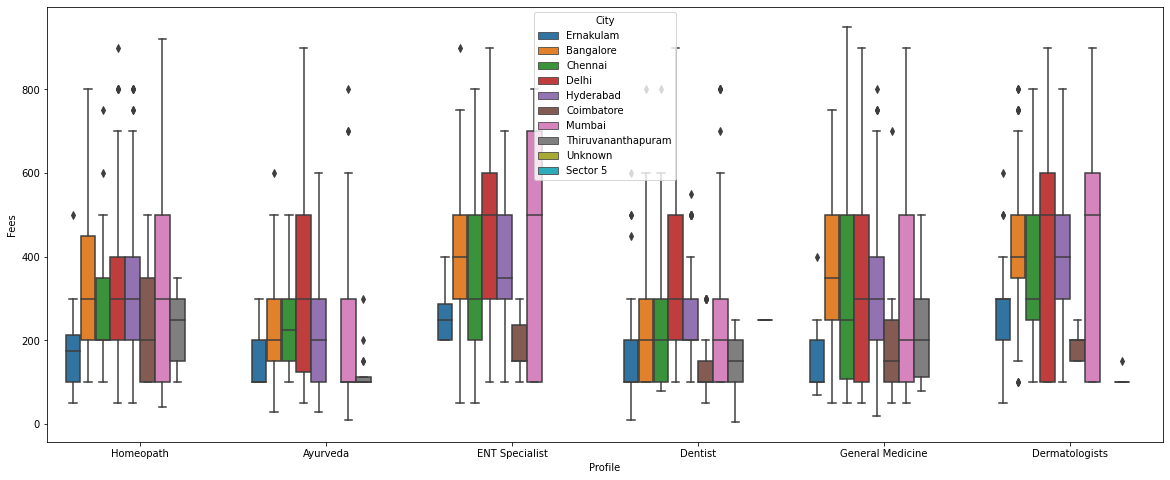

In [ ]:
plt.figure(figsize=(20,8))
sns.boxplot(x='Profile', y='Fees', data= train_df, hue='City')
plt.show()

Observations:
1. For Homeopathy Doctors, the highest fees is in Mumbai and the lowest is in Ernakulam.
2. For Ayurvedic Doctors, the highest fees is in Delhi and the lowest average Fees is in Thiruvananthapuram and Ernakulam.
3. For ENT related Specialist doctors, the highest fees is in Delhi and the lowest is in Thiruvanathapuram and Banglore. In Coibatore also the whole range of Fees is pretty low.
4. For Dentists, the highest fees is in Delhi and the lowest is in Thirivananthapuram. The lowest range of fees is in Coimbatore.
5. For General Physians, the highest fees is in Chennai however, the highest average Fees is in Bangalore. The lowest fees is in Hyderabad. The lowest range of fees for General Medicine is in Ernakulam.
6. For Dematologists, the highest fees is in Delhi and Mumbai. The lowest fees is in Eranakulam. The lowest range of fees is in Coimbatore.

#### Analysing Fees for each Profile based on Number of degrees the Doctor hold.

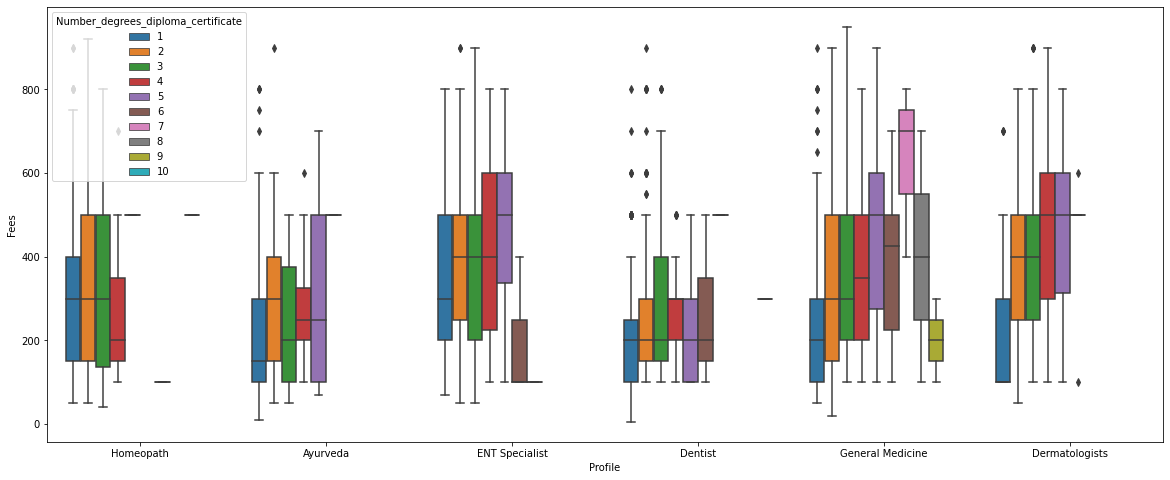

In [ ]:
plt.figure(figsize=(20,8))
sns.boxplot(x='Profile', y='Fees', data= train_df, hue='Number_degrees_diploma_certificate')
plt.show()

Observations:
1. For Homeopathy Doctors, the highest fees collected by Doctors with 2 Degrees/Diplomas/certificates.
2. For Ayurvedic Doctors, the highest fees collected by Doctors with 5 Degrees/Diplomas/certificates and the lowest fees is collected by Doctors with just  1 Degree.
3. For ENT related Specialist doctors, the highest average fees is collected by Doctors with 5 Degrees/Diplomas/certificates and the lowest range of fees is collected by doctors with 6 Degrees/Diplomas/certificates. The lowest fees is collected by doctors with 2 or 3 Degrees/Diplomas/certificates.
4. For Dentists, the highest fees collected by doctors with 3 Degrees/Diplomas/certificates and the doctors with just 1 degree collect the lowest fees.
5. For General Medicines, the highest fees is collected by doctors that have 3 Degrees/Diplomas/certificates. The lowest fees is collected by doctors that have 2 Degrees/Diplomas/certificates..
6. For Dematologists, the highest fees is collected by doctors that have  Degrees/Diplomas/certificates. The lowest fees is collected by doctors with 2 Degrees/Diplomas/certificates.

#### Fees based on Profile and Experience

##### Experience of 1 to 10 years

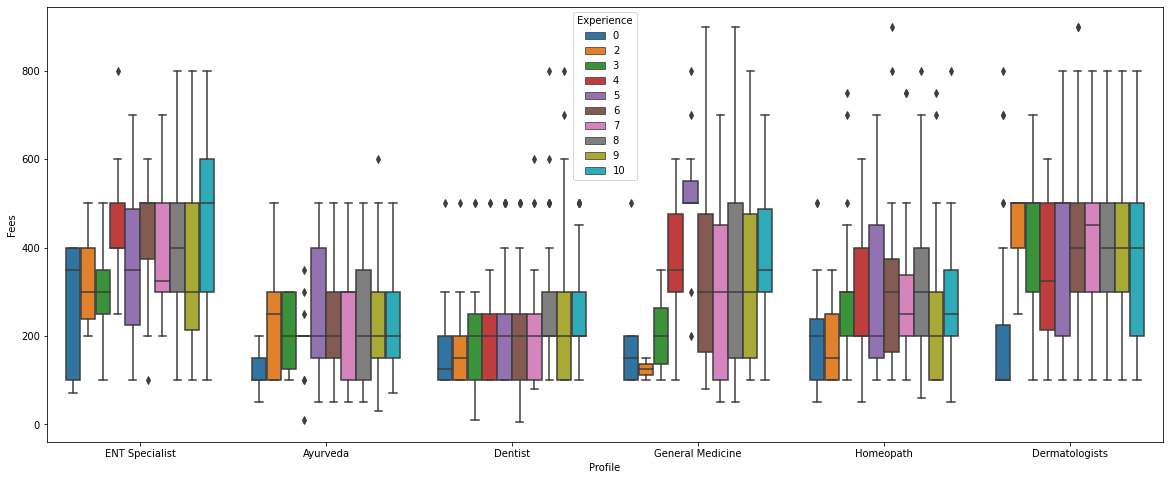

In [ ]:
plt.figure(figsize=(20,8))
sns.boxplot(x='Profile', y='Fees', data= train_df[train_df['Experience']<11], hue='Experience')
plt.show()

Observations:
1. We can see that consistently a very new Doctor with less than a year's experience is getting the lowest Fees in all Profiles.
2. In Dermatology, once a doctor have at least 2 years of experience, the fee has significantly increased.

##### Experience of 11 to 20 years

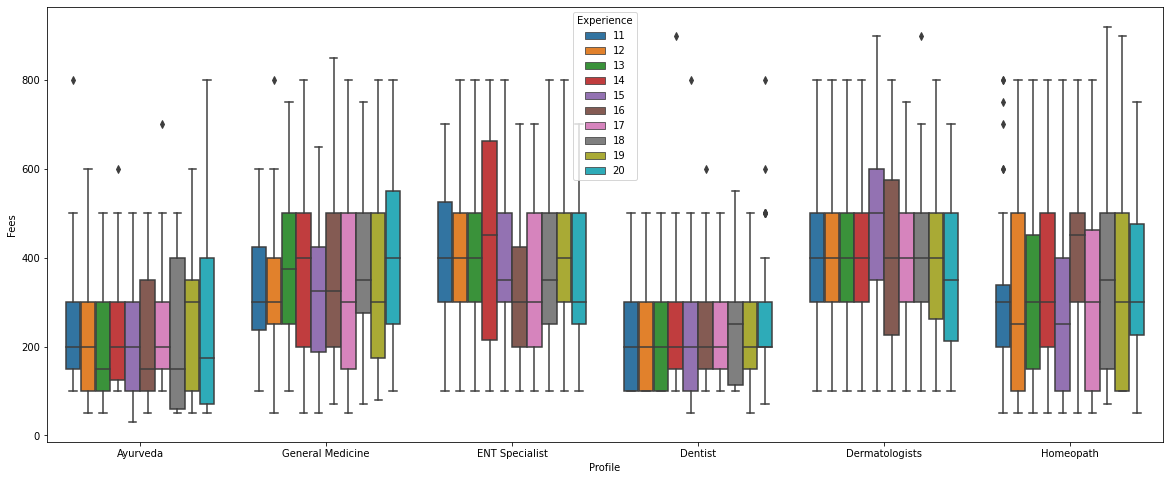

In [ ]:
plt.figure(figsize=(20,8))
sns.boxplot(x='Profile', y='Fees', data= train_df[(train_df['Experience']>10)&(train_df['Experience']<21)], hue='Experience')
plt.show()

Observations:
1. Dentists are all getting pretty similar fees in the experience range 11 to 20 years.
2. The average fees of a Dermatologist is the highest in the an experience ranga 110 to 20 years.

##### Experience of 21 to 30 years

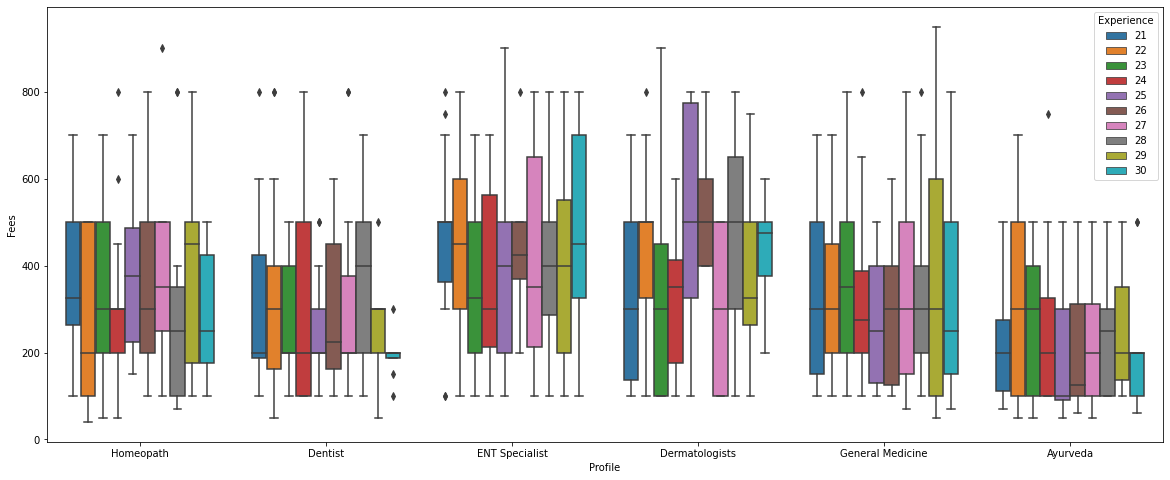

In [ ]:
plt.figure(figsize=(20,8))
sns.boxplot(x='Profile', y='Fees', data= train_df[(train_df['Experience']>20)&(train_df['Experience']<31)], hue='Experience')
plt.show()

Observations:
1. The Doctors in Ayuveda are getting the lowest average in the experience range of 21 to 30 years.
2. The Dermatologists are the once that get the highest fees with experience 25, 26 and 28 years of experience.

##### Experience of 31 to 40 years.

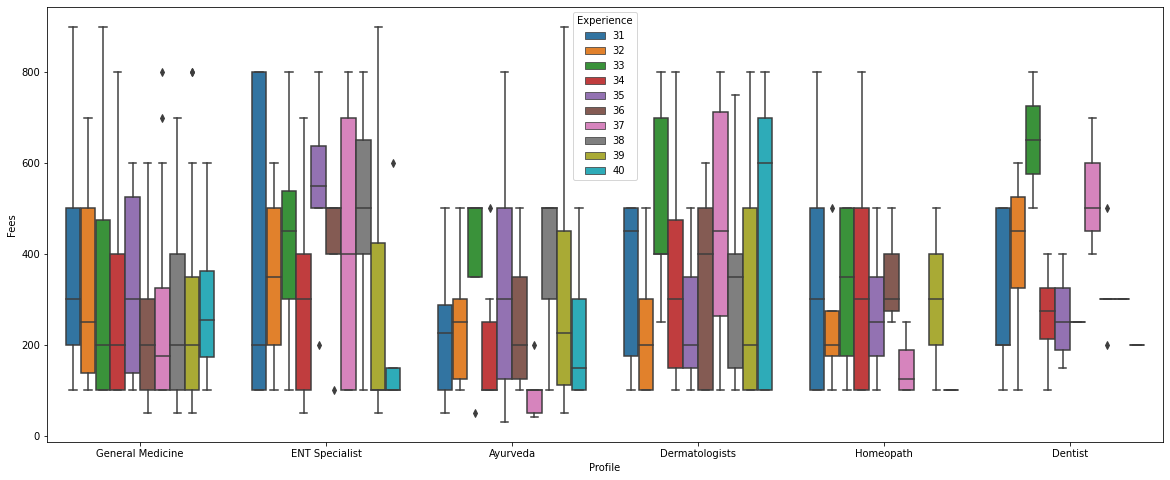

In [ ]:
plt.figure(figsize=(20,8))
sns.boxplot(x='Profile', y='Fees', data= train_df[(train_df['Experience']>30)&(train_df['Experience']<41)], hue='Experience')
plt.show()

Observations:
1. In the experience range of 31 to 40 years, the Dentists with 33years experience is getting the highest average fees.
2. The lowest average fees is collected by Ayuredic doctors with 37 years of experience. in this experience range.

##### Experience of 41 to 50 years

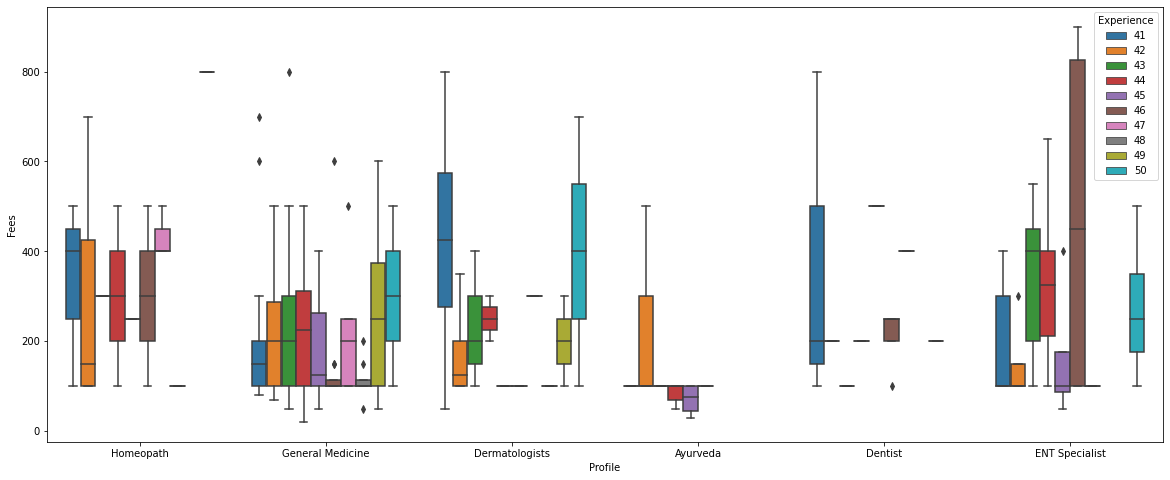

In [ ]:
plt.figure(figsize=(20,8))
sns.boxplot(x='Profile', y='Fees', data= train_df[(train_df['Experience']>40)&(train_df['Experience']<51)], hue='Experience')
plt.show()

Observations:
1. The doctors of ayurveda are getting very low average fees in the experience range 41 to 50 years.

##### Experience of above 50 years

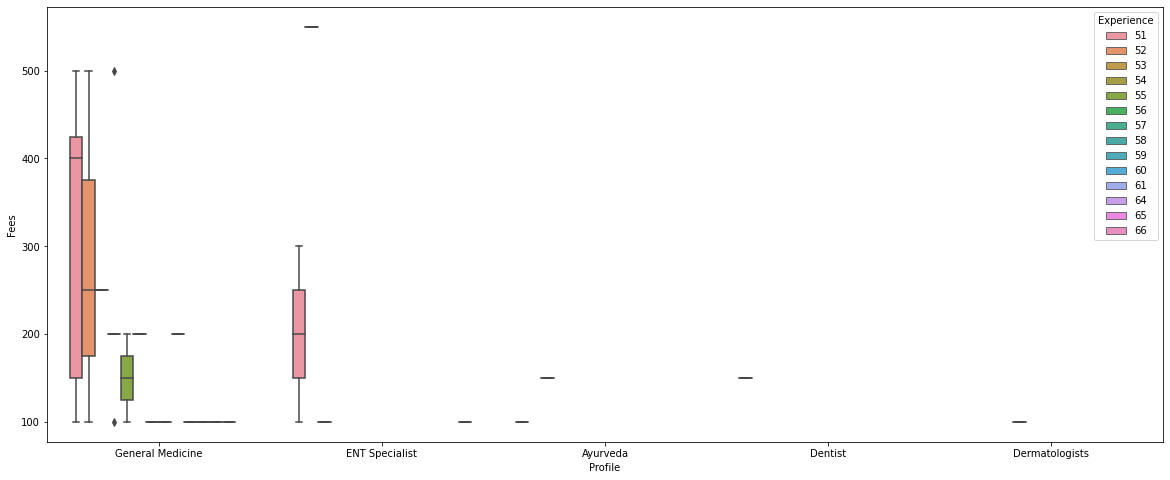

In [ ]:
plt.figure(figsize=(20,8))
sns.boxplot(x='Profile', y='Fees', data= train_df[train_df['Experience']>50], hue='Experience')
plt.show()

Observations:
1. Doctors of General Medicine with 51 years of experience is getting the highest average Fees in this experience range.

#### Approx_Fees vs Fees

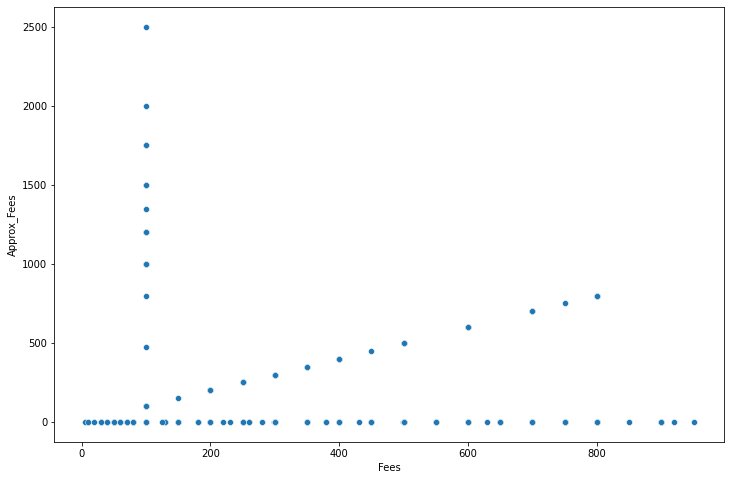

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Fees', y='Approx_Fees', data = train_df)

plt.show()

Observations:
1. This is very weird distribution.

#### Rating vs Fees

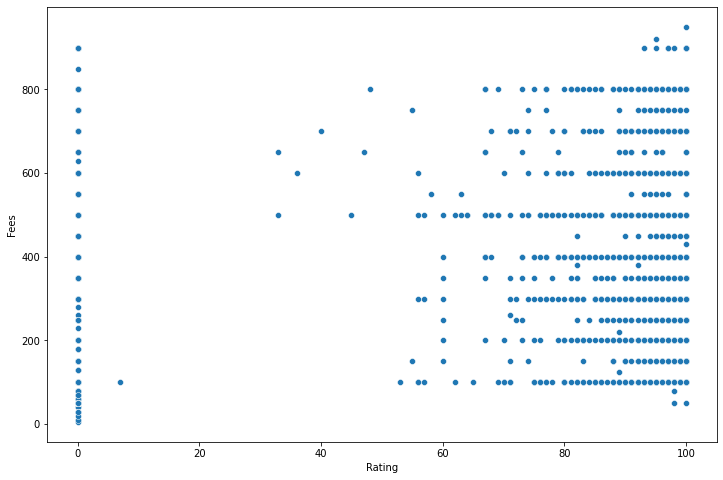

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Rating', y='Fees', data = train_df)
plt.show()

Observations:
1. The Highest Fees are collected by doctors with Highest ratings.

#### Number Feedback vs Fees

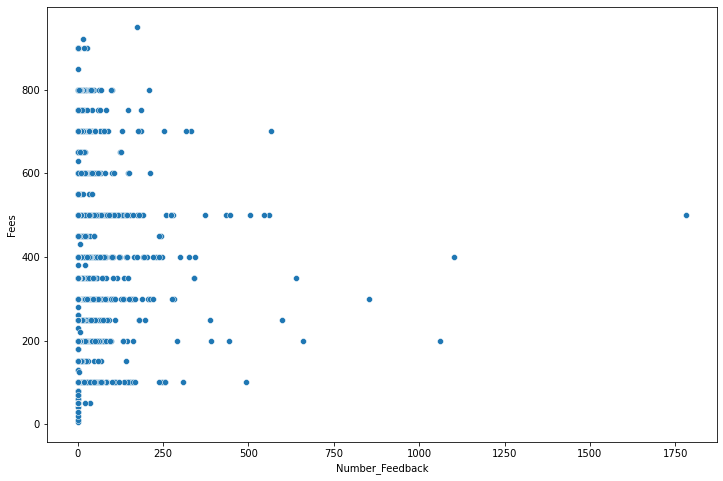

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Number_Feedback', y='Fees', data = train_df)
plt.show()

## Outliers

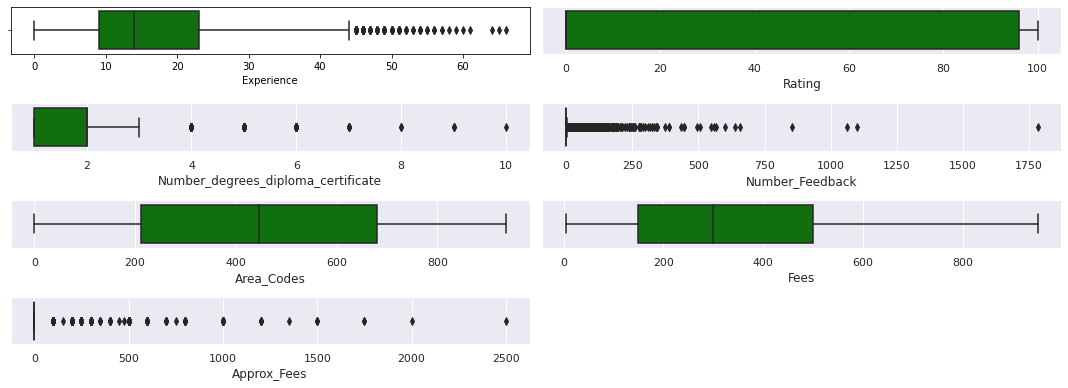

In [12]:
columns = ['Experience','Rating','Number_degrees_diploma_certificate','Number_Feedback','Area_Codes','Fees','Approx_Fees']

plt.figure(figsize=(15, 40))
for i in range(0,len(columns)):
  plt.subplot(30,2,i+1)
  sns.set(font_scale = 1)
  sns.boxplot(train_df[columns[i]], color='green')
  plt.tight_layout()


In [13]:
zf = np.abs(zscore(train_df.drop(['Qualification','Profile', 'Fees','Area', 'City'], axis=1)))
threshold = 3
train_df_no_out = train_df[(zf < threshold).all(axis=1)]
print(f"{round((train_df.shape[0] - train_df_no_out.shape[0])/ train_df.shape[0]*100)}% data removed as outliers.")

14% data removed as outliers.


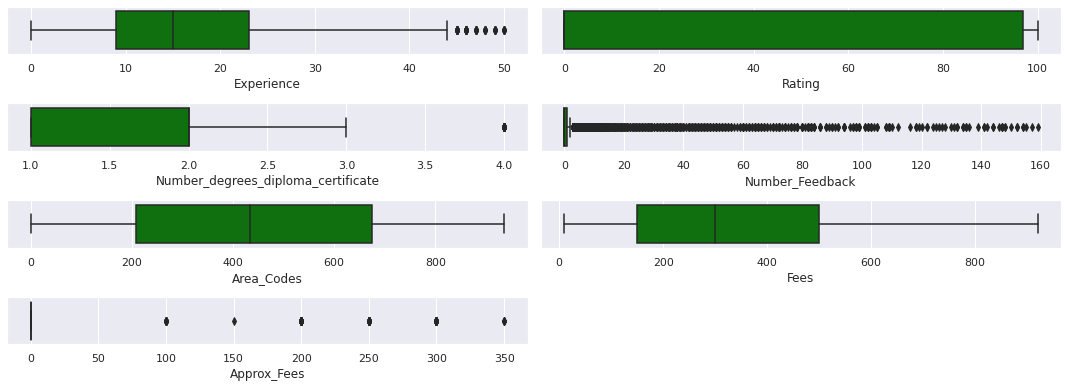

In [14]:
columns = ['Experience','Rating','Number_degrees_diploma_certificate','Number_Feedback','Area_Codes','Fees','Approx_Fees']

plt.figure(figsize=(15, 40))
for i in range(0,len(columns)):
  plt.subplot(30,2,i+1)
  sns.set(font_scale = 1)
  sns.boxplot(train_df_no_out[columns[i]], color='green')
  plt.tight_layout()


Observations:
1. 14% of the data is being removed which is a lot. Many potentially important information are being removed in Number_degress_diploma_certificate and Experience.
2. Its better to leave the outliers as they are.

## Feature Selection

In [15]:
train_df.head(1)

,Qualification,Experience,Rating,Profile,Fees,Number_degrees_diploma_certificate,Qual_unknown,Qual_BDS,Qual_BHMS,Qual_BAMS,Qual_MBBS,Qual_MS,Qual_MD,Qual_MDS,Qual_DIPLOMA,Qual_PHD,Qual_others,Area,City,Number_Feedback,Approx_Fees,Misc_Info,Area_Codes,City_Bangalore,City_Chennai,City_Coimbatore,City_Delhi,City_Ernakulam,City_Hyderabad,City_Mumbai,City_Sector 5,City_Thiruvananthapuram,City_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,"BHMS, MD - Homeopathy",24,100,Homeopath,100,2,0,0,1,0,0,1,1,0,0,0,0,Kakkanad,Ernakulam,16,0,1,324,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [16]:
x = train_df.drop(['Fees', 'Qualification', 'Profile', 'Area', 'City'], axis=1)
y = train_df['Fees']


test_data = test_df.drop(['Qualification', 'Profile', 'Area', 'City'], axis=1)

In [ ]:
x.head()

,Experience,Rating,Number_degrees_diploma_certificate,Qual_unknown,Qual_BDS,Qual_BHMS,Qual_BAMS,Qual_MBBS,Qual_MS,Qual_MD,Qual_MDS,Qual_DIPLOMA,Qual_PHD,Qual_others,Number_Feedback,Approx_Fees,Misc_Info,Area_Codes,City_Bangalore,City_Chennai,City_Coimbatore,City_Delhi,City_Ernakulam,City_Hyderabad,City_Mumbai,City_Sector 5,City_Thiruvananthapuram,City_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,24,100,2,0,0,1,0,0,1,1,0,0,0,0,16,0,1,324,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,12,98,2,0,0,0,1,0,1,1,0,0,0,0,76,0,1,926,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,9,0,2,0,0,0,0,1,1,0,0,0,0,0,0,0,0,494,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,12,0,2,0,0,0,1,0,1,0,0,0,0,0,0,250,1,74,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,20,100,1,0,0,0,1,0,1,0,0,0,0,0,4,0,1,367,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


## Hash Encoding Area_Codes

Intuition:
1. Since the categories in Area were not ordinal, it is not a good idea or enough to just assign some numbers to each category. Because the model will consider that one number is higher than the other which is not the case with the Areas. Hence I am doing a Hash encoding on the Area Codes.

In [ ]:
x['Area_Codes'].nunique()

866

In [ ]:
x.columns

Index(['Experience', 'Rating', 'Number_degrees_diploma_certificate',
       'Qual_unknown', 'Qual_BDS', 'Qual_BHMS', 'Qual_BAMS', 'Qual_MBBS',
       'Qual_MS', 'Qual_MD', 'Qual_MDS', 'Qual_DIPLOMA', 'Qual_PHD',
       'Qual_others', 'Number_Feedback', 'Approx_Fees', 'Misc_Info',
       'Area_Codes', 'City_Bangalore', 'City_Chennai', 'City_Coimbatore',
       'City_Delhi', 'City_Ernakulam', 'City_Hyderabad', 'City_Mumbai',
       'City_Sector 5', 'City_Thiruvananthapuram', 'City_Unknown',
       'Profile_Ayurveda', 'Profile_Dentist', 'Profile_Dermatologists',
       'Profile_ENT Specialist', 'Profile_General Medicine',
       'Profile_Homeopath'],
      dtype='object')

#### Finding the n_components to use.

In [ ]:
model = LinearRegression()
def get_errors(estimator, x, y, x_val, y_val):
  estimator.fit(x, y)
  y_pred = estimator.predict(x_val)
  errors = np.sqrt(mean_squared_error(y_val, y_pred))
  return errors

In [ ]:
#n_components_list = [i for i in range(8, 880, 80)]
n_components_list = [i for i in range(400, 500, 8)]
n_components_list_str = [str(i) for i in n_components_list]

In [ ]:
x_tr, x_ts, y_tr, y_ts = train_test_split(x,y,test_size=30, random_state=0)
columns= ['Area_Codes']
lr_errors = []

for n_components in n_components_list:
    
    hashing_enc = HashingEncoder(cols=columns, n_components=n_components).fit(x_tr, y_tr)
    
    X_train_hashing = hashing_enc.transform(x_tr.reset_index(drop=True))
    X_val_hashing = hashing_enc.transform(x_ts.reset_index(drop=True))
    
    lr_error = get_errors(model, X_train_hashing, y_tr, X_val_hashing, y_ts)
    lr_errors.append(lr_error)

print(f"The lowest RMSE in Linear Regression is {min(lr_errors)} for n_components of {n_components_list[lr_errors.index(min(lr_errors))]}.")

The lowest RMSE in Linear Regression is 135.600838805214 for n_components of 480.


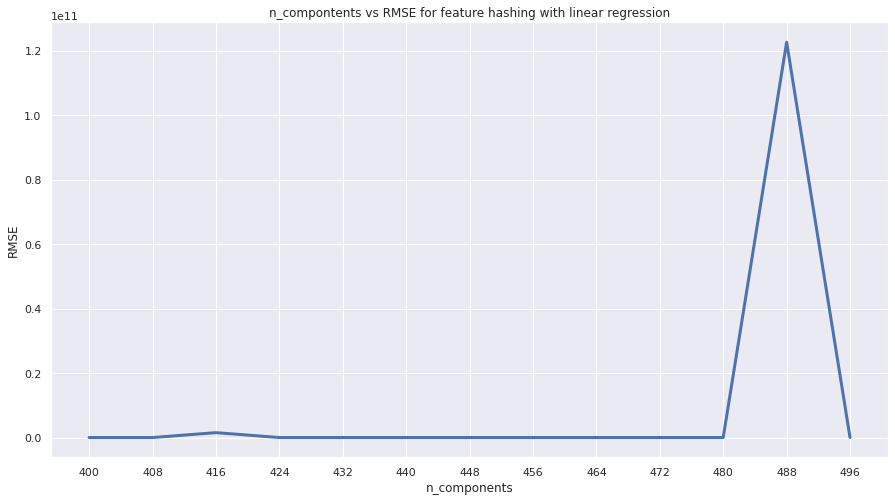

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(n_components_list_str, lr_errors, linewidth=3)
plt.title('n_compontents vs RMSE for feature hashing with linear regression')
plt.xlabel('n_components')
plt.ylabel('RMSE')
plt.show()


In [ ]:
print(f"The lowest RMSE in Linear Regression is {min(lr_errors)} for n_components of {n_components_list[lr_errors.index(min(lr_errors))]}.")

The lowest RMSE in Linear Regression is 135.600838805214 for n_components of 480.


Observations:
1. After some run on the above code the vest n_components to use for the HashingEncoder is 480.

#### Hash Encoding the Area_Codes Feature with n_components = 480

In [17]:
hash_encode = HashingEncoder(cols=['Area_Codes'], n_components= 480)
hash_encode.fit(x, y)
x_enc = hash_encode.transform(x)
test_data_enc = hash_encode.transform(test_data)

In [18]:
x_enc.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,...,col_473,col_474,col_475,col_476,col_477,col_478,col_479,Experience,Rating,Number_degrees_diploma_certificate,Qual_unknown,Qual_BDS,Qual_BHMS,Qual_BAMS,Qual_MBBS,Qual_MS,Qual_MD,Qual_MDS,Qual_DIPLOMA,Qual_PHD,Qual_others,Number_Feedback,Approx_Fees,Misc_Info,City_Bangalore,City_Chennai,City_Coimbatore,City_Delhi,City_Ernakulam,City_Hyderabad,City_Mumbai,City_Sector 5,City_Thiruvananthapuram,City_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,24,100,2,0,0,1,0,0,1,1,0,0,0,0,16,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,12,98,2,0,0,0,1,0,1,1,0,0,0,0,76,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,9,0,2,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,12,0,2,0,0,0,1,0,1,0,0,0,0,0,0,250,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,20,100,1,0,0,0,1,0,1,0,0,0,0,0,4,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


## Skewness

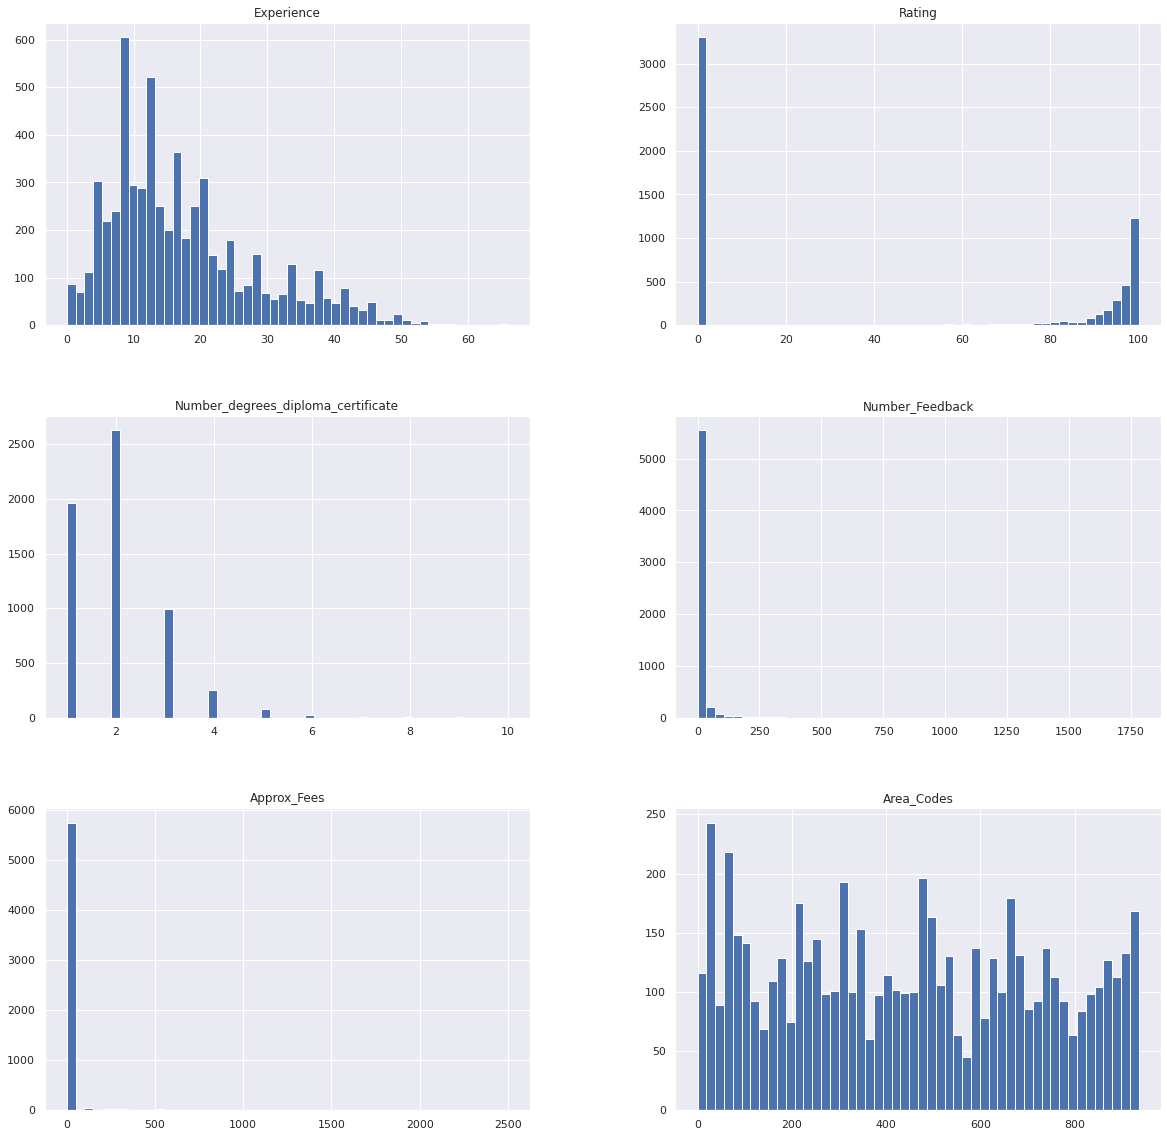

In [ ]:
x[['Experience','Rating','Number_degrees_diploma_certificate','Number_Feedback','Approx_Fees','Area_Codes']].hist(figsize=(20,20), bins=50)
plt.show()

In [ ]:
x_enc[['Experience','Rating','Number_degrees_diploma_certificate','Number_Feedback','Approx_Fees']].agg(['skew','kurtosis'])

,Experience,Rating,Number_degrees_diploma_certificate,Number_Feedback,Approx_Fees
skew,0.991089,0.247186,1.433547,15.552419,10.048168
kurtosis,0.535196,-1.911709,4.301957,390.562344,130.491738


Observations:
1. Experience, Number_degrees_diploma_certificate, Number_Feedback and Approx_Fees have high positive skews

## Data Scaling and Transformation

I will be using RobustScaler since we have some outliers in the dataset

In [19]:
rs = RobustScaler()

#train set
x_rs = rs.fit_transform(x_enc)
x_rs = pd.DataFrame(x_rs, columns=x_enc.columns)

#test set
test_data_enc_rs = rs.transform(test_data_enc)
test_data_enc_rs = pd.DataFrame(test_data_enc_rs, columns=test_data_enc.columns)

In [20]:
#target variable
sc_y = StandardScaler()
y_sc = sc_y.fit_transform(pd.DataFrame(y))
y_sc = pd.DataFrame(y_sc, columns=['fees'])

Power Transformation

In [21]:
pt = PowerTransformer(standardize=False)

#train set
x_pt = pt.fit_transform(x_rs)
x_pt = pd.DataFrame(x_pt, columns=x_enc.columns)

#test set
test_data_enc_pt = pt.transform(test_data_enc_rs)
test_data_enc_pt = pd.DataFrame(test_data_enc_pt, columns=test_data_enc.columns)
x_pt[['Experience','Rating','Number_degrees_diploma_certificate','Number_Feedback','Approx_Fees']].skew()

Experience                            0.036862
Rating                                0.228336
Number_degrees_diploma_certificate    0.123517
Number_Feedback                       1.135436
Approx_Fees                           4.951784
dtype: float64

Observations:
1. Considerable amount of skewness is removed.

Checking skewness in target variable

In [22]:
y_sc.skew()

fees    0.75187
dtype: float64

Observations:
1. The target variable is moderately skewed.

In [23]:
pt_y = PowerTransformer(standardize=False)
y_pt = pt_y.fit_transform(y_sc)
y_pt = pd.DataFrame(y_pt, columns=['fees'])

The below code can be used to get the Final Fees values

In [24]:
pt_y.lambdas_

array([0.39209829])

In [25]:
sc_y.inverse_transform(pt_y.inverse_transform(y_pt))

array([[100.],
       [350.],
       [300.],
       ...,
       [600.],
       [100.],
       [200.]])

Note:
1. Final train x, train y and test x are x_pt, y_pt and test_data_enc_pt

## Correleation

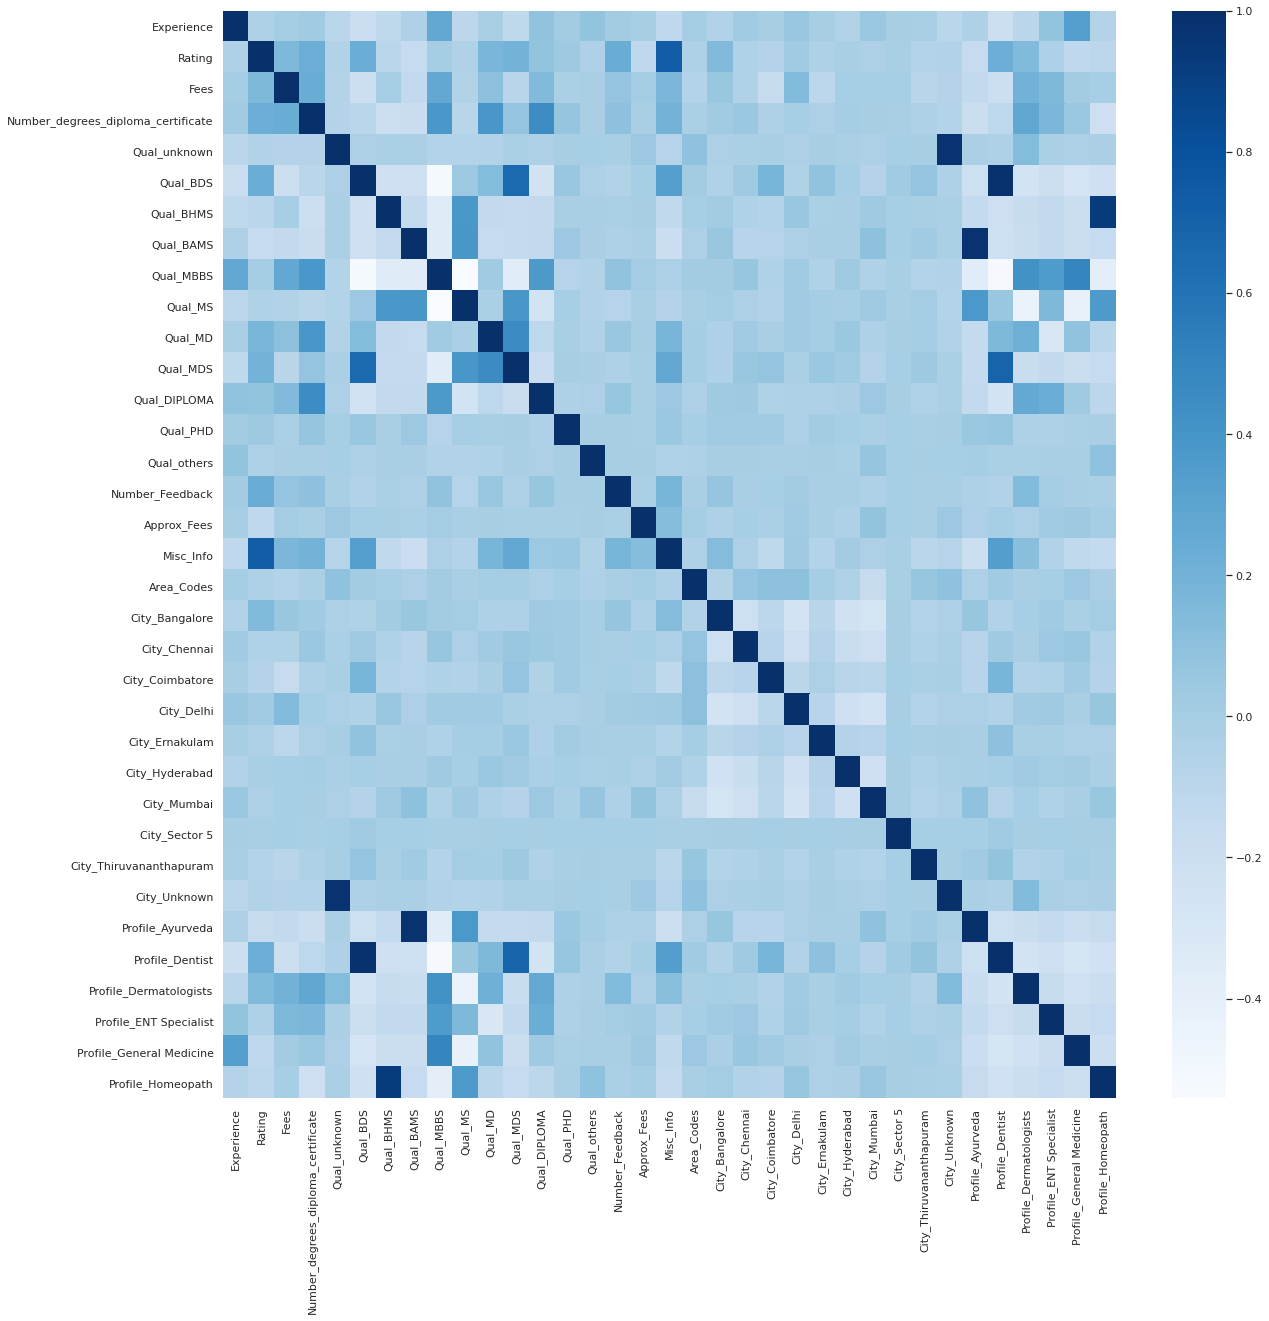

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(train_df.corr(),cmap='Blues')

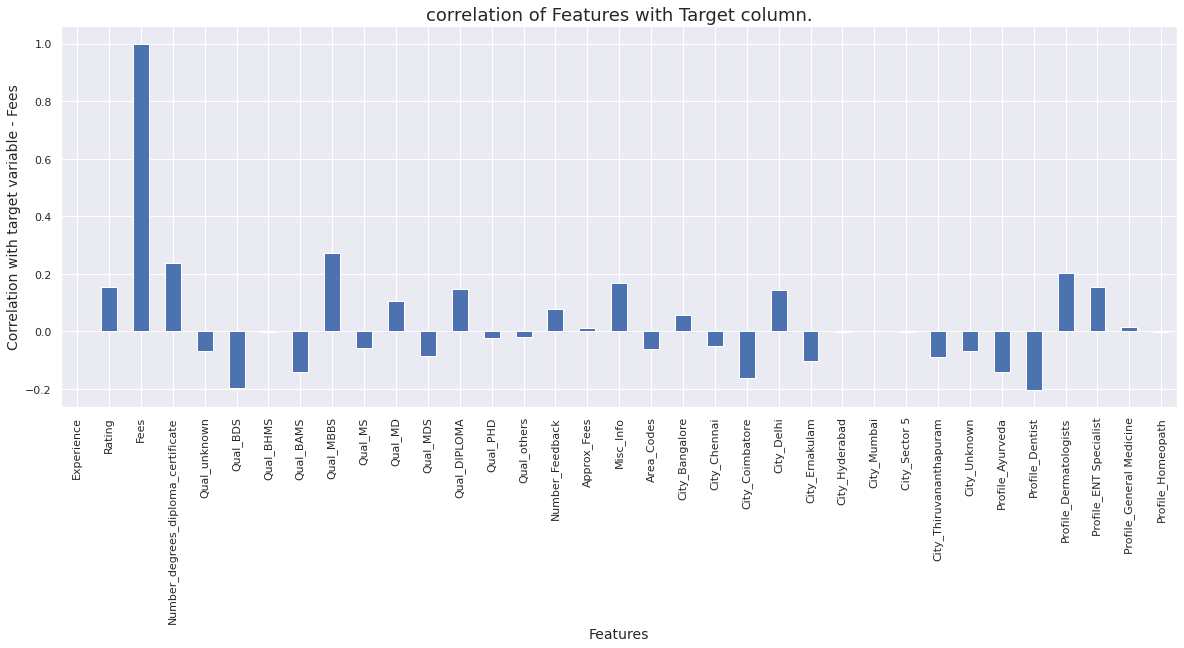

In [ ]:
plt.figure(figsize=(20,7))
train_df.corr()['Fees'].plot.bar()
plt.xlabel('Features', fontsize=14)
plt.ylabel('Correlation with target variable - Fees', fontsize=14)
plt.title("correlation of Features with Target column.", fontsize=18)
plt.show()

Observations:
1. The correlation is spread across the variables.

## Random State

In [ ]:
r_state = 0
train_score = 10000000000000
test_score = 10000000000000

for i in range(0,1000):
  
  x_tr, x_ts, y_tr, y_ts = train_test_split(x_pt, y_pt, test_size = 0.3, random_state = i)
  #model =  RandomForestRegressor()
  #model =  XGBRegressor(objective = 'reg:squarederror')
  model =  GradientBoostingRegressor()

  model.fit(x_tr, y_tr)
  
  y_tr_pred = pd.DataFrame(model.predict(x_tr))
  y_ts_pred = pd.DataFrame(model.predict(x_ts))

  tr_score = np.sqrt(mean_squared_error(y_tr, y_tr_pred))
  ts_score = np.sqrt(mean_squared_error(y_ts, y_ts_pred))

  r2tr = r2_score(y_tr, y_tr_pred)
  r2ts = r2_score(y_ts, y_ts_pred)
  if ts_score < test_score:
      print(i, tr_score, ts_score, r2tr, r2ts)
      train_score = tr_score
      test_score = ts_score
      r_state = i

print(f"random state: {r_state}, Train Error: {train_score}, test score: {test_score}")
print(f"Variance: {round(train_score - test_score,6)}")
    


0 0.7816877789434897 0.8362867256977353 0.3088929274789375 0.24440583286446504
1 0.7882621803219466 0.8251740558097661 0.30974351250708854 0.2342092945397286
2 0.7914359981946426 0.8203692140212685 0.30742264772090866 0.23485482636169652
6 0.789981715766752 0.816901964309638 0.30473764623926347 0.253736342434147
13 0.7948176416027857 0.8085026064850993 0.3048050923541211 0.2480979290348062
15 0.7941856609487261 0.8063548741275881 0.3014893020015603 0.2633163806000236
77 0.7947954505480253 0.8036475065061734 0.3104739878128836 0.24222148858749637
172 0.79791153070879 0.8015894160094718 0.2958867234124465 0.26971887794470517
708 0.7992382596869647 0.8015872516196997 0.29358662216749454 0.2697703548307975
834 0.7986261904054986 0.7994154801577152 0.3063897043808471 0.2416691610343954
895 0.798518052504794 0.7933586715818275 0.3050669405786126 0.2584515143639654
random state: 895, Train Error: 0.798518052504794, test score: 0.7933586715818275
Variance: 0.005159


In [26]:
x_train, x_test, y_train, y_test = train_test_split(x_pt, y_pt, test_size = 0.3, random_state = 895)

Checking if there are features that have variance = 0 due to encoding

In [27]:
zero_columns = []
for i in x_train.columns:
  if x_train[i].var()==0:
    zero_columns.append(i)
print(f"There are {len(zero_columns)} features that have variance = 0. These can be dropped to speed up the model.")
print("The feature names with variance = 0 are stored in the object 'zero_columns'")

There are 102 features that have variance = 0. These can be dropped to speed up the model.
The feature names with variance = 0 are stored in the object 'zero_columns'


## Cross Validation

In [ ]:
models = [LinearRegression(),Lasso(), Ridge(), SVR(), DecisionTreeRegressor(), KNeighborsRegressor()]

for model in models:

  cv_model = cross_val_score(model, x_train.drop(zero_columns, axis=1), y_train, scoring = 'neg_mean_squared_error', cv=10, n_jobs= -1)
  
  print(f"Model: {model.__class__.__name__}")
  #print(f"Cross val log errors: {cv_model}")
  print(f"Root Mean Cross val error: {np.sqrt(-cv_model.mean())}")
  print(f"Variance: {np.sqrt(cv_model.var())}")
  print("="*50)

Model: LinearRegression
Root Mean Cross val error: 47738883.164449446
Variance: 3643056783575758.0
Model: Lasso
Root Mean Cross val error: 0.9579952841758071
Variance: 0.045569891966152916
Model: Ridge
Root Mean Cross val error: 0.869772140686895
Variance: 0.03551206577874414
Model: SVR
Root Mean Cross val error: 0.8830747414959215
Variance: 0.05304116580013363
Model: DecisionTreeRegressor
Root Mean Cross val error: 1.0581247548868937
Variance: 0.07371845917586396
Model: KNeighborsRegressor
Root Mean Cross val error: 0.9244161974673344
Variance: 0.07102048607392968


Observations:
1. The Ridge, SVR and KNeighborsRegressor are better than the other models.

### Ensemble Technique

In [ ]:

models = [XGBRegressor(objective='reg:squarederror'), RandomForestRegressor(random_state=0), GradientBoostingRegressor(random_state=0), AdaBoostRegressor(n_estimators=100, random_state=0)]

for model in models:

  cv_model = cross_val_score(model, x_train.drop(zero_columns, axis=1), y_train, scoring = 'neg_mean_squared_error', cv=10, n_jobs= -1)
  
  print(f"Model: {model.__class__.__name__} ||  Root Mean Sqared error: {np.sqrt(-cv_model.mean())} || Variance: {np.sqrt(cv_model.var())}")
  print("="*50)


Model: XGBRegressor ||  Root Mean Sqared error: 0.8400200892859699 || Variance: 0.041960030354205737
Model: KNeighborsRegressor ||  Root Mean Sqared error: 0.9244161974673344 || Variance: 0.07102048607392968
Model: RandomForestRegressor ||  Root Mean Sqared error: 0.8309426780177789 || Variance: 0.052302192473052005
Model: GradientBoostingRegressor ||  Root Mean Sqared error: 0.8406889945224826 || Variance: 0.041300678478009265
Model: AdaBoostRegressor ||  Root Mean Sqared error: 0.8886058102656067 || Variance: 0.03953103109589768


Observations:
1. The RandomForest, XGBoost and GradientBoost are performing better than the others.

Overall Observations:
1. The Ensemble techniques are on the whole performing better than the Ridge, SVR and KNN models

## HyperParameter Tuning the Models

Tuning the ensemble models.

#### Tuning XGBoost

In [ ]:
learning_rate = [0.5,0.03,0.02]

max_depth   = [int(x) for x in np.linspace(2,50,3)]
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 300, num = 5)]
max_features = ['auto','log2']


params = {'learning_rate':learning_rate,
          'max_depth': max_depth,
          'n_estimators': n_estimators,
          'max_features':max_features}



xgbr_model = XGBRegressor(objective = 'reg:squarederror', tree_method = "gpu_hist",)

xgbr_modelcvo = RandomizedSearchCV(xgbr_model, param_distributions=params, scoring = 'neg_mean_squared_error', cv = 10,  verbose=10, n_iter=5, n_jobs=-1)
xgbr_modelcvo.fit(x_train.drop(zero_columns,axis=1), y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 22.2min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 22.3min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 22.6min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 32.8min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 44.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 51.0min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:squarederror',
                                          random_state=0, reg...
                                          seed=None, silent=None, subsample=1,
                                          tree_method='gpu_hist', verbosity=1),
                   iid='depre

In [ ]:
print(np.sqrt(-xgbr_modelcvo.best_score_))
print(xgbr_modelcvo.best_params_)

0.8372875536129213
{'n_estimators': 150, 'max_features': 'auto', 'max_depth': 2, 'learning_rate': 0.5}


#### Tuning Randomforest

In [ ]:
criterion = ['mse']

max_depth   = [int(x) for x in np.linspace(10,110,11)]

n_estimators = [int(x) for x in np.linspace(200,1000, 11)]
max_features = ['auto','log2','sqrt']
max_samples=[0.7,0.8,0.9,1.0]

params = {'criterion':criterion,
          'max_samples':max_samples,
          'max_depth': max_depth,
          'n_estimators': n_estimators,
          'max_features':max_features}



rnd_model = RandomForestRegressor()

rnd_modelcv = RandomizedSearchCV(rnd_model, param_distributions=params, scoring = 'neg_mean_squared_error', cv = 10,  verbose=10, n_iter=20, n_jobs=-1)
rnd_modelcv.fit(x_train.drop(zero_columns,axis=1), y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   29.8s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   36.9s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   56.7s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 14

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                             

In [ ]:
print(np.sqrt(-rnd_modelcv.best_score_))
print(rnd_modelcv.best_params_)

0.8093049115309026
{'n_estimators': 400, 'max_samples': 0.8, 'max_features': 'sqrt', 'max_depth': 60, 'criterion': 'mse'}


#### Tuning GradientBoost

In [ ]:
loss = ['ls','lad','huber','quantile']

learning_rate = [1.3,1,1.5,0.1,0.5,0.06,0.03]
criterion = ['friedman_mse','mse']

max_depth   = [int(x) for x in np.linspace(10,110,11)]

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 600, num = 11)]
max_features = ['auto','log2']


params = {'loss':loss,
          'learning_rate':learning_rate,
          'criterion' : criterion,
          'max_depth': max_depth,
          'n_estimators': n_estimators,
          'max_features':max_features}



gbr_model = GradientBoostingRegressor()

gbr_modelcv = RandomizedSearchCV(gbr_model, param_distributions=params, scoring = 'neg_mean_squared_error', cv = 10, random_state=0, verbose=10, n_iter=5, n_jobs=2)
gbr_modelcv.fit(x_train.drop(zero_columns,axis=1), y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:  2.0min
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:  4.1min
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed: 10.0min
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed: 10.3min
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed: 10.6min
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed: 10.9min
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed: 27.0min
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 32.6min
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed: 33.4min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                            

In [ ]:
print(np.sqrt(-gbr_modelcv.best_score_))
print(gbr_modelcv.best_params_)

0.8098716037840583
{'n_estimators': 200, 'max_features': 'log2', 'max_depth': 30, 'loss': 'huber', 'learning_rate': 0.03, 'criterion': 'mse'}


## Cross Validation

In [ ]:
models = [RandomForestRegressor(n_estimators = 400, max_samples = 0.8, max_features = 'sqrt', max_depth = 60, criterion = 'mse'),
          XGBRegressor(objective = 'reg:squarederror', n_estimators = 150, max_features = 'auto', max_depth = 2, learning_rate = 0.5),
          GradientBoostingRegressor(n_estimators = 200, max_features = 'log2', max_depth = 30, loss = 'huber', learning_rate = 0.03, criterion = 'mse')]

for model in models:
  cv_model = cross_validate(model, x_train.drop(zero_columns,axis=1), y_train, scoring = ['neg_root_mean_squared_error','neg_mean_squared_error'], cv=5, n_jobs= -1,)
  
  print(f"Model: {model.__class__.__name__} ||  Mean Cross RMSE: {-cv_model['test_neg_root_mean_squared_error'].mean()} || Variance RMSE {cv_model['test_neg_root_mean_squared_error'].var()}  Mean Cross MSE: {(cv_model['test_neg_mean_squared_error']*(-1)).mean()} || Variance MSE {(cv_model['test_neg_mean_squared_error']*(-1)).var()}")
  print("="*50)

Model: RandomForestRegressor ||  Mean Cross RMSE: 0.8132905511977248 || Variance RMSE 0.0007507737243580339  Mean Cross MSE: 0.662192294391857 || Variance MSE 0.0020139787510952177
Model: XGBRegressor ||  Mean Cross RMSE: 0.841605450801692 || Variance RMSE 0.0006569776959387396  Mean Cross MSE: 0.7089567125150579 || Variance MSE 0.0019099581021368287
Model: GradientBoostingRegressor ||  Mean Cross RMSE: 0.8138422055861166 || Variance RMSE 0.0006620232565044366  Mean Cross MSE: 0.6630011588497793 || Variance MSE 0.0017802586331116914


Manual adjustments to see if we can get a better perfomance

In [ ]:
models = [RandomForestRegressor(n_estimators = 800, max_samples = 0.8, max_features = 'sqrt', max_depth = 50, criterion = 'mse'),
          XGBRegressor(objective = 'reg:squarederror', n_estimators = 85, max_features = 'auto', max_depth = 6, learning_rate = 0.2),
          GradientBoostingRegressor(n_estimators = 150, max_features = 'log2', max_depth = 35, loss = 'huber', learning_rate = 0.02, criterion = 'mse')]

for model in models:
  cv_model = cross_validate(model, x_train.drop(zero_columns,axis=1), y_train, scoring = ['neg_root_mean_squared_error','neg_mean_squared_error'], cv=5, n_jobs= -1,)
  
  print(f"Model: {model.__class__.__name__} ||  Mean Cross RMSE: {-cv_model['test_neg_root_mean_squared_error'].mean()} || Variance RMSE {cv_model['test_neg_root_mean_squared_error'].var()}  Mean Cross MSE: {(cv_model['test_neg_mean_squared_error']*(-1)).mean()} || Variance MSE {(cv_model['test_neg_mean_squared_error']*(-1)).var()}")
  print("="*50)

Model: RandomForestRegressor ||  Mean Cross RMSE: 0.812181487331803 || Variance RMSE 0.0007184422403169182  Mean Cross MSE: 0.6603572106048168 || Variance MSE 0.0019159532295586097
Model: XGBRegressor ||  Mean Cross RMSE: 0.8303175377975585 || Variance RMSE 0.0004989133720181329  Mean Cross MSE: 0.689926126946218 || Variance MSE 0.0014036606499232098
Model: GradientBoostingRegressor ||  Mean Cross RMSE: 0.8100832246638351 || Variance RMSE 0.0005579254708135266  Mean Cross MSE: 0.656792756352571 || Variance MSE 0.001482790093235556


Observations:
1. GradientBoosting and RandomForest models are performing better.

## Cross Validating RandomForest and GradientBoost with the whole Train Dataset

In [ ]:
models = [RandomForestRegressor(n_estimators = 800, max_samples = 0.8, max_features = 'sqrt', max_depth = 50, criterion = 'mse'),
          GradientBoostingRegressor(n_estimators = 150, max_features = 'log2', max_depth = 35, loss = 'huber', learning_rate = 0.02, criterion = 'mse')]

for model in models:
  cv_model = cross_validate(model, x_pt.drop(zero_columns, axis=1), y_pt, scoring =  ['neg_root_mean_squared_error','neg_mean_squared_error'], cv=5, n_jobs= -1)
  
  print(f"Model: {model.__class__.__name__}")
  print(f"\tMean Cross val MSE: {(cv_model['test_neg_mean_squared_error']*(-1)).mean()} || Variance MSE {(cv_model['test_neg_mean_squared_error']*(-1)).var()}")
  print(f"\tMean Cross val RMSE: {np.sqrt((cv_model['test_neg_mean_squared_error']*(-1))).mean()} || Variance RMSE {np.sqrt((cv_model['test_neg_mean_squared_error']*(-1))).var()}")
  print("="*50)

Model: RandomForestRegressor
	Mean Cross val MSE: 0.6431727115249353 || Variance MSE 0.00010124445012037779
	Mean Cross val RMSE: 0.8019561928752239 || Variance RMSE 3.897623401203906e-05
Model: GradientBoostingRegressor
	Mean Cross val MSE: 0.6416597641142341 || Variance MSE 0.00015986444991990373
	Mean Cross val RMSE: 0.8009979774158902 || Variance RMSE 6.200428988699054e-05


Observations:
1. The GradientBoostingRegressor is giving an MSE of 0.641 and an RMSE of 0.800 and RandomForestRegressor is giving an MSE of 0.643 and an RMSE of 0.801.
2. The variance in both the models are pretty negligible at 10^-05 range. Hence I am choosing GradientBoostingRegressor based on the slight lesser error.

## Building Final Model

In [28]:
doctor_model = GradientBoostingRegressor(n_estimators = 150, max_features = 'log2', max_depth = 35, loss = 'huber', learning_rate = 0.02, criterion = 'mse')

#### Training the model with the whole Train set.

In [29]:
doctor_model.fit(x_pt.drop(zero_columns, axis=1), y_pt)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='mse', init=None,
                          learning_rate=0.02, loss='huber', max_depth=35,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

#### Saving the final Model

In [30]:
joblib.dump(doctor_model, '/content/doctor_fees_predictor.obj')

['/content/doctor_fees_predictor.obj']

## Predicting the Fees for test set

'test_data_enc_pt' is the preprocessed Test dataset.

#### Loading the model

In [31]:
fees_predictor = joblib.load('/content/doctor_fees_predictor.obj')

In [32]:
fees_predictor

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='mse', init=None,
                          learning_rate=0.02, loss='huber', max_depth=35,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [33]:
test_data_enc_pt.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,...,col_473,col_474,col_475,col_476,col_477,col_478,col_479,Experience,Rating,Number_degrees_diploma_certificate,Qual_unknown,Qual_BDS,Qual_BHMS,Qual_BAMS,Qual_MBBS,Qual_MS,Qual_MD,Qual_MDS,Qual_DIPLOMA,Qual_PHD,Qual_others,Number_Feedback,Approx_Fees,Misc_Info,City_Bangalore,City_Chennai,City_Coimbatore,City_Delhi,City_Ernakulam,City_Hyderabad,City_Mumbai,City_Sector 5,City_Thiruvananthapuram,City_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,...,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.971365,-0.000000,-1.305178,-0.0,-0.00000,-0.0,-0.000000,0.583732,-0.000000,-0.000000,-0.000000,-0.000000,-0.0,-0.0,-0.000000,-0.0,-0.491466,-0.000000,-0.000000,-0.0,-0.000000,-0.0,-0.000000,0.146889,-0.0,-0.0,-0.0,-0.000000,-0.000000,-0.000000,-0.000000,0.140567,-0.0
1,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,...,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.836166,-0.000000,0.000000,-0.0,-0.00000,-0.0,-0.000000,0.583732,-0.000000,-0.000000,-0.000000,0.162776,-0.0,-0.0,-0.000000,-0.0,-0.491466,-0.000000,-0.000000,-0.0,-0.000000,-0.0,0.111779,-0.000000,-0.0,-0.0,-0.0,-0.000000,-0.000000,-0.000000,0.084824,-0.000000,-0.0
2,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,...,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,1.122534,0.421422,0.000000,-0.0,-0.00000,-0.0,-0.000000,0.583732,-0.000000,-0.000000,-0.000000,0.162776,-0.0,-0.0,0.737178,-0.0,0.000000,-0.000000,0.100004,-0.0,-0.000000,-0.0,-0.000000,-0.000000,-0.0,-0.0,-0.0,-0.000000,-0.000000,0.122249,-0.000000,-0.000000,-0.0
3,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,...,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-1.422234,-0.000000,-1.305178,-0.0,-0.00000,-0.0,0.088854,-0.000000,0.668292,-0.000000,-0.000000,-0.000000,-0.0,-0.0,-0.000000,-0.0,-0.491466,-0.000000,-0.000000,-0.0,0.142066,-0.0,-0.000000,-0.000000,-0.0,-0.0,-0.0,0.091712,-0.000000,-0.000000,-0.000000,-0.000000,-0.0
4,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.010698,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,...,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.134663,0.509799,0.000000,-0.0,0.16754,-0.0,-0.000000,-0.000000,0.668292,0.430551,0.088616,-0.000000,-0.0,-0.0,-0.000000,-0.0,0.000000,0.152506,-0.000000,-0.0,-0.000000,-0.0,-0.000000,-0.000000,-0.0,-0.0,-0.0,-0.000000,0.172855,-0.000000,-0.000000,-0.000000,-0.0


#### Predicting Fees for Test set

In [34]:
y_predictions = fees_predictor.predict(test_data_enc_pt.drop(zero_columns, axis=1))

Inverting the PowerTransformer and the StandardScaler to get the actual Fees values.

In [35]:
preds = sc_y.inverse_transform(pt_y.inverse_transform(pd.DataFrame(y_predictions)))

In [36]:
predictions = []
for i in preds:
  predictions.append(round(i[0]))

In [37]:
pd.DataFrame(predictions, columns=['Fees'])

,Fees
0,224
1,313
2,324
3,180
4,265
...,...
1982,235
1983,308
1984,238
1985,215


## Saving the predictions

In [38]:
pd.DataFrame(predictions, columns=['Fees']).to_csv('/content/Testdata_Fees_predictions.csv', sep=',')

## Important Features that affect the cost prediction

In [39]:
top_importance = pd.DataFrame({'Feature_Importance': fees_predictor.feature_importances_,
              'Features': x_pt.drop(zero_columns, axis=1).columns}).sort_values(by='Feature_Importance', ascending=False).head(60)

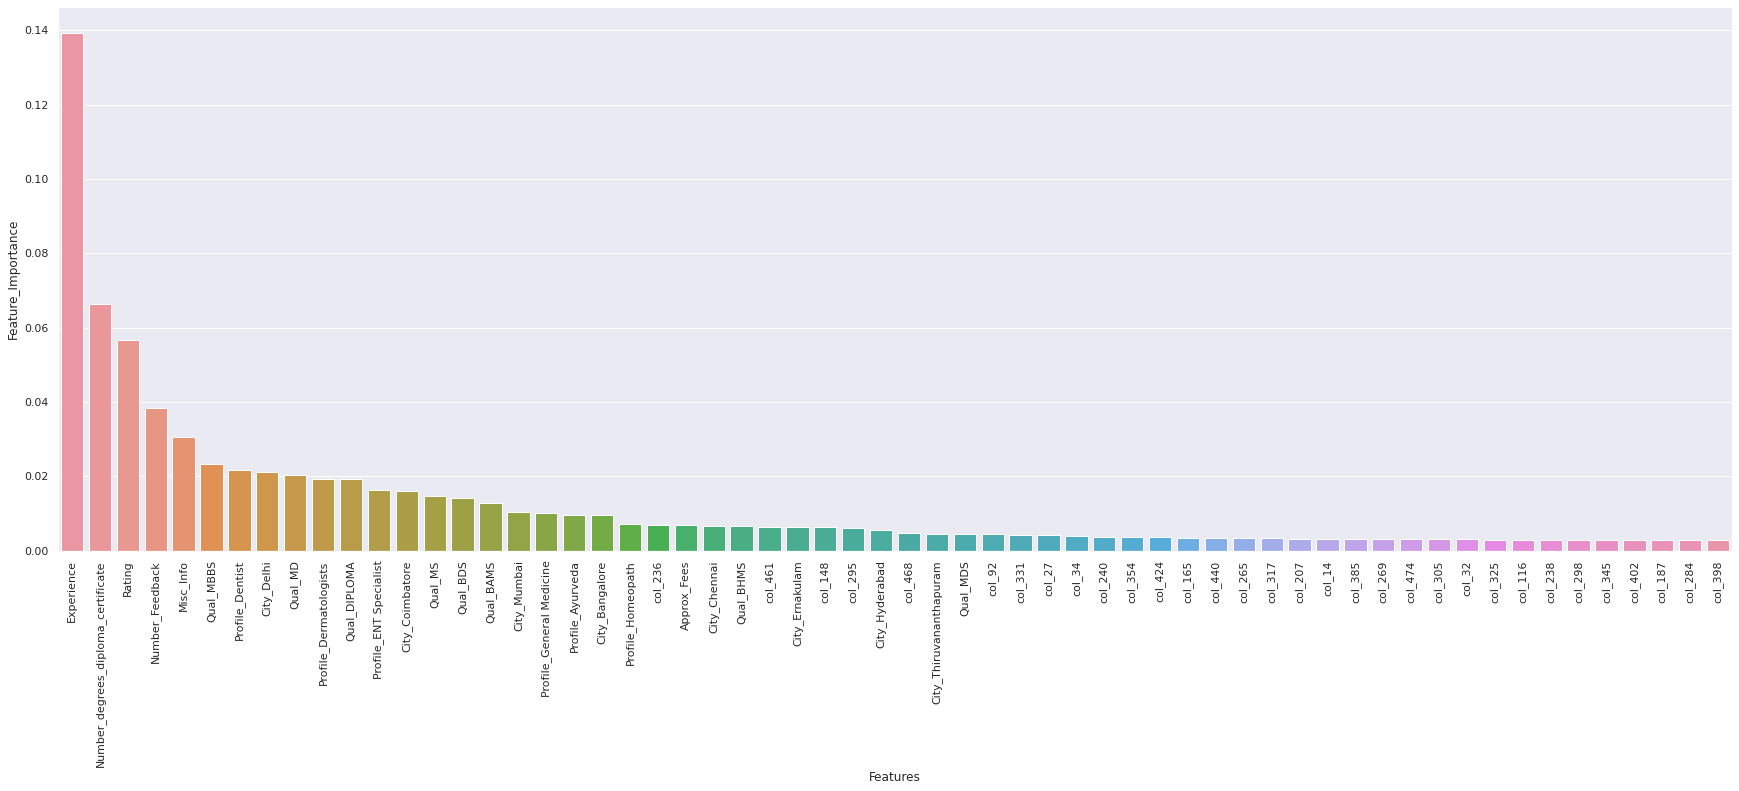

In [40]:
#top_importance.plot.bar(x='Features', y='Feature_Importance')
plt.figure(figsize=(30,10))
sns.barplot(x = 'Features', y= 'Feature_Importance', data = top_importance)
plt.xticks(rotation=90)
plt.show()

## Concluding remarks:
1. Experience plays a very important role in the prediction of the Doctor's fees.
2. Following Experience, the Number of degrees the doctor holds and the Rating for the doctor is playing a vital role.
3. The doctor's Qualification and the profile also plays a significant role but only after the Experience, Number of degrees and the rating.
4. Finally the city in which the Doctor is serving is also affecting the Fees.

